<a href="https://colab.research.google.com/github/thisspider/Tytus-HW/blob/main/Wilam_Final_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PACKAGES

In [ ]:
from gensim.models import CoherenceModel

In [ ]:
!pip install git+https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git

  Cloning https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git to /tmp/pip-req-build-_rp1ga03
  Running command git clone -q https://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git /tmp/pip-req-build-_rp1ga03
     |████████████████████████████████| 5.6 MB 4.0 MB/s 
     |████████████████████████████████| 117 kB 59.7 MB/s 
     |████████████████████████████████| 181 kB 39.9 MB/s 
     |████████████████████████████████| 76 kB 3.9 MB/s 
     |████████████████████████████████| 132 kB 59.8 MB/s 
     |████████████████████████████████| 32.8 MB 2.0 MB/s 
     |████████████████████████████████| 8.6 MB 49.2 MB/s 
     |████████████████████████████████| 79 kB 6.4 MB/s 
     |████████████████████████████████| 138 kB 57.2 MB/s 
     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 5.1 MB 45.2 MB/s 
     |████████████████████████████████| 127 kB 59.9 MB/s 
  Created wheel for lucem-illud: filename=lucem_illud-8.0.1-p

In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Mon Mar  7 11:49:14 2022

@author: tytus
"""

### TOPIC MDELS FOR FINAL ###

import os.path
import pandas as pd

import spacy
import zipfile
import pandas as pd

#Special module written for this class
#This provides access to data and to helper functions from previous weeks
#Make sure you update it before starting this notebook
#!pip install -U git+git://github.com/UChicago-Computational-Content-Analysis/lucem_illud.git
import lucem_illud #


#All these packages need to be installed from pip
#These are all for the cluster detection
import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics

import scipy #For hierarchical clustering and some visuals
#import scipy.cluster.hierarchy
import gensim#For topic modeling
import requests #For downloading our datasets
import numpy as np #for arrays
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer


import itertools
import json






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
### TOKENIZATION PACKAGES

#All these packages need to be installed from pip
import requests #for http requests
import pandas #gives us DataFrames
import matplotlib.pyplot as plt #For graphics
import wordcloud #Makes word clouds
import numpy as np #For divergences/distances
import scipy #For divergences/distances
import seaborn as sns #makes our plots look nicer
import sklearn.manifold #For a manifold plot
import json #For API responses
import urllib.parse #For joining urls

# comp-linguistics
import spacy

#Displays the graphs
import graphviz #You also need to install the command line graphviz

#These are from the standard library
import os.path
import zipfile
import subprocess
import io
import tempfile

#This 'magic' command makes the plots work better
#in the notebook, don't use it outside of a notebook
%matplotlib inline

# IMPORT FILES

In [ ]:
### IMPORT FILES

#os.chdir('/Users/tytus/Documents/2022 Winter/Computational Content Analysis/FINAL')
!ls

forbes = pd.read_csv("/content/drive/MyDrive/forbes_billionaires.csv")

forbes_categories = pd.read_csv("/content/drive/MyDrive/Billionaire.csv")

corgis = pd.read_csv("/content/drive/MyDrive/CORGIS.csv")

data = pd.read_csv("/content/drive/MyDrive/letters_and_metadata.csv")
#data.columns = ['Unnamed: 0', 'name', 'principal_related_foundation','residence', 'net_worth', 'joined', 'bio', 'name', 'letters_text']

wikipedia = pd.read_csv("/content/drive/MyDrive/Billionaire_sparql.csv")


data.columns
forbes.columns
forbes_categories.columns
corgis.columns

drive  sample_data


Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [ ]:
forbes

Name  NetWorth        Country         Source  Rank  \
0                   Jeff Bezos     177.0  United States         Amazon     1   
1                    Elon Musk     151.0  United States  Tesla, SpaceX     2   
2     Bernard Arnault & family     150.0         France           LVMH     3   
3                   Bill Gates     124.0  United States      Microsoft     4   
4              Mark Zuckerberg      97.0  United States       Facebook     5   
...                        ...       ...            ...            ...   ...   
2750         Daniel Yong Zhang       1.0          China     e-commerce  2674   
2751             Zhang Yuqiang       1.0          China     Fiberglass  2674   
2752             Zhao Meiguang       1.0          China    gold mining  2674   
2753            Zhong Naixiong       1.0          China   conglomerate  2674   
2754           Zhou Wei family       1.0          China       Software  2674   

       Age              Residence    Citizenship           Status  Children  \
0     57.0    Seattle, Washington  United States  In Relationship       4.0   
1     49.0          Austin, Texas  United States  In Relationship       7.0   
2     72.0          Paris, France         France          Married       5.0   
3     65.0     Medina, Washington  United States         Divorced       3.0   
4     36.0  Palo Alto, California  United States          Married       2.0   
...    ...                    ...            ...              ...       ...   
2750  49.0        Hangzhou, China          China              NaN       NaN   
2751  65.0       Tongxiang, China          China              NaN       NaN   
2752  58.0           Jilin, China          China              NaN       NaN   
2753  58.0          Foshan, China          China              NaN       NaN   
2754  54.0        Shanghai, China          China          Married       NaN   

                                              Education Self_made  
0        Bachelor of Arts/Science, Princeton University      True  
1     Bachelor of Arts/Science, University of Pennsy...      True  
2     Bachelor of Arts/Science, Ecole Polytechnique ...     False  
3                          Drop Out, Harvard University      True  
4                          Drop Out, Harvard University      True  
...                                                 ...       ...  
2750                                                NaN      True  
2751                                                NaN      True  
2752                                                NaN      True  
2753                                                NaN      True  
2754                                                NaN      True  

[2755 rows x 12 columns]

In [ ]:
corgis["name"]

In [ ]:


### FUZZY MERGE LETTERS AND SOME METADATA
!pip install fuzzywuzzy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process


def fuzzy_merge(df_1, df_2, key1, key2, threshold=90, limit=2):
    """
    :param df_1: the left table to join
    :param df_2: the right table to join
    :param key1: key column of the left table
    :param key2: key column of the right table
    :param threshold: how close the matches should be to return a match, based on Levenshtein distance
    :param limit: the amount of matches that will get returned, these are sorted high to low
    :return: dataframe with boths keys and matches
    """
    s = df_2[key2].tolist()
    
    m = df_1[key1].apply(lambda x: process.extract(x, s, limit=limit))    
    df_1['matches'] = m
    
    m2 = df_1['matches'].apply(lambda x: ', '.join([i[0] for i in x if i[1] >= threshold]))
    df_1['matches'] = m2
    
    return df_1



/usr/local/lib/python3.7/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
new_df = fuzzy_merge(df, forbes, 'pledger_name', 'Name', threshold=90)
new_df.rename(columns={'matches':'Name'}, inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-co

In [ ]:
forbes.columns

Index(['Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age', 'Residence',
       'Citizenship', 'Status', 'Children', 'Education', 'Self_made'],
      dtype='object')

In [ ]:
new_df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'pledger_name',
       'principal_related_foundation', 'residence', 'net_worth', 'joined',
       'bio', 'letters_text', 'name.1', 'tokenized_letters',
       'letter_word_count', 'normalized_letters', 'normalized_letters_count',
       'letters_text_noquote', 'POS_sents', 'text_bigrams', 'Name', 'name',
       'Name'],
      dtype='object')

In [ ]:
new_df = new_df.iloc[:,1:18]

In [ ]:
df_merged_forbes.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'pledger_name',
       'principal_related_foundation', 'residence', 'net_worth', 'joined',
       'bio', 'name', 'letters_text', 'name.1', 'tokenized_letters',
       'letter_word_count', 'normalized_letters', 'normalized_letters_count',
       'letters_text_noquote', 'Name', 'NetWorth', 'Country', 'Source', 'Rank',
       'Age', 'Residence', 'Citizenship', 'Status', 'Children', 'Education',
       'Self_made'],
      dtype='object')

In [ ]:
df_merged_forbes = pd.merge(new_df, forbes, on="Name", how="left")
df_merged_forbes

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1               pledger_name  \
0             0             0               0      Jon and Helaine Ayers   
1             1             1               1  Jared and Monica Isaacman   
2             2             2               2           Steven Schuurman   
3             3             3               3      Patti Bao and Tony Xu   
4             4             4               4              Jeff T. Green   
..          ...           ...             ...                        ...   
198         220           220             220           T. Boone Pickens   
199         221           221             221   Julian H. Robertson, Jr.   
200         222           222             222          David Rockefeller   
201         223           223             223        David M. Rubenstein   
202         224           224             224   Jim and Virginia Stowers   

              principal_related_foundation                   residence  \
0                                      NaN         Fort Lauderdale, FL   
1                                      NaN        Easton, Pennsylvania   
2                      Dreamery Foundation  Amsterdam, The Netherlands   
3                                      NaN           San Francisco, CA   
4          Jeff T. Green Family Foundation            Newbury Park, CA   
..                                     ...                         ...   
198        The T. Boone Pickens Foundation                  Dallas, TX   
199                   Robertson Foundation                New York, NY   
200        Rockefeller Brothers Fund, Inc.           Sleepy Hollow, NY   
201              Information not available                Bethesda, MD   
202  Stowers Institute of Medical Research             Kansas City, MO   

        net_worth      joined  \
0    $541 million  12/14/2021   
1    $1.7 billion  12/14/2021   
2    $1.4 billion  12/14/2021   
3    $2.3 billion  11/30/2021   
4    $5.7 billion  11/16/2021   
..            ...         ...   
198    $1 billion  08/04/2010   
199  $3.6 billion  08/04/2010   
200    $3 billion  08/04/2010   
201  $2.2 billion  08/04/2010   
202  $100 million  08/04/2010   

                                                   bio  \
0    Jon and Helaine Ayers graduated from Yale Univ...   
1    Jared Isaacman is the founder of Draken Intern...   
2    Steven Schuurman is a Dutch technology and med...   
3    Tony Xu, a first-generation American who grew ...   
4    Jeff Green is the co-founder and CEO of the bu...   
..                                                 ...   
198  T. Boone Pickens founded the oil company later...   
199                                                NaN   
200  David Rockefeller was the former head of Chase...   
201  David M. Rubenstein is co-founder of the priva...   
202  Jim Stowers is the founder of American Century...   

                          name  ...        Country                 Source  \
0        Jon and Helaine Ayers  ...            NaN                    NaN   
1    Jared and Monica Isaacman  ...            NaN                    NaN   
2             Steven Schuurman  ...    Netherlands               software   
3        Patti Bao and Tony Xu  ...  United States  food delivery service   
4                Jeff T. Green  ...  United States     online advertising   
..                         ...  ...            ...                    ...   
198           T. Boone Pickens  ...            NaN                    NaN   
199   Julian H. Robertson, Jr.  ...  United States            hedge funds   
200          David Rockefeller  ...            NaN                    NaN   
201        David M. Rubenstein  ...  United States         private equity   
202   Jim and Virginia Stowers  ...            NaN                    NaN   

       Rank   Age                  Residence    Citizenship    Status  \
0       NaN   NaN                        NaN            NaN       NaN   
1       NaN   NaN                     

In [ ]:
df_merged_forbes.groupby(['Self_made'])['Self_made'].agg(['size'])

size
Self_made      
False        12
True         57

In [ ]:
corgis.columns

Index(['name', 'rank', 'year', 'company.founded', 'company.name',
       'company.relationship', 'company.sector', 'company.type',
       'demographics.age', 'demographics.gender', 'location.citizenship',
       'location.country code', 'location.gdp', 'location.region',
       'wealth.type', 'wealth.worth in billions', 'wealth.how.category',
       'wealth.how.from emerging', 'wealth.how.industry',
       'wealth.how.inherited', 'wealth.how.was founder',
       'wealth.how.was political'],
      dtype='object')

In [ ]:
new_df['name']

0                                             
1                                             
2                                             
3                                             
4                                             
                        ...                   
220                                           
221    Julian Robertson, Julian Robertson, Jr.
222       David Rockefeller, David Rockefeller
223                           David Rubenstein
224                                           
Name: name, Length: 203, dtype: object

In [ ]:
df.drop('name', inplace=True, axis=1)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
new_df = fuzzy_merge(df, corgis, 'pledger_name', 'name', threshold=90)
new_df.rename(columns={'matches':'name'}, inplace=True)
df_merged = pd.merge(new_df, corgis, on="name", how="left")
df_merged

Unnamed: 0  Unnamed: 0.1               pledger_name  \
0             0             0      Jon and Helaine Ayers   
1             1             1  Jared and Monica Isaacman   
2             2             2           Steven Schuurman   
3             3             3      Patti Bao and Tony Xu   
4             4             4              Jeff T. Green   
..          ...           ...                        ...   
198         220           220           T. Boone Pickens   
199         221           221   Julian H. Robertson, Jr.   
200         222           222          David Rockefeller   
201         223           223        David M. Rubenstein   
202         224           224   Jim and Virginia Stowers   

              principal_related_foundation                   residence  \
0                                      NaN         Fort Lauderdale, FL   
1                                      NaN        Easton, Pennsylvania   
2                      Dreamery Foundation  Amsterdam, The Netherlands   
3                                      NaN           San Francisco, CA   
4          Jeff T. Green Family Foundation            Newbury Park, CA   
..                                     ...                         ...   
198        The T. Boone Pickens Foundation                  Dallas, TX   
199                   Robertson Foundation                New York, NY   
200        Rockefeller Brothers Fund, Inc.           Sleepy Hollow, NY   
201              Information not available                Bethesda, MD   
202  Stowers Institute of Medical Research             Kansas City, MO   

        net_worth      joined  \
0    $541 million  12/14/2021   
1    $1.7 billion  12/14/2021   
2    $1.4 billion  12/14/2021   
3    $2.3 billion  11/30/2021   
4    $5.7 billion  11/16/2021   
..            ...         ...   
198    $1 billion  08/04/2010   
199  $3.6 billion  08/04/2010   
200    $3 billion  08/04/2010   
201  $2.2 billion  08/04/2010   
202  $100 million  08/04/2010   

                                                   bio  \
0    Jon and Helaine Ayers graduated from Yale Univ...   
1    Jared Isaacman is the founder of Draken Intern...   
2    Steven Schuurman is a Dutch technology and med...   
3    Tony Xu, a first-generation American who grew ...   
4    Jeff Green is the co-founder and CEO of the bu...   
..                                                 ...   
198  T. Boone Pickens founded the oil company later...   
199                                                NaN   
200  David Rockefeller was the former head of Chase...   
201  David M. Rubenstein is co-founder of the priva...   
202  Jim Stowers is the founder of American Century...   

                                          letters_text  \
0    "Humanity has a limited amount of time to turn...   
1    "I know how lucky my family and I have been an...   
2    "There is a limit to how much wealth one perso...   
3    "Just like it was done for us, we hope to make...   
4    My family foundation and its giving arm—Dataph...   
..                                                 ...   
198  "I've long stated that I enjoy making money, a...   
199  "One very fortunate thing is that I did not ge...   
200  “Our family continues to be united in the beli...   
201  "I do hope that others involved in this effort...   
202  "Our vision is to make a significant contribut...   

                                      name.1  ... location.gdp  \
0                                        NaN  ...          NaN   
1                                        NaN  ...          NaN   
2                                        NaN  ...          NaN   
3                                        NaN  ...          NaN   
4                                        NaN  ...          NaN   
..                                       ...  ...          ...   
198                                      NaN  ...          NaN   
199  Julian Robertson, Julian Robertson, Jr.  ...          NaN   
200     Da

In [ ]:
df_merged.groupby(['wealth.type'])['wealth.type'].agg(['size'])

size
wealth.type                   
executive                    1
founder non-finance         21
inherited                    4
privatized and resources     5
self-made finance           13

In [ ]:
df_merged.to_csv("/content/drive/MyDrive/gp_dataframe_corgisandforbes.csv")

In [ ]:
df_merged

Unnamed: 0  Unnamed: 0.1               pledger_name  \
0             0             0      Jon and Helaine Ayers   
1             1             1  Jared and Monica Isaacman   
2             2             2           Steven Schuurman   
3             3             3      Patti Bao and Tony Xu   
4             4             4              Jeff T. Green   
..          ...           ...                        ...   
198         220           220           T. Boone Pickens   
199         221           221   Julian H. Robertson, Jr.   
200         222           222          David Rockefeller   
201         223           223        David M. Rubenstein   
202         224           224   Jim and Virginia Stowers   

              principal_related_foundation                   residence  \
0                                      NaN         Fort Lauderdale, FL   
1                                      NaN        Easton, Pennsylvania   
2                      Dreamery Foundation  Amsterdam, The Netherlands   
3                                      NaN           San Francisco, CA   
4          Jeff T. Green Family Foundation            Newbury Park, CA   
..                                     ...                         ...   
198        The T. Boone Pickens Foundation                  Dallas, TX   
199                   Robertson Foundation                New York, NY   
200        Rockefeller Brothers Fund, Inc.           Sleepy Hollow, NY   
201              Information not available                Bethesda, MD   
202  Stowers Institute of Medical Research             Kansas City, MO   

        net_worth      joined  \
0    $541 million  12/14/2021   
1    $1.7 billion  12/14/2021   
2    $1.4 billion  12/14/2021   
3    $2.3 billion  11/30/2021   
4    $5.7 billion  11/16/2021   
..            ...         ...   
198    $1 billion  08/04/2010   
199  $3.6 billion  08/04/2010   
200    $3 billion  08/04/2010   
201  $2.2 billion  08/04/2010   
202  $100 million  08/04/2010   

                                                   bio  \
0    Jon and Helaine Ayers graduated from Yale Univ...   
1    Jared Isaacman is the founder of Draken Intern...   
2    Steven Schuurman is a Dutch technology and med...   
3    Tony Xu, a first-generation American who grew ...   
4    Jeff Green is the co-founder and CEO of the bu...   
..                                                 ...   
198  T. Boone Pickens founded the oil company later...   
199                                                NaN   
200  David Rockefeller was the former head of Chase...   
201  David M. Rubenstein is co-founder of the priva...   
202  Jim Stowers is the founder of American Century...   

                                          letters_text  \
0    "Humanity has a limited amount of time to turn...   
1    "I know how lucky my family and I have been an...   
2    "There is a limit to how much wealth one perso...   
3    "Just like it was done for us, we hope to make...   
4    My family foundation and its giving arm—Dataph...   
..                                                 ...   
198  "I've long stated that I enjoy making money, a...   
199  "One very fortunate thing is that I did not ge...   
200  “Our family continues to be united in the beli...   
201  "I do hope that others involved in this effort...   
202  "Our vision is to make a significant contribut...   

                                      name.1  ... location.gdp  \
0                                        NaN  ...          NaN   
1                                        NaN  ...          NaN   
2                                        NaN  ...          NaN   
3                                        NaN  ...          NaN   
4                                        NaN  ...          NaN   
..                                       ...  ...          ...   
198                                      NaN  ...          NaN   
199  Julian Robertson, Julian Robertson, Jr.  ...          NaN   
200     Da

I will not use the corgis dataset because it does not contain the majority of the signatories

In [ ]:
data.columns

In [ ]:
forbes.columns

In [ ]:
new_df = fuzzy_merge(data, forbes, 'pledger_name', 'Name', threshold=90)
new_df.rename(columns={'matches':'Name'}, inplace=True)

df_merged = pd.merge(new_df, forbes, odrn="Name", how="left")
df_merged


In [ ]:
df_merged = pd.merge(new_df, forbes, on="Name", how="left")
df_merged

This is OK but many matches are not found. I decrease the threshold

In [ ]:
new_df2.display()

In [ ]:
new_df2 = fuzzy_merge(data, forbes, 'pledger_name', 'Name', threshold=1000)
new_df2.rename(columns={'matches':'Name'}, inplace=True)

df_merged2 = pd.merge(new_df2, forbes, on="Name", how="left")
df_merged2

In [ ]:
new_df2


In [ ]:
with np.printoptions(threshold=np.inf):
    print(new_df2[["pledger_name", "Name"]])

Remove quotes from letters_text

# TOKENIZE & NORMALIZE

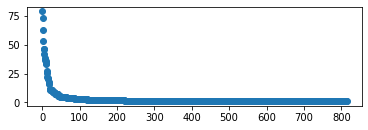

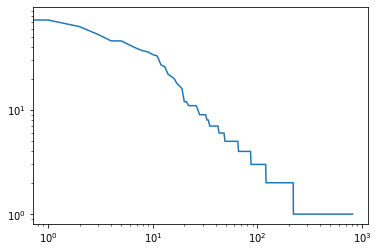

In [ ]:
clean_11 = data['letters_text'].to_string()

# tokenize with spacy

nlp = spacy.load("en_core_web_sm")

def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

word_tokenize(clean_11)

# counting words

def wordCounter(wordLst):
    wordCounts = {}
    for word in wordLst:
        #We usually need to normalize the case
        wLower = word.lower()
        if wLower in wordCounts:
            wordCounts[wLower] += 1
        else:
            wordCounts[wLower] = 1
    #convert to DataFrame
    countsForFrame = {'word' : [], 'count' : []}
    for w, c in wordCounts.items():
        countsForFrame['word'].append(w)
        countsForFrame['count'].append(c)
    return pandas.DataFrame(countsForFrame)

countedWords = wordCounter(word_tokenize(clean_11))
countedWords[:10]

countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

fig = plt.figure()
ax = fig.add_subplot(212)
plt.scatter(range(len(countedWords)), countedWords['count'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

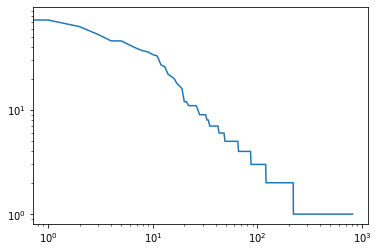

In [ ]:
# log transform the plot

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [ ]:
# ObamaClintonReleases['tokenized_text'] = ObamaClintonReleases['text'].apply(lambda x: lucem_illud.word_tokenize(x))
# ObamaClintonReleases['normalized_text'] = ObamaClintonReleases['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))

In [ ]:
df = data
df['tokenized_letters'] = df['letters_text'].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df['letter_word_count'] = df['tokenized_letters'].apply(lambda x: len(x))
df['letter_word_count']

0       766
1       405
2       400
3       296
4      1475
       ... 
220     118
221     744
222     353
223    1512
224     661
Name: letter_word_count, Length: 225, dtype: int64

In [ ]:
# word count for all letters

countsDict = {}
for word in df['tokenized_letters'].sum():
    word_lower = word.lower()
    if word_lower in countsDict:
        countsDict[word_lower] += 1
    else:
        countsDict[word_lower] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:300]

[('the', 4488),
 ('to', 4134),
 ('and', 3711),
 ('of', 2774),
 ('in', 2047),
 ('a', 1986),
 ('i', 1694),
 ('we', 1653),
 ('that', 1433),
 ('our', 1338),
 ('my', 1090),
 ('is', 986),
 ('have', 957),
 ('for', 953),
 ('with', 715),
 ('it', 694),
 ('as', 645),
 ('this', 624),
 ('are', 606),
 ('giving', 575),
 ('on', 481),
 ('be', 453),
 ('pledge', 445),
 ('world', 419),
 ('their', 407),
 ('was', 386),
 ('at', 366),
 ('not', 362),
 ('more', 361),
 ('by', 356),
 ('will', 356),
 ('can', 343),
 ('from', 339),
 ('us', 339),
 ('people', 333),
 ('who', 303),
 ('you', 297),
 ('has', 293),
 ('an', 291),
 ('been', 291),
 ('all', 289),
 ('or', 288),
 ('do', 285),
 ('others', 271),
 ('but', 270),
 ('life', 268),
 ('me', 267),
 ('wealth', 256),
 ('years', 255),
 ('philanthropy', 253),
 ('family', 249),
 ('many', 248),
 ('one', 244),
 ('’s', 243),
 ('so', 232),
 ('than', 232),
 ('make', 231),
 ('time', 230),
 ('give', 229),
 ('foundation', 225),
 ('also', 214),
 ('work', 208),
 ('those', 203),
 ('educat

In [ ]:
# create a list of stop words based on a manually decided break

'''
stop_words_freq = []
for word, count in word_counts:
    if word == 'giving':
        break
    else:
        stop_words_freq.append(word)
stop_words_freq 
'''

In [ ]:
# normalization

def normalizeTokens(word_list, extra_stop=[], fewer_stop=[]):
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    # remove the property of stop words to words not so considered
    if len(fewer_stop) > 0:
        for stopword in fewer_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = False

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized


In [ ]:

df['normalized_letters'] = df['tokenized_letters'].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never'], fewer_stop=['i', 'more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df['normalized_letters'].apply(lambda x: len(x))

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

In [ ]:
nlp.vocab["the"].is_stop = True
nlp.vocab["the"].is_stop

True

In [ ]:
# normalized word count for all letters

countsDict = {}
for word in df['normalized_letters'].sum():
    word_lower = word.lower()
    if word_lower in countsDict:
        countsDict[word_lower] += 1
    else:
        countsDict[word_lower] = 1
word_counts = sorted(countsDict.items(), key = lambda x : x[1], reverse = True)
word_counts[:50]

[('life', 359),
 ('be', 352),
 ('more', 315),
 ('world', 304),
 ('will', 297),
 ('can', 295),
 ('people', 284),
 ('give', 273),
 ('help', 273),
 ('work', 250),
 ('family', 241),
 ('time', 220),
 ('philanthropy', 219),
 ('give_pledge', 218),
 ('pledge', 212),
 ('year', 210),
 ('good', 205),
 ('child', 202),
 ('foundation', 199),
 ('wealth', 193),
 ('great', 184),
 ('support', 184),
 ('opportunity', 182),
 ('need', 169),
 ('create', 163),
 ('most', 162),
 ('education', 160),
 ('believe', 155),
 ('community', 152),
 ('business', 148),
 ('way', 140),
 ('hope', 137),
 ('focus', 124),
 ('philanthropic', 124),
 ('money', 123),
 ('country', 120),
 ('impact', 116),
 ('share', 116),
 ('live', 115),
 ('provide', 109),
 ('start', 108),
 ('learn', 103),
 ('come', 103),
 ('grow', 102),
 ('fortunate', 99),
 ('cause', 99),
 ('want', 98),
 ('feel', 97),
 ('like', 95),
 ('school', 95)]

In [ ]:
df.to_csv("/content/drive/MyDrive/gp_dataframe.csv")


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/gp_dataframe.csv")

In [ ]:
df = df2

In [ ]:
'''
# I drop rows witout letter texts
df_with_notstring = df2
s = df2
s[s.apply(lambda x: isinstance(x, str))]
'''

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


IndexingError: ignored

Remove quotes from letter's text

In [ ]:
import re
string = df2["letters_text"][1]
re.sub("(,[ ]*!.*)$", "", string)

'"I know how lucky my family and I have been and there are so many less fortunate in the world. I can’t imagine going through life without trying to make the world a better place than we found it. It doesn’t feel like something optional to me, but an obligation and one some of us should shoulder more than others."I know how lucky my family and I have been and there are so many less fortunate in the world. I can’t imagine going through life without trying to make the world a better place than we found it. It doesn’t feel like something optional to me, but an obligation and one some of us should shoulder more than others.When I was five, I remember giving birthday and chore money to the homeless. Seeing those who are living on the street was the most striking example of people who are struggling. As I got older, I realized how life can reward the few and so many are left behind. This brought my attention to a number of causes like the Make-A-Wish Foundation and St. Jude Children’s Resear

In [ ]:
str(df2["letters_text"][19])

'"Whether it\'s through improving education, creating a more level playing field, or increasing economic freedom, I\'m interested in helping more people see their ideas come to fruition in the world."About ten years ago I wrote down a goal: "start a billion dollar tech company." I associated a billion dollar valuation with scale and impact. It meant creating a product that reached millions of people around the world and building an amazing team to do it.At the time it seemed ridiculous. I had never started a company worth a thousand dollars, much less a billion, so I had no business attempting something so ambitious. But day after day, I continued writing down that goal, figuring it wouldn\'t hurt to stay focused. Fast forward ten years, and through a lot of determination and luck I am now the founder of a multi-billion dollar company.Once a certain level of wealth is reached, there is little additional utility from spending more on yourself. One\'s ambition begins to move outwards. I\

'\\\\'

In [ ]:
import re
strings = df2["letters_text"]
strings = [re.sub("“", "\"", str(x)) for x in strings]
strings = [re.sub("”", "\"", str(x)) for x in strings]
#strings = [re.sub(r'\\\\', "", str(x)) for x in strings]
df2["letters_text_noquote"]= [re.sub("[\"'].*?['\"]","", str(x), count=1) for x in strings]


In [ ]:
df2["letters_text_noquote"][:20 ]

0     In 2019, Jon suffered a catastrophic accident ...
1     I know how lucky my family and I have been and...
2     There is a limit to how much wealth one person...
3     Money has never been an end goal for either of...
4     My family foundation and its giving arm—Dataph...
5     We’ve long had a 2-step plan for Canva:With th...
6     November 12, 2021Giving PledgeWe write this le...
7     11 de agosto de 2021Nossa força motriz sempre ...
8     May 11, 2021The Giving Pledge,It is an honor t...
9     25th March 2021Dear Melinda & Bill,I feel deep...
10    안녕하세요, 형미선・김범수입니다.1995년 마이크로소프트 창립 20주년 특집 기사를...
11    안녕하세요 김봉진, 설보미입니다.우선 빌게이츠와 워런버핏 그리고 앞선 218분의 기...
12                                                  nan
13    TROTT FAMILY PHILANTHROPIES January 1, 2021Dea...
14    January 2020Dear Bill,I’m very pleased to join...
15    1/26/2020Sharing is always an evolving feature...
16    Our Giving Pledge,Most people believe that mon...
17    September 10, 2019JIM PATTISONThe Giving P

In [ ]:
df2.to_csv("/content/drive/MyDrive/gp_dataframe_noquote.csv")

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/gp_dataframe_noquote.csv")

df = df2

/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:126: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

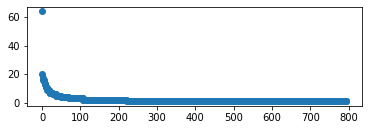

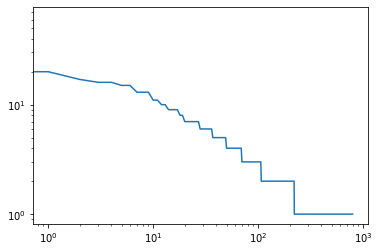

In [ ]:
clean_11 = df['normalized_letters'].to_string()

# tokenize with spacy

nlp = spacy.load("en_core_web_sm")

countedWords = wordCounter(word_tokenize(clean_11))
countedWords[:10]

countedWords.sort_values('count', ascending=False, inplace=True)
countedWords[:100]

fig = plt.figure()
ax = fig.add_subplot(212)
plt.scatter(range(len(countedWords)), countedWords['count'])
plt.show()

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(range(len(countedWords)), countedWords['count'])
ax.set_yscale('log')
ax.set_xscale('log')
plt.show()

In [ ]:
# I drop rows witout letter texts
df_with_nan = df
df = df[(~df["letters_text"].isna())]

TOPIC MODELLING

I want to run multiple topic models on

1. raw text df1

2. normalied text df2
3. normalized text with certain stopwards kept df3
4. pos_tagged text df4


In [ ]:
import gensim.corpora as corpora  
# Plotting tools
!pip install pyLDAvis

import pyLDAvis

import matplotlib.pyplot as plt
%matplotlib inline

     |████████████████████████████████| 1.7 MB 2.6 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=fd47a9e3570040c5e75a8c19a8ee9541e23e8d27d7a2034eb8ab28802c67a96b
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [ ]:
import pyLDAvis.gensim_models

In [ ]:
#!pip install pyLDAvis # don't skip this
#import pyLDAvis.gensim  # don't skip this

ModuleNotFoundError: ignored

In [ ]:
df['normalized_letters'][1]

['i',
 'know',
 'lucky',
 'family',
 'i',
 'fortunate',
 'world',
 'i',
 'imagine',
 'go',
 'life',
 'try',
 'world',
 'well',
 'place',
 'find',
 'feel',
 'like',
 'optional',
 'obligation',
 'shoulder',
 'more',
 'i',
 'know',
 'lucky',
 'family',
 'i',
 'fortunate',
 'world',
 'i',
 'imagine',
 'go',
 'life',
 'try',
 'world',
 'well',
 'place',
 'find',
 'feel',
 'like',
 'optional',
 'obligation',
 'shoulder',
 'more',
 'i',
 'be',
 'i',
 'remember',
 'give',
 'birthday',
 'chore',
 'money',
 'homeless',
 'see',
 'live',
 'street',
 'be',
 'most',
 'striking',
 'example',
 'people',
 'struggle',
 'i',
 'get',
 'old',
 'i',
 'realize',
 'life',
 'can',
 'reward',
 'leave',
 'bring',
 'attention',
 'number',
 'cause',
 'like',
 'wish',
 'foundation',
 'st',
 'jude',
 'children',
 'research',
 'hospital',
 'opportunity',
 'present',
 'lead',
 'world',
 'civilian',
 'mission',
 'space',
 'i',
 'realize',
 'world',
 'benefit',
 'mission',
 'extraordinary',
 'way',
 'important',
 'progr

In [ ]:
# Create Dictionary
dataset = df['normalized_letters'] #[d.split() for d in df['normalized_letters']]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 10), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1

In [ ]:
id2word[73]

"'direction',"

In [ ]:
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

[[("'abound',", 1),
  ("'accident',", 1),
  ("'accumulation',", 1),
  ("'achievable',", 2),
  ("'achieve',", 1),
  ("'adequate',", 1),
  ("'adjust',", 1),
  ("'africa',", 2),
  ("'alive',", 1),
  ("'altogether',", 2),
  ("'america',", 1),
  ("'animal',", 1),
  ("'apex',", 2),
  ("'apply',", 1),
  ("'approach',", 1),
  ("'arguably',", 1),
  ("'asia',", 1),
  ("'ayer']", 1),
  ("'background',", 1),
  ("'be',", 1),
  ("'beauty',", 1),
  ("'believe',", 2),
  ("'beloved',", 1),
  ("'big',", 1),
  ("'biodiversity',", 4),
  ("'biology',", 1),
  ("'board',", 1),
  ("'breed',", 1),
  ("'business',", 1),
  ("'can',", 1),
  ("'canada',", 1),
  ("'capital',", 2),
  ("'carbon',", 2),
  ("'career',", 1),
  ("'cat',", 8),
  ("'catastrophic',", 1),
  ("'central',", 1),
  ("'certainly',", 1),
  ("'chain',", 1),
  ("'chair',", 1),
  ("'change',", 1),
  ("'choose',", 2),
  ("'cite',", 1),
  ("'climate',", 1),
  ("'coast',", 1),
  ("'coastal',", 1),
  ("'combat',", 1),
  ("'commercial',", 1),
  ("'commitm

In [ ]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

In [ ]:
# Print the Keyword in the 10 topics
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(98, '0.000*"\'i\'," + 0.000*"\'people\'," + 0.000*"\'can\'," + 0.000*"\'opportunity\'," + 0.000*"\'problem\'," + 0.000*"\'philanthropy\'," + 0.000*"\'money\'," + 0.000*"\'life\'," + 0.000*"\'education\'," + 0.000*"\'most\',"'), (2, '0.000*"\'work\'," + 0.000*"\'system\'," + 0.000*"\'mark\'," + 0.000*"\'science\'," + 0.000*"\'i\'," + 0.000*"\'life\'," + 0.000*"\'will\'," + 0.000*"\'community\'," + 0.000*"\'seek\'," + 0.000*"\'people\',"'), (54, '0.000*"\'그\'," + 0.000*"\'philanthropy\'," + 0.000*"\'통해\'," + 0.000*"\'give\'," + 0.000*"\'작은\'," + 0.000*"\'이\'," + 0.000*"\'energy\'," + 0.000*"\'philanthropic\'," + 0.000*"\'더\'," + 0.000*"\'그리고\',"'), (55, '0.000*"\'education\'," + 0.000*"\'inspire\'," + 0.000*"\'teacher\'," + 0.000*"\'more\'," + 0.000*"\'public\'," + 0.000*"\'school\'," + 0.000*"\'high\'," + 0.000*"\'create\'," + 0.000*"\'right\'," + 0.000*"\'work\',"'), (52, '0.000*"\'de\'," + 0.000*"\'e\'," + 0.000*"\'que\'," + 0.000*"\'uma\'," + 0.000*"\'para\'," + 0.000*"\'o\'," + 0.

In [ ]:
topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

Topic_0         Topic_1          Topic_2    Topic_3         Topic_4  \
0         'give',         'paul',        'hilton',       'i',           'ai',   
1   'foundation',   'impossible',         'stock',      'be',         'miss',   
2       'people',        'giver',  'conservation',    'will',         'fail',   
3         'work',  'association',           'cat',    'more',     'prospect',   
4    'education',        'shall',        'specie',    'feel',       'turner',   
5        'world',        'fruit',        'conrad',  'pledge',    'ambitious',   
6        'child',         'dime',        'hotels',   'world',        ['feel',   
7      'support',       'spirit',     'berkshire',  'wealth',  'alternative',   
8  'opportunity',     'ministry',          'wild',  'giving',   'anticipate',   
9    'community',    'christmas',           'jon',     'can',    'computing',   

        Topic_5       Topic_6       Topic_7        Topic_8 Topic_9  \
0          'i',   'research',     'choose',         'bit',    '그',   
1   'patience',       'hope',       'work',   'endowment',   '통해',   
2       'good',  'institute',   'industry',         'law',    '이',   
3       'give',      'share',       'give',        'firm',  '그리고',   
4       'life',       'life',  'intention',      'pledge',    '더',   
5  'important',       'give',   'compound',  'individual',  '수많은',   
6        'end',       'will',     'choice',           'i',   '기부',   
7     'global',       'term',       'real',    'practice',    '잘',   
8     'pledge',       'year',        'gas',     'involve',   '제가',   
9      'share',       'long',        'say',        'gift',   '작은',   

          Topic_10 Topic_11           Topic_12    Topic_13           Topic_14  \
0        'create',    'de',            'trip',   'jewish',    'philanthropy',   
1         'india',     'e',         'garrett',     'jews',       'challenge',   
2  'organization',   'que',  'camp.orgrepost',      'oil',            'idea',   
3         'human',   'uma',   'info@camp.org',    'speak',             'way',   
4         'scale',     'o',         'opening',  'judaism',          'belief',   
5    'technology',  'para',       'impressed',   'harold',          'system',   
6   'fundamental',    'na',            'expa',     'kurt',            'will',   
7      'platform',    'في',          'safari',  'passion',        'economic',   
8           'use',   'nos',     'impractical',   'people',     'opportunity',   
9            'ma',    'من',         'startup',     'know',  'responsibility',   

      Topic_15         Topic_16         Topic_17      Topic_18       Topic_19  
0      'help',    'scientific',         'katja',          'i',      'wealth',  
1    'people',        'secret',             '이',  'scientist',     'instead',  
2   'provide',          'give',      'increase',  'president',    'treasure',  
3      'find',       'regular',        'fossil',  'treatment',   'lifestyle',  
4  'clinical',        'report',           'ako',        'can',      'valley',  
5   'disease',  'philanthropy',            '대한',   'publicly',  'admiration',  
6     'susan',      'approach',        'rwanda',       'late',     'silicon',  
7      'bear',         'world',        'jeremy',      'dozen',      'career',  
8    'market',        'pledge',        'mainly',      'owner',       'ready',  
9      'need',          'work',  'homelessness',       'want',        'make',

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.175136 -0.181426       1        1  31.006934
3     -0.317431  0.144113       2        1  24.476114
5     -0.164369 -0.137070       3        1   9.065633
14    -0.199559 -0.187736       4        1   6.768413
18    -0.117693  0.068521       5        1   5.377942
6     -0.293799 -0.012006       6        1   4.879116
16    -0.094972 -0.082490       7        1   4.186665
15     0.093652 -0.068186       8        1   2.597667
8     -0.296413  0.256988       9        1   2.017895
7      0.072031 -0.026959      10        1   1.650085
10     0.120059 -0.005065      11        1   1.571780
11     0.164212  0.036958      12        1   1.438051
13     0.150439  0.031173      13        1   1.160795
17     0.161541  0.032221      14        1   0.972633
2      0.157997  0.027579      15        1   0.784745
9      0.158899  0.027388      16        1   0.777292
19     0.133611  0.017133      17        1   0.547188
1      0.153184  0.028176      18        1   0.508637
4      0.148568  0.016676      19        1   0.165488
12     0.145179  0.014015      20        1   0.046928, topic_info=               Term         Freq        Total Category  logprob  loglift
318            'i',  1752.000000  1752.000000  Default  30.0000  30.0000
440   'scientific',   207.000000   207.000000  Default  29.0000  29.0000
441    'scientist',   196.000000   196.000000  Default  28.0000  28.0000
2975    'patience',   202.000000   202.000000  Default  27.0000  27.0000
105         'give',   581.000000   581.000000  Default  26.0000  26.0000
...             ...          ...          ...      ...      ...      ...
191   'population',     0.003392     7.459273  Topic20  -8.8206  -0.0314
2695       'water',     0.003392     4.640232  Topic20  -8.8206   0.4433
274         'work',     0.003392   292.628203  Topic20  -8.8206  -3.7008
280         'area',     0.003392    84.314538  Topic20  -8.8207  -2.4565
105         'give',     0.003392   581.400255  Topic20  -8.8207  -4.3874

[1057 rows x 6 columns], token_table=      Topic      Freq                  Term
term                                       
511       1  0.787138             '-PRON-',
511       5  0.046302             '-PRON-',
511      12  0.138907             '-PRON-',
6515      9  0.830977           '2010like',
6507      4  0.962141  '2010philanthropic',
...     ...       ...                   ...
1588     14  0.432329                '해결에',
3722     17  0.777892               ['act',
3710     17  0.777893               ['let',
3818     17  0.607535              ['only',
4329     18  0.769903         ['recognize',

[1599 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 4, 6, 15, 19, 7, 17, 16, 9, 8, 11, 12, 14, 18, 3, 10, 20, 2, 5, 13])

# Topic models for the nonquote corpus with extra stopwords. 

# Running many models

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'pledger_name',
       'principal_related_foundation', 'residence', 'net_worth', 'joined',
       'bio', 'name', 'letters_text', 'name.1', 'tokenized_letters',
       'letter_word_count', 'normalized_letters', 'normalized_letters_count',
       'letters_text_noquote'],
      dtype='object')

In [ ]:
text = 'letters_text'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'


df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis







/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

[[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 2), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 10), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.127689 -0.019268       1        1   0.310221
1      0.375269 -0.076209       2        1  10.033626
2     -0.113489 -0.003973       3        1   0.005407
3     -0.116919 -0.007007       4        1   0.081442
4      0.164075  0.132484       5        1   8.467834
5      0.115484  0.125580       6        1   7.465983
6      0.052813  0.083367       7        1   4.881840
7     -0.135715 -0.027225       8        1   0.720963
8     -0.023315  0.073701       9        1   4.076608
9     -0.120738  0.004319      10        1   1.193721
10     0.258543  0.200384      11        1  34.151195
11    -0.113445 -0.004293      12        1   1.016896
12     0.315518 -0.170773      13        1   6.836645
13    -0.116414 -0.025920      14        1   0.764236
14    -0.141926 -0.035736      15        1   0.988252
15     0.240464 -0.152922      16        1  17.070171
16    -0.132493 -0.024672      17        1   0.514957
17    -0.144361 -0.046394      18        1   1.376708
18    -0.113489 -0.003974      19        1   0.005217
19    -0.122173 -0.021471      20        1   0.038080, topic_info=              Term        Freq      Total Category  logprob  loglift
313           help  294.000000  294.00000  Default  30.0000  30.0000
182         people  323.000000  323.00000  Default  29.0000  29.0000
474           hope  232.000000  232.00000  Default  28.0000  28.0000
105           give  611.000000  611.00000  Default  27.0000  27.0000
350       research  121.000000  121.00000  Default  26.0000  26.0000
...            ...         ...        ...      ...      ...      ...
6358    nationally    0.005165    8.60205  Topic20  -8.1523   0.4555
6359     pledgeour    0.005165    8.60205  Topic20  -8.1523   0.4555
6360  productivity    0.005165    8.60205  Topic20  -8.1523   0.4555
6361     radically    0.005165    8.60205  Topic20  -8.1523   0.4555
6362      register    0.005165    8.60205  Topic20  -8.1523   0.4555

[1086 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
793      18  0.822125      -PRON-
6342     13  0.930011   1,000.the
1301     15  0.654797       100명의
4951     14  0.784791        1960
6343     13  0.930011  2000.today
...     ...       ...         ...
1570     15  0.522840          함께
1571     15  0.417292        합니다.
1571     18  0.417292        합니다.
1572     15  0.417294         해결에
1572     18  0.417294         해결에

[1449 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

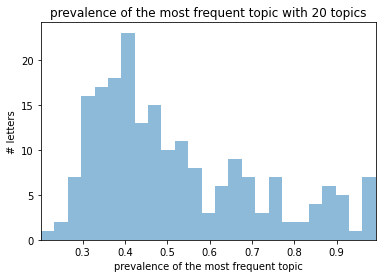

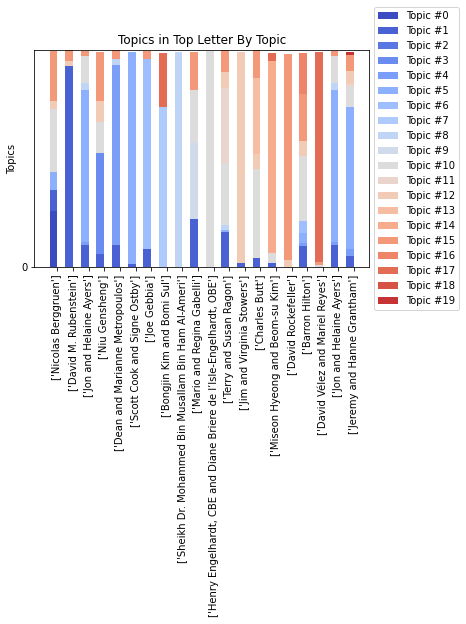

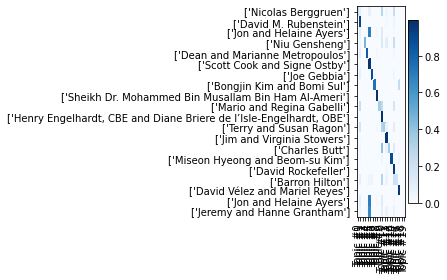

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
206                     Nicolas Berggruen   
223                      David Rubenstein   
0                                           
101                                         
90                                          
71                             Scott Cook   
74                                          
11                                          
33                                          
76                                          
98                       Henry Engelhardt   
89                                          
224                                         
39             Charles Butt, Charles Butt   
10                                          
222  David Rockefeller, David Rockefeller   
211                                         
7                                           
0                                           
22                                          

                                          letters_text  topic_#  
206  “Everyone is dealt a group of cards at birth. ...        0  
223  "I do hope that others involved in this effort...        1  
0    "Humanity has a limited amount of time to turn...        2  
101  “Small victories are based on wisdom, great vi...        3  
90   “The true measure of who we are and the ultima...        4  
71   "Rather than waiting, we are giving now. The c...        5  
74   “I want to devote my resources to bring the mo...        6  
11   "We are certain that this pledge is the greate...        7  
33   “Based on the principles of our Islamic religi...        8  
76   "'The measure of who we are is what we do with...        9  
98   “In business and in our personal lives, we hav...       10  
89   “Susan and I often find ourselves wondering, ‘...       11  
224  "Our vision is to make a significant contribut...       12  
39   “Over the past 30 years, my personal philanthr...       13  
10   "With this pledge as our starting point, my wi...       14  
222  “Our family continues to be united in the beli...       15  
211  “It is my hope that others are inspired by my ...       16  
7    "There is extreme urgency to invest wealth now...       17  
0    "Humanity has a limited amount of time to turn...       18  
22   "This is a winnable war (against environmental...       19

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title(f'prevalence of the most frequent topic with {lda_model.num_topics} topics')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text","topic_#"]]

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'


df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF

print(wordRanksDF)


# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis







<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: Dep

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 9), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

LDA keywords:
[(0, '0.068*"proceed" + 0.067*"campus" + 0.065*"treatment" + 0.038*"jewish" + 0.038*"environmental" + 0.037*"independent" + 0.036*"finally" + 0.033*"keep" + 0.010*"vision" + 0.009*"degree"'), (1, '0.010*"care" + 0.010*"teacher" + 0.008*"science" + 0.008*"gordon" + 0.007*"need" + 0.007*"fun" + 0.007*"therapy" + 0.007*"child" + 0.006*"impactful" + 0.006*"pre"'), (2, '0.000*"de" + 0.000*"e" + 0.000*"pledge" + 0.000*"life" + 0.000*"world" + 0.000*"give" + 0.000*"que" + 0.000*"child" + 0.000*"more" + 0.000*"people"'), (3, '0.016*"can" + 0.015*"dream" + 0.014*"want" + 0.011*"be" + 0.010*"see" + 0.009*"like" + 0.009*"school" + 0.008*"people" + 0.008*"grow" + 0.008*"oil"'), (4, '0.010*"portion" + 0.008*"uk" + 0.008*"fair" + 0.008*"corporation" + 0.007*"charitable" + 0.006*"business" + 0.006*"lifestyle" + 0.006*"management" + 0.006*"father" + 0.006*"right"'), (5, '0.027*"give" + 0.018*"life" + 0.016*"support" + 0.015*"education" + 0.014*"foundation" + 0.013*"work" + 0.011*"people"

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
8     -0.203275  0.074803       1        1  27.217313
5     -0.213548  0.160982       2        1  25.300957
11    -0.357672 -0.176704       3        1  11.616775
14    -0.108826  0.125087       4        1   7.459694
10    -0.200189 -0.254069       5        1   6.465629
18    -0.323377  0.106212       6        1   5.313234
9     -0.041501 -0.018410       7        1   3.946051
17    -0.017045  0.072138       8        1   2.950581
3      0.032618  0.006160       9        1   1.705784
1      0.102098  0.009366      10        1   1.653054
16     0.151055 -0.026099      11        1   1.268123
0      0.079430  0.032271      12        1   1.146830
4      0.129182  0.005895      13        1   1.129837
7      0.150962 -0.024437      14        1   1.045097
13     0.143061 -0.017387      15        1   0.521970
19     0.138780 -0.016506      16        1   0.495601
12     0.139921 -0.016137      17        1   0.425328
6      0.144426 -0.022349      18        1   0.326422
15     0.126949 -0.010409      19        1   0.005903
2      0.126950 -0.010409      20        1   0.005815, topic_info=       Term        Freq       Total Category  logprob  loglift
105    give  510.000000  510.000000  Default  30.0000  30.0000
474    hope  221.000000  221.000000  Default  29.0000  29.0000
182  people  254.000000  254.000000  Default  28.0000  28.0000
19       be  316.000000  316.000000  Default  27.0000  27.0000
288   child  180.000000  180.000000  Default  26.0000  26.0000
..      ...         ...         ...      ...      ...      ...
96   family    0.000396  266.862856  Topic20  -8.7563  -3.6681
166    need    0.000396  148.346520  Topic20  -8.7563  -3.0809
998       o    0.000396    5.148849  Topic20  -8.7563   0.2799
147    like    0.000396   94.858930  Topic20  -8.7563  -2.6337
63   create    0.000396  138.000924  Topic20  -8.7563  -3.0086

[1075 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1095      1  0.021692     $
1095      2  0.238610     $
1095      3  0.043384     $
1095      5  0.477220     $
1095      6  0.151843     $
...     ...       ...   ...
1513     14  0.864519    있는
1554     14  0.771224    통해
1564     14  0.521016    함께
1565     14  0.864519  합니다.
1566     14  0.864519   해결에

[1498 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[9, 6, 12, 15, 11, 19, 10, 18, 4, 2, 17, 1, 5, 8, 14, 20, 13, 7, 16, 3])

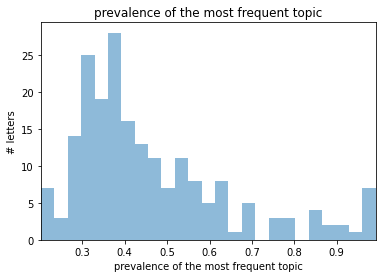

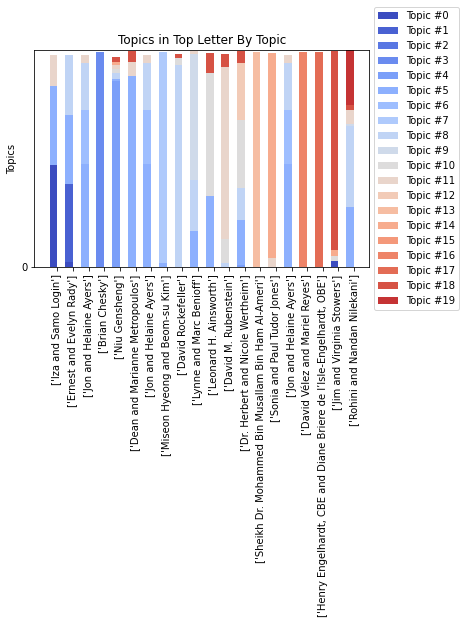

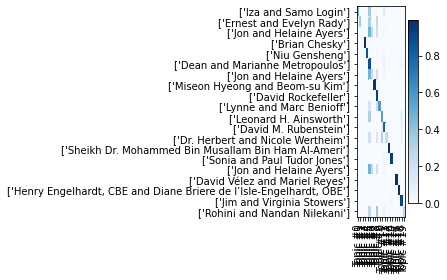

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
61                                  Iza and Samo Login   
42                              Ernest and Evelyn Rady   
0                                Jon and Helaine Ayers   
95                                        Brian Chesky   
101                                       Gensheng Niu   
90                       Dean and Marianne Metropoulos   
0                                Jon and Helaine Ayers   
10                       Miseon Hyeong and Beom-su Kim   
222                                  David Rockefeller   
93                              Lynne and Marc Benioff   
63                                Leonard H. Ainsworth   
223                                David M. Rubenstein   
106                    Dr. Herbert and Nicole Wertheim   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
47                          Sonia and Paul Tudor Jones   
0                                Jon and Helaine Ayers   
7                         David Vélez and Mariel Reyes   
73   Henry Engelhardt and Diane Briere de l'Isle-En...   
224                           Jim and Virginia Stowers   
50                          Rohini and Nandan Nilekani   

                                          letters_text  topic_#  
61   "Not only are we pledging to spend the great m...        0  
42   “Personally, there are four things for which I...        1  
0    "Humanity has a limited amount of time to turn...        2  
95   “There is a saying that a great trip can set y...        3  
101  “Small victories are based on wisdom, great vi...        4  
90   “The true measure of who we are and the ultima...        5  
0    "Humanity has a limited amount of time to turn...        6  
10   "With this pledge as our starting point, my wi...        7  
222  “Our family continues to be united in the beli...        8  
93   “We believe that in order for our communities ...        9  
63   “It is my great pleasure to provide this Givin...       10  
223  "I do hope that others involved in this effort...       11  
106  “Many of America’s private universities have m...       12  
33   “Based on the principles of our Islamic religi...       13  
47   "We have found that all giving is joyous; true...       14  
0    "Humanity has a limited amount of time to turn...       15  
7    "There is extreme urgency to invest wealth now...       16  
73   “In business and in our personal lives, we hav...       17  
224  "Our vision is to make a significant contribut...       18  
50   “We thank Bill and Melinda for creating this u...       19

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text", "topic_#"]]

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'


df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis








/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pan

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 9), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.154227 -0.054771       1        1  49.708665
4     -0.064489 -0.152470       2        1  21.101033
8     -0.281108 -0.125695       3        1  10.915537
0     -0.241644  0.041860       4        1   5.003415
1     -0.150182  0.294592       5        1   4.681273
7      0.195130  0.006890       6        1   2.513596
6      0.201357  0.010992       7        1   2.321431
3      0.190844  0.006269       8        1   2.112406
9      0.138835 -0.021336       9        1   1.602390
2      0.165483 -0.006332      10        1   0.040255, topic_info=              Term       Freq       Total Category  logprob  loglift
674   philanthropy  227.00000  227.000000  Default  30.0000  30.0000
474           hope  178.00000  178.000000  Default  29.0000  29.0000
271           will  309.00000  309.000000  Default  28.0000  28.0000
350       research  100.00000  100.000000  Default  27.0000  27.0000
105           give  545.00000  545.000000  Default  26.0000  26.0000
...            ...        ...         ...      ...      ...      ...
857             de    0.00271   14.307440  Topic10  -8.7681  -0.7539
2739      directly    0.00271   13.740874  Topic10  -8.7681  -0.7135
2738      champion    0.00271    7.274083  Topic10  -8.7681  -0.0774
1951        reform    0.00271    7.606895  Topic10  -8.7682  -0.1222
1108          aids    0.00271    8.066748  Topic10  -8.7682  -0.1809

[568 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
793       8  0.657948             -PRON-
6274      5  0.889544  2010philanthropic
3704      6  0.909580                2nd
2835      9  0.948297             abroad
2737      1  0.925811              abuse
...     ...       ...                ...
1786      7  0.503979                 작은
1787      7  0.503979                  잘
1796      7  0.503979                 제가
1554      6  0.243076                 통해
1554      7  0.486152                 통해

[801 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 5, 9, 1, 2, 8, 7, 4, 10, 3])

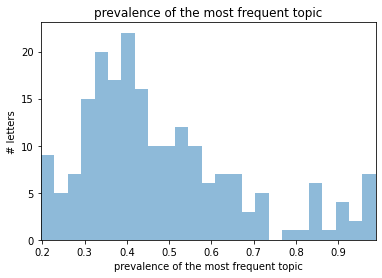

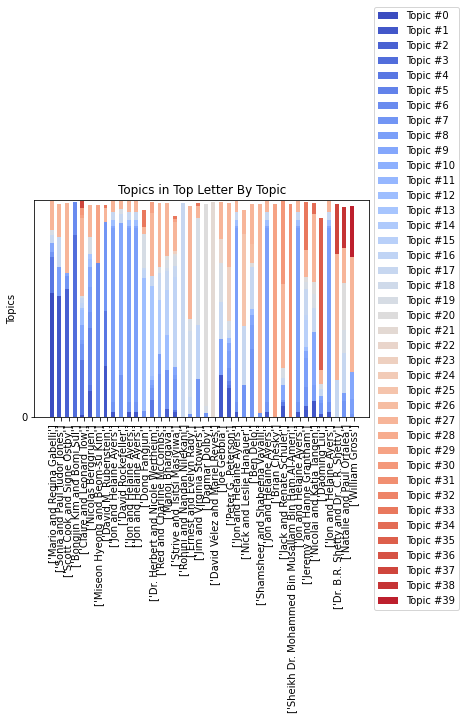

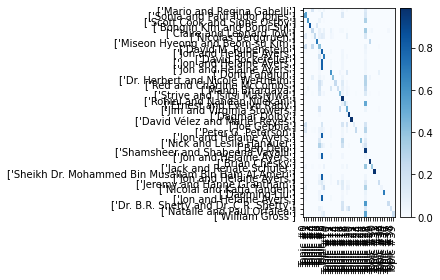

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
51                                          
47                                          
96                             Scott Cook   
11                                          
163                                         
206                     Nicolas Berggruen   
10                                          
223                      David Rubenstein   
0                                           
222  David Rockefeller, David Rockefeller   
0                                           
0                                           
54                                          
106                                         
176                                         
155                                         
123                                         
75                        Nandan Nilekani   
42                                          
224                                         
53                           Dagmar Dolby   
7                                           
99                                          
219                        Peter Peterson   
0                                           
55                                          
21                                          
46                                          
0                                           
95                                          
8                                           
33                                          
0                                           
22                                          
34                                          
28                                          
0                                           
41                            B.R. Shetty   
124                                         
15                                          

                                          letters_text  topic_#  max_topic_val  
51   "'The measure of who we are is what we do with...        0       0.571539  
47   "We have found that all giving is joyous; true...        1       0.557754  
96   "Rather than waiting, we are giving now. The c...        2       0.591735  
11   "We are certain that this pledge is the greate...        3       0.838531  
163  “Claire and I never believed that the wealth w...        4       0.253396  
206  “Everyone is dealt a group of cards at birth. ...        5       0.265112  
10   "With this pledge as our starting point, my wi...        6       0.708298  
223  "I do hope that others involved in this effort...        7       0.410134  
0    "Humanity has a limited amount of time to turn...        8       0.799575  
222  “Our family continues to be united in the beli...        9       0.700501  
0    "Humanity has a limited amount of time to turn...       10       0.000000  
0    "Humanity has a limited amount of time to turn...       11       0.000000  
54   "Let's create wealth through the diligent, pio...       12       0.609515  
106  “Many of America’s private universities have m...       13       0.410989  
176  “What we intend is for our gifts to make an ob...       14       0.247642  
155  “Service to others seems the only intelligent ...       15       0.205463  
123  “In making this pledge, to give not less than ...       16       0.415598  
75   “We thank Bill and Melinda for creating this u...       17       0.983497  
42   “Personally, there are four things for which I...       18       0.300721  
224  "Our vision is to make a significant contribut...       19       0.491473  
53   "I am delighted to confirm my plans to devote ...       20       0.927351  
7    "There is extreme urgency to invest wealth now...       21       0.988704  
99   “I want to devote my resources to bring the mo...       22       0.109382  
219  “As I watched and learned from my father's exa...       23       0.251171  
0    "Humanity has a limited amount of time to turn...       24       0.000000  
55   "There is no greater privilege than to be fort...       25       0.421490  
21  

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

In [ ]:
len(topicsProbDict[0])

203

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'


df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF


print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: Dep

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 9), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1)

/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.7/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

LDA keywords:
[(23, '0.000*"life" + 0.000*"family" + 0.000*"year" + 0.000*"give" + 0.000*"opportunity" + 0.000*"be" + 0.000*"pledge" + 0.000*"will" + 0.000*"can" + 0.000*"world"'), (13, '0.002*"الانسانية" + 0.002*"مختلفة" + 0.002*"تعهد" + 0.002*"شمولية" + 0.002*"منا" + 0.002*"طويل" + 0.000*"توحيد" + 0.000*"إن" + 0.000*"العمل" + 0.000*"كثيرة"'), (22, '0.000*"give" + 0.000*"can" + 0.000*"child" + 0.000*"life" + 0.000*"people" + 0.000*"year" + 0.000*"more" + 0.000*"world" + 0.000*"be" + 0.000*"pledge"'), (15, '0.002*"beauty" + 0.002*"bio" + 0.002*"logical" + 0.002*"preference" + 0.002*"locally" + 0.002*"pandemic" + 0.002*"mitigate" + 0.002*"artificial" + 0.002*"heartstring" + 0.000*"pure"'), (2, '0.033*"de" + 0.024*"e" + 0.018*"que" + 0.014*"uma" + 0.010*"o" + 0.010*"para" + 0.008*"nos" + 0.008*"na" + 0.006*"-PRON-" + 0.006*"maior"'), (25, '0.012*"morgan" + 0.010*"ultra" + 0.010*"™" + 0.010*"accessible" + 0.008*"wonderland" + 0.006*"camp" + 0.002*"wheel" + 0.002*"oxygen" + 0.002*"ventilat

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
11    -0.250886  0.196621       1        1  26.489345
14    -0.213448  0.178963       2        1  16.554290
8     -0.187446  0.148741       3        1  11.956904
9     -0.266012  0.048959       4        1   7.835116
29    -0.331363  0.162969       5        1   6.690544
18    -0.350667 -0.141921       6        1   5.471809
24    -0.255326 -0.200161       7        1   3.797428
5      0.074397 -0.005400       8        1   2.918777
28     0.012891 -0.057021       9        1   2.637266
26    -0.189877 -0.120606      10        1   2.383979
17    -0.038092  0.060025      11        1   2.227233
10     0.072502  0.033214      12        1   2.052579
0      0.123984 -0.003974      13        1   1.382018
2      0.146452 -0.018016      14        1   1.252321
3      0.080102  0.041802      15        1   1.136591
4      0.002333 -0.032406      16        1   1.038246
27     0.142841 -0.016181      17        1   0.954239
7      0.149323 -0.012216      18        1   0.952570
12    -0.195755 -0.300896      19        1   0.858098
6      0.147893 -0.009979      20        1   0.639976
1      0.138380  0.001852      21        1   0.249561
19     0.136567  0.002231      22        1   0.167241
20     0.135063  0.003387      23        1   0.112878
25     0.134011  0.003926      24        1   0.099693
21     0.132510  0.004832      25        1   0.065863
15     0.130535  0.005850      26        1   0.026057
16     0.130295  0.006078      27        1   0.019497
13     0.130128  0.006158      28        1   0.019079
22     0.129331  0.006584      29        1   0.005462
23     0.129332  0.006583      30        1   0.005340, topic_info=              Term        Freq       Total Category  logprob  loglift
105           give  547.000000  547.000000  Default  30.0000  30.0000
474           hope  197.000000  197.000000  Default  29.0000  29.0000
2056     institute  134.000000  134.000000  Default  28.0000  28.0000
19              be  331.000000  331.000000  Default  27.0000  27.0000
182         people  287.000000  287.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1207         share    0.000364  116.346161  Topic30  -8.7563  -2.8379
674   philanthropy    0.000364  217.333820  Topic30  -8.7563  -3.4628
1166      increase    0.000364   45.234142  Topic30  -8.7563  -1.8932
286          cause    0.000364  123.418903  Topic30  -8.7563  -2.8969
297      education    0.000364  184.615341  Topic30  -8.7563  -3.2996

[1553 rows x 6 columns], token_table=      Topic      Freq  Term
term                       
1095      3  0.061494     $
1095      4  0.092240     $
1095      5  0.184481     $
1095      6  0.030747     $
1095      7  0.338214     $
...     ...       ...   ...
1554      8  0.222709    통해
1554     18  0.668128    통해
1564     18  0.485372    함께
1565     18  0.789722  합니다.
1566     18  0.789722   해결에

[1992 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[12, 15, 9, 10, 30, 19, 25, 6, 29, 27, 18, 11, 1, 3, 4, 5, 28, 8, 13, 7, 2, 20, 21, 26, 22, 16, 17, 14, 23, 24])

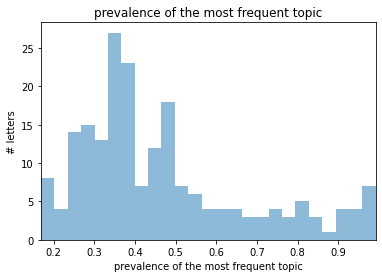

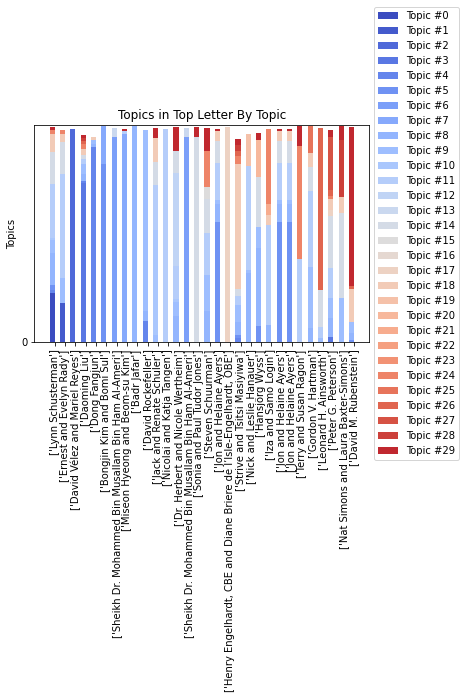

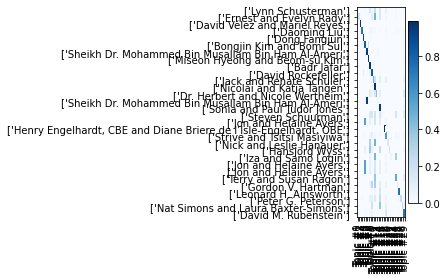

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
186                                   Lynn Schusterman   
42                              Ernest and Evelyn Rady   
7                         David Vélez and Mariel Reyes   
28                                         Daoming Liu   
79                                        DONG Fangjun   
11                            Bongjin Kim and Bomi Sul   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
10                       Miseon Hyeong and Beom-su Kim   
52                     Badr Jafar and Razan Al Mubarak   
222                                  David Rockefeller   
8                              Jack and Renate Schuler   
34                            Nicolai and Katja Tangen   
106                    Dr. Herbert and Nicole Wertheim   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
47                          Sonia and Paul Tudor Jones   
2                                     Steven Schuurman   
0                                Jon and Helaine Ayers   
73   Henry Engelhardt and Diane Briere de l'Isle-En...   
123                         Strive and Tsitsi Masiyiwa   
80                             Nick and Leslie Hanauer   
133                                      Hansjörg Wyss   
61                                  Iza and Samo Login   
0                                Jon and Helaine Ayers   
0                                Jon and Helaine Ayers   
64                               Terry and Susan Ragon   
24                                   Gordon V. Hartman   
88                                Leonard H. Ainsworth   
219                                  Peter G. Peterson   
62                  Nat Simons and Laura Baxter-Simons   
223                                David M. Rubenstein   

                                          letters_text  topic_#  
186  “We believe in the importance of investing in ...        0  
42   “Personally, there are four things for which I...        1  
7    "There is extreme urgency to invest wealth now...        2  
28   "A person, because of love, will be full of st...        3  
79   "Let's create wealth through the diligent, pio...        4  
11   "We are certain that this pledge is the greate...        5  
33   “Based on the principles of our Islamic religi...        6  
10   "With this pledge as our starting point, my wi...        7  
52   “Too much philanthropy in our region of the wo...        8  
222  “Our family continues to be united in the beli...        9  
8    “Joining The Giving Pledge and channeling the ...       10  
34   “At the end of the day, this is not about Katj...       11  
106  “Many of America’s private universities have m...       12  
33   “Based on the principles of our Islamic religi...       13  
47   "We have found that all giving is joyous; true...       14  
2    "There is a limit to how much wealth one perso...       15  
0    "Humanity has a limited amount of time to turn...       16  
73   “In business and in our personal lives, we hav...       17  
123  “In making this pledge, to give not less than ...       18  
80   "There is no greater privilege than to be fort...       19  
133  “President Thomas Jefferson reminds us: ‘There...       20  
61   "Not only are we pledging to spend the great m...       21  
0    "Humanity has a limited amount of time to turn...       22  
0    "Humanity has a limited amount of time to turn...       23  
64   “Susan and I often find ourselves wondering, ‘...       24  
24   "The cost of caring for a child or adult with ...       25  
88   “It is my great pleasure to provide this Givin...       26  
219  “As I watched and learned from my father's exa...       27  
62   "Over time we have learned to appreciate the i...       28  
223  "I do hope that others involved in this effort...       29

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text", "topic_#"]]

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'


df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=40, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<input>:7: DeprecationWarning: invalid escape sequence \.
<ipython-input-262-a08eea9c44e8>:7: DeprecationWarning: invalid escape sequence \.
  df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
<ipython-input-262-a08eea9c44e8>:7: DeprecationWarning: invalid escape sequence \.
  df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = [

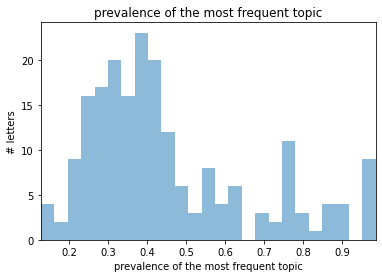

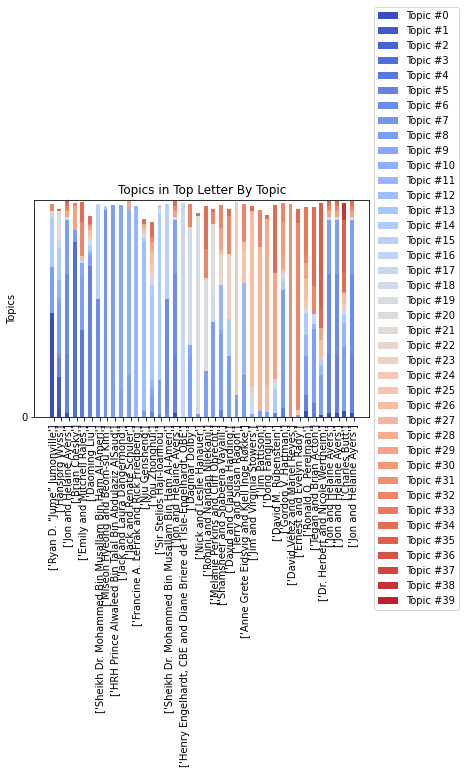

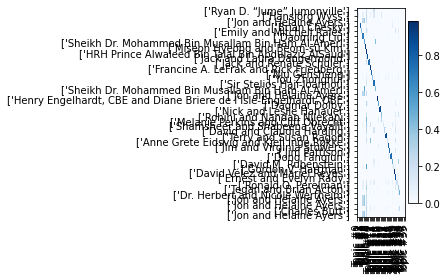

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
48                           Ryan D. “Jume” Jumonville   
133                                      Hansjörg Wyss   
0                                Jon and Helaine Ayers   
95                                        Brian Chesky   
30                            Emily and Mitchell Rales   
28                                         Daoming Liu   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
10                       Miseon Hyeong and Beom-su Kim   
92   HRH Prince Alwaleed Bin Talal Bin Abdulaziz Al...   
97                           Jack and Laura Dangermond   
8                              Jack and Renate Schuler   
27               Francine A. LeFrak and Rick Friedberg   
101                                       Gensheng Niu   
58                                        YOU Zhonghui   
85                            Sir Stelios Haji-Ioannou   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
0                                Jon and Helaine Ayers   
73   Henry Engelhardt and Diane Briere de l'Isle-En...   
53                                        Dagmar Dolby   
80                             Nick and Leslie Hanauer   
75                          Rohini and Nandan Nilekani   
5                    Melanie Perkins and Cliff Obrecht   
46                      Shamsheer and Shabeena Vayalil   
23                           David and Claudia Harding   
89                               Terry and Susan Ragon   
84             Anne Grete Eidsvig and Kjell Inge Røkke   
224                           Jim and Virginia Stowers   
17                                        Jim Pattison   
54                                        DONG Fangjun   
223                                David M. Rubenstein   
24                                   Gordon V. Hartman   
7                         David Vélez and Mariel Reyes   
42                              Ernest and Evelyn Rady   
218                                 Ronald O. Perelman   
18                               Tegan and Brian Acton   
106                    Dr. Herbert and Nicole Wertheim   
0                                Jon and Helaine Ayers   
0                                Jon and Helaine Ayers   
39                                        Charles Butt   
0                                Jon and Helaine Ayers   

                                          letters_text  topic_#  
48   “We are the “Human Race”, no man, woman, or ch...        0  
133  “President Thomas Jefferson reminds us: ‘There...        1  
0    "Humanity has a limited amount of time to turn...        2  
95   “There is a saying that a great trip can set y...        3  
30   "We are fortunate to have the opportunity to r...        4  
28   "A person, because of love, will be full of st...        5  
33   “Based on the principles of our Islamic religi...        6  
10   "With this pledge as our starting point, my wi...        7  
92   “It is our duty as philanthropists to harness ...        8  
97   "Our plan is to keep working for as long as we...        9  
8    “Joining The Giving Pledge and channeling the ...       10  
27   "We have lived our lives championing those who...       11  
101  “Small victories are based on wisdom, great vi...       12  
58   "Acting Positive makes people gain wisdom and ...       13  
85   "My belief is that nobody has a monopoly on go...       14  
33   “Based on the principles of our Islamic religi...       15  
0    "Humanity has a limited amount of time to turn...       16  
73   “In business and in our personal lives, we hav...       17  
53   "I am delighted to confirm my plans to devote ...       18  
80   "There is no greater privilege than to be fort...       19  
75   “We thank Bill and Melinda for creating this u...       20  
5    “We have this wildly optimistic belief that th...       21  
46   “For us, success means having created somethin...       22  
23   "I have been fortunate enough to pursue a fasc...       23  
89   “Susan and I oft

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text", "topic_#"]]

OTHER

# New Section

In [ ]:
def tag_sents_pos(sentences):
    """
    function which replicates NLTK pos tagging on sentences.
    """
    new_sents = []
    for sentence in sentences:
        new_sent = ' '.join(sentence)
        new_sents.append(new_sent)
    final_string = ' '.join(new_sents)
    doc = nlp(final_string)
    
    pos_sents = []
    for sent in doc.sents:
        pos_sent = []
        for token in sent:
            pos_sent.append((token.text, token.tag_))
        pos_sents.append(pos_sent)
    
    return pos_sents



text = 'POS_sents'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

df['POS_sents'] = df['letters_text_noquote'].apply(lambda x: tag_sents_pos(x))

df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col] # df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
wordRanksDF


print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use select.
  for entry_point in AVAILABLE_ENTRY_POINTS.get(self.entry_point_namespace, []):
/usr/local/lib/python3.7/dist-packages/catalogue.py:138: DeprecationWarning: SelectableGroups dict interface is deprecated. Use sele

KeyboardInterrupt: ignored

# Topic models with bigrams

In [ ]:
import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.phrases import Phrases

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim_models  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
bigram = gensim.models.Phrases(df['normalized_letters'], min_count=5, threshold=100) # higher threshold fewer phrases.


In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
def word_tokenize(word_list):
    tokenized = []
    # pass word list through language model.
    doc = nlp(word_list)
    for token in doc:
        if not token.is_punct and len(token.text.strip()) > 0:
            tokenized.append(token.text)
    return tokenized

In [ ]:
# normalization

def normalizeTokens(word_list, extra_stop=[], fewer_stop=[]):
    normalized = []
    if type(word_list) == list and len(word_list) == 1:
        word_list = word_list[0]

    if type(word_list) == list:
        word_list = ' '.join([str(elem) for elem in word_list]) 

    doc = nlp(word_list.lower())
    
    # add the property of stop word to words considered as stop words
    if len(extra_stop) > 0:
        for stopword in extra_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = True

    # remove the property of stop words to words not so considered
    if len(fewer_stop) > 0:
        for stopword in fewer_stop:
            lexeme = nlp.vocab[stopword]
            lexeme.is_stop = False

    for w in doc:
        # if it's not a stop word or punctuation mark, add it to our article
        if w.text != '\n' and not w.is_stop and not w.is_punct and not w.like_num and len(w.text.strip()) > 0:
            # we add the lematized version of the word
            normalized.append(str(w.lemma_))

    return normalized


Bigrams 40 topics



# W/ bigrams 10 topics

In [ ]:
df

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1               pledger_name  \
0             0             0               0      Jon and Helaine Ayers   
1             1             1               1  Jared and Monica Isaacman   
2             2             2               2           Steven Schuurman   
3             3             3               3      Patti Bao and Tony Xu   
4             4             4               4              Jeff T. Green   
..          ...           ...             ...                        ...   
220         220           220             220           T. Boone Pickens   
221         221           221             221   Julian H. Robertson, Jr.   
222         222           222             222          David Rockefeller   
223         223           223             223        David M. Rubenstein   
224         224           224             224   Jim and Virginia Stowers   

              principal_related_foundation                   residence  \
0                                      NaN         Fort Lauderdale, FL   
1                                      NaN        Easton, Pennsylvania   
2                      Dreamery Foundation  Amsterdam, The Netherlands   
3                                      NaN           San Francisco, CA   
4          Jeff T. Green Family Foundation            Newbury Park, CA   
..                                     ...                         ...   
220        The T. Boone Pickens Foundation                  Dallas, TX   
221                   Robertson Foundation                New York, NY   
222        Rockefeller Brothers Fund, Inc.           Sleepy Hollow, NY   
223              Information not available                Bethesda, MD   
224  Stowers Institute of Medical Research             Kansas City, MO   

        net_worth      joined  \
0    $541 million  12/14/2021   
1    $1.7 billion  12/14/2021   
2    $1.4 billion  12/14/2021   
3    $2.3 billion  11/30/2021   
4    $5.7 billion  11/16/2021   
..            ...         ...   
220    $1 billion  08/04/2010   
221  $3.6 billion  08/04/2010   
222    $3 billion  08/04/2010   
223  $2.2 billion  08/04/2010   
224  $100 million  08/04/2010   

                                                   bio  \
0    Jon and Helaine Ayers graduated from Yale Univ...   
1    Jared Isaacman is the founder of Draken Intern...   
2    Steven Schuurman is a Dutch technology and med...   
3    Tony Xu, a first-generation American who grew ...   
4    Jeff Green is the co-founder and CEO of the bu...   
..                                                 ...   
220  T. Boone Pickens founded the oil company later...   
221                                                NaN   
222  David Rockefeller was the former head of Chase...   
223  David M. Rubenstein is co-founder of the priva...   
224  Jim Stowers is the founder of American Century...   

                          name  \
0        Jon and Helaine Ayers   
1    Jared and Monica Isaacman   
2             Steven Schuurman   
3        Patti Bao and Tony Xu   
4                Jeff T. Green   
..                         ...   
220           T. Boone Pickens   
221   Julian H. Robertson, Jr.   
222          David Rockefeller   
223        David M. Rubenstein   
224   Jim and Virginia Stowers   

                                          letters_text  \
0    "Humanity has a limited amount of time to turn...   
1    "I know how lucky my family and I have been an...   
2    "There is a limit to how much wealth one perso...   
3    "Just like it was done for us, we hope to make...   
4    My family foundation and its giving arm—Dataph...   
..                                                 ...   
220  "I've long stated that I enjoy making money, a...   
221  "One very fortunate thing is that I did not ge...   
222  “Our family continues to be united in the beli...   
223  "I do hope that others involved in this effort...   
224  "Our vision is to make a significant contribut...   

   

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 9), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.253943 -0.218561       1        1   3.923974
1     -0.059728 -0.056698       2        1   5.388686
2     -0.164734 -0.010399       3        1   1.697756
3     -0.175442  0.001720       4        1   2.169474
4     -0.170399  0.002391       5        1   1.366302
5      0.167552  0.010099       6        1  70.829609
6     -0.181753  0.002161       7        1   2.720600
7      0.189882  0.273528       8        1   3.027616
8      0.311921 -0.005902       9        1   7.005815
9     -0.171242  0.001661      10        1   1.870168, topic_info=              Term        Freq       Total Category  logprob  loglift
105           give  541.000000  541.000000  Default  30.0000  30.0000
674   philanthropy  219.000000  219.000000  Default  29.0000  29.0000
271           will  315.000000  315.000000  Default  28.0000  28.0000
146           life  348.000000  348.000000  Default  27.0000  27.0000
187         pledge  415.000000  415.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
2744           hiv    2.011736    6.200872  Topic10  -5.9970   2.8534
2786          girl    2.150692    8.245405  Topic10  -5.9302   2.6353
101           find    2.498843   82.764462  Topic10  -5.7802   0.4790
230          south    1.680404   12.847943  Topic10  -6.1769   1.9450
3126        senior    1.646570    4.622494  Topic10  -6.1973   2.9469

[530 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
793       4  0.642640             -PRON-
6322      1  0.911441          1,000.the
6323      1  0.911441         2000.today
6275      8  0.947643  2010philanthropic
763       6  0.988879               able
...     ...       ...                ...
1507      7  0.785880                인생의
1513      7  0.785880                 있는
1554      7  0.915934                 통해
1565      7  0.785880               합니다.
1566      7  0.785880                해결에

[746 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

In [ ]:
wordRanksDF

Topic_0           Topic_1    Topic_2   Topic_3      Topic_4 Topic_5  \
0    research            jewish   clinical        de          tea    give   
1   institute               fit    african         e          san  pledge   
2        hope  enthusiastically     highly       que    francisco      be   
3       share           fulfill       gund       uma    programme   world   
4   endowment          uncommon  blindness         o          fun    life   
5        give              male    disease      para       sector  people   
6  scientific            abroad     relate        na  smallholder    work   
7        life              give      prize       nos         wood    help   
8        term            people     africa  lombardi           في    more   
9        year            father        ffb   singida  agriculture     can   

        Topic_6       Topic_7     Topic_8      Topic_9  
0             그  philanthropy      pledge        carry  
1             이      patience        will        icahn  
2            통해     challenge          be      justice  
3           cat          will        more        susan  
4            ma           way         law        rural  
5          wild          idea        feel      scholar  
6     lifestyle   rockefeller    resource  association  
7             더          good        year    operating  
8  conservation        effort      giving     caudwell  
9      platform       require  individual         find

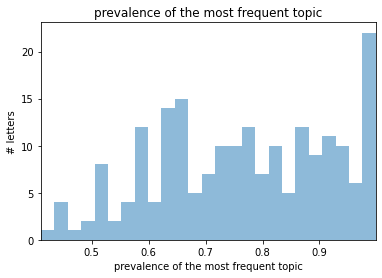

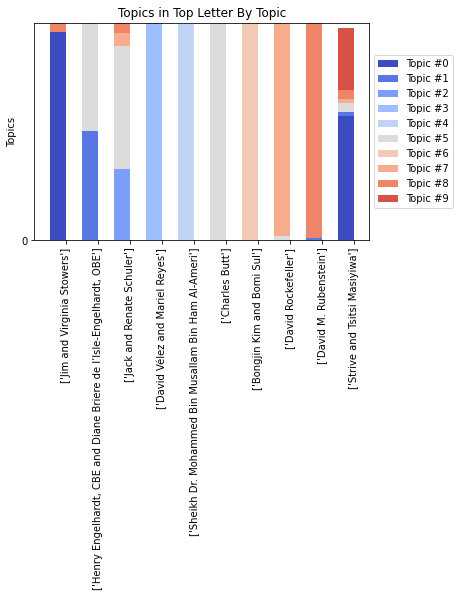

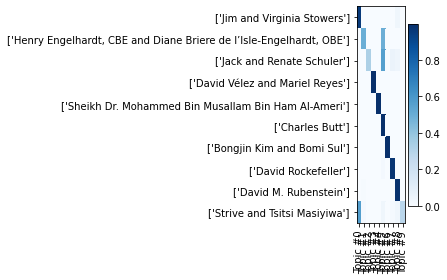


Perplexity:  -7.771918049570273

Coherence Score:  0.42362819421235604


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pledger_name  \
224                           Jim and Virginia Stowers   
98   Henry Engelhardt, CBE and Diane Briere de l’Is...   
8                              Jack and Renate Schuler   
7                         David Vélez and Mariel Reyes   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
39                                        Charles Butt   
11                            Bongjin Kim and Bomi Sul   
222                                  David Rockefeller   
223                                David M. Rubenstein   
123                         Strive and Tsitsi Masiyiwa   

                                          letters_text  topic_#  max_topic_val  
224  "Our vision is to make a significant contribut...        0       0.955993  
98   “In business and in our personal lives, we hav...        1       0.502305  
8    “Joining The Giving Pledge and channeling the ...        2       0.328564  
7    "There is extreme urgency to invest wealth now...        3       0.998895  
33   “Based on the principles of our Islamic religi...        4       0.996032  
39   “Over the past 30 years, my personal philanthr...        5       0.998470  
11   "We are certain that this pledge is the greate...        6       0.998386  
222  “Our family continues to be united in the beli...        7       0.977936  
223  "I do hope that others involved in this effort...        8       0.988032  
123  “In making this pledge, to give not less than ...        9       0.285552

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()


# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

In [ ]:
#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

0      ([(1, 0.1695801), (7, 0.063921124), (8, 0.4890...
1      ([(1, 0.2550057), (2, 0.13773753), (7, 0.04072...
2      ([(0, 0.014720981), (1, 0.17058422), (7, 0.339...
3      ([(1, 0.41950384), (5, 0.19102715), (7, 0.2036...
4      ([(1, 0.32661408), (4, 0.027472386), (7, 0.266...
                             ...                        
220    ([(1, 0.15558991), (7, 0.017857669), (16, 0.12...
221    ([(1, 0.27101958), (7, 0.07153532), (12, 0.015...
222    ([(7, 0.17580286), (13, 0.019548716), (17, 0.7...
223    ([(7, 0.7592496), (15, 0.017658269), (27, 0.19...
224    ([(7, 0.5130127), (15, 0.019937668), (16, 0.34...
Name: topics, Length: 203, dtype: object

In [ ]:
lda_model.get_document_topics


<bound method LdaModel.get_document_topics of <gensim.models.ldamodel.LdaModel object at 0x7f38b897a110>>



# W/ bigrams 10 topics & self_made

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 9), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 3), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.161789 -0.006518       1        1   0.630534
1      0.102743 -0.113867       2        1  24.642119
2     -0.187069  0.010859       3        1   2.852766
3     -0.170421 -0.004761       4        1   1.278763
4     -0.078500 -0.080674       5        1   8.419618
5      0.215006  0.293548       6        1   2.563534
6     -0.178878  0.005414       7        1   1.909714
7      0.323738 -0.119075       8        1  11.546099
8      0.146820 -0.112889       9        1  41.788503
9     -0.011651  0.127965      10        1   4.368349, topic_info=               Term        Freq       Total Category  logprob  loglift
309            give  260.000000  260.000000  Default  30.0000  30.0000
477            hope  154.000000  154.000000  Default  29.0000  29.0000
1226          share  126.000000  126.000000  Default  28.0000  28.0000
145            life  332.000000  332.000000  Default  27.0000  27.0000
4382      endowment   96.000000   96.000000  Default  26.0000  26.0000
...             ...         ...         ...      ...      ...      ...
2610  understanding   12.664334   22.752737  Topic10  -4.9639   2.5449
1274         happen   15.481291   29.905511  Topic10  -4.7631   2.4724
379            base   10.590092   19.340205  Topic10  -5.1428   2.5285
1963  philanthropic   16.075687  113.382243  Topic10  -4.7254   1.1773
274            year   13.159405  186.896755  Topic10  -4.9256   0.4774

[539 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
810       3  0.873741      -PRON-
6442      6  0.790207   1,000.the
6443      6  0.790207  2000.today
3485      4  0.577195        21st
508       7  0.313416  accessible
...     ...       ...         ...
1535      7  0.885639          있는
1576      7  0.812358          통해
1586      7  0.526431          함께
1587      7  0.885639        합니다.
1588      7  0.885639         해결에

[798 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

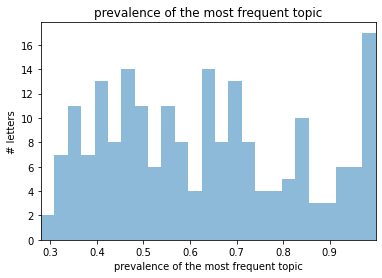

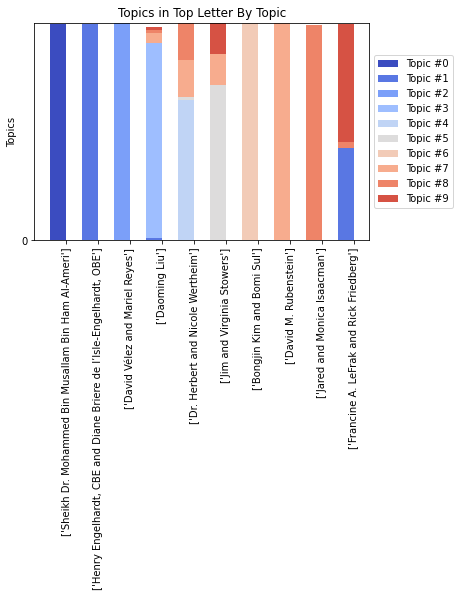

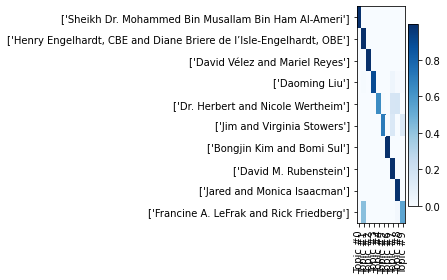

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
73   Henry Engelhardt and Diane Briere de l'Isle-En...   
7                         David Vélez and Mariel Reyes   
28                                         Daoming Liu   
106                    Dr. Herbert and Nicole Wertheim   
224                           Jim and Virginia Stowers   
11                            Bongjin Kim and Bomi Sul   
223                                David M. Rubenstein   
1                            Jared and Monica Isaacman   
27               Francine A. LeFrak and Rick Friedberg   

                                          letters_text  topic_#  
33   “Based on the principles of our Islamic religi...        0  
73   “In business and in our personal lives, we hav...        1  
7    "There is extreme urgency to invest wealth now...        2  
28   "A person, because of love, will be full of st...        3  
106  “Many of America’s private universities have m...        4  
224  "Our vision is to make a significant contribut...        5  
11   "We are certain that this pledge is the greate...        6  
223  "I do hope that others involved in this effort...        7  
1    "I know how lucky my family and I have been an...        8  
27   "We have lived our lives championing those who...        9

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text", "topic_#"]]

In [ ]:
df_merged["Self_made"]

KeyError: ignored

In [ ]:
#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

0      ([(1, 0.1695801), (7, 0.063921124), (8, 0.4890...
1      ([(1, 0.2550057), (2, 0.13773753), (7, 0.04072...
2      ([(0, 0.014720981), (1, 0.17058422), (7, 0.339...
3      ([(1, 0.41950384), (5, 0.19102715), (7, 0.2036...
4      ([(1, 0.32661408), (4, 0.027472386), (7, 0.266...
                             ...                        
220    ([(1, 0.15558991), (7, 0.017857669), (16, 0.12...
221    ([(1, 0.27101958), (7, 0.07153532), (12, 0.015...
222    ([(7, 0.17580286), (13, 0.019548716), (17, 0.7...
223    ([(7, 0.7592496), (15, 0.017658269), (27, 0.19...
224    ([(7, 0.5130127), (15, 0.019937668), (16, 0.34...
Name: topics, Length: 203, dtype: object



# W/ bigrams 20 topics

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 9), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 3), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.044575  0.067321       1        1   1.609449
1     -0.226562  0.163648       2        1  20.067293
2      0.108981  0.007870       3        1   0.363415
3      0.102716  0.010069       4        1   0.610950
4      0.109133  0.011506       5        1   1.143958
5      0.109439  0.006155       6        1   0.273649
6      0.131954 -0.007365       7        1   1.713811
7     -0.373417  0.070256       8        1  10.229069
8     -0.241446  0.175120       9        1  30.513383
9      0.117339 -0.003050      10        1   2.671919
10     0.112164  0.004536      11        1   0.267123
11     0.102266 -0.007947      12        1   0.292567
12     0.113666  0.003376      13        1   0.647806
13     0.116152  0.002576      14        1   1.079764
14     0.097696 -0.006289      15        1   1.275298
15    -0.089888 -0.311852      16        1   2.662892
16     0.101765  0.011985      17        1   1.021039
17    -0.223773  0.048555      18        1  15.528992
18     0.116608  0.001729      19        1   0.563862
19    -0.329368 -0.248198      20        1   7.463762, topic_info=            Term        Freq       Total Category  logprob  loglift
4382   endowment  111.000000  111.000000  Default  30.0000  30.0000
477         hope  219.000000  219.000000  Default  29.0000  29.0000
19            be  350.000000  350.000000  Default  28.0000  28.0000
2082   institute  117.000000  117.000000  Default  27.0000  27.0000
307   foundation  190.000000  190.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
122    important   26.623842   86.970431  Topic20  -4.7566   1.4113
2073        gift   27.455131  111.892193  Topic20  -4.7258   1.1901
202      provide   25.933085   89.043024  Topic20  -4.7828   1.3615
285        cause   25.639827  102.845940  Topic20  -4.7942   1.2060
105         good   24.634792  210.488918  Topic20  -4.8342   0.4498

[953 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
3928     13  0.801770  "sincerely
1112      2  0.164603           $
1112      8  0.192037           $
1112      9  0.164603           $
1112     16  0.246905           $
...     ...       ...         ...
1818      7  0.907172          제가
1576      7  0.850401          통해
1586      7  0.907172          함께
1587      7  0.739521        합니다.
1588      7  0.739520         해결에

[1240 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

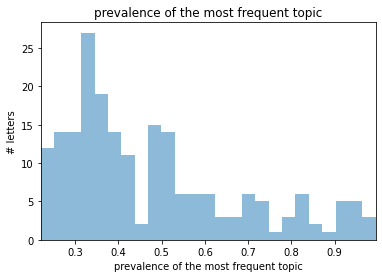

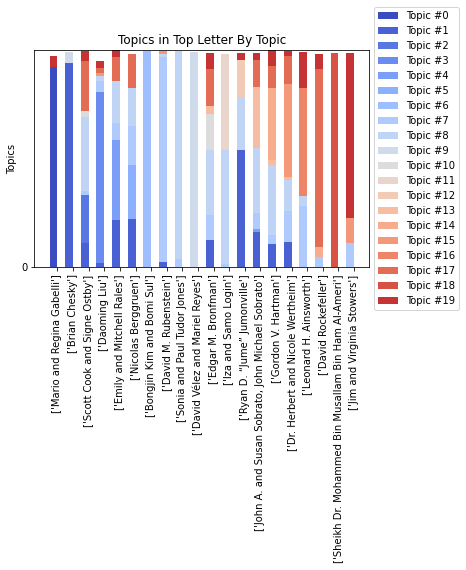

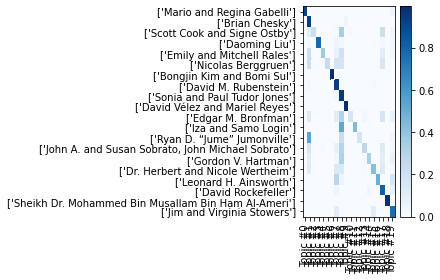


Perplexity:  -8.016157285299265

Coherence Score:  0.4183263616475778


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pledger_name  \
51                            Mario and Regina Gabelli   
95                                        Brian Chesky   
71                          Scott Cook and Signe Ostby   
28                                         Daoming Liu   
30                            Emily and Mitchell Rales   
206                                  Nicolas Berggruen   
11                            Bongjin Kim and Bomi Sul   
223                                David M. Rubenstein   
47                          Sonia and Paul Tudor Jones   
7                         David Vélez and Mariel Reyes   
173                                  Edgar M. Bronfman   
86                                  Iza and Samo Login   
48                           Ryan D. “Jume” Jumonville   
166    John A. and Susan Sobrato, John Michael Sobrato   
24                                   Gordon V. Hartman   
106                    Dr. Herbert and Nicole Wertheim   
88                                Leonard H. Ainsworth   
222                                  David Rockefeller   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
224                           Jim and Virginia Stowers   

                                          letters_text  topic_#  max_topic_val  
51   "'The measure of who we are is what we do with...        0       0.920475  
95   “There is a saying that a great trip can set y...        1       0.940929  
71   "Rather than waiting, we are giving now. The c...        2       0.224049  
28   "A person, because of love, will be full of st...        3       0.783658  
30   "We are fortunate to have the opportunity to r...        4       0.370930  
206  “Everyone is dealt a group of cards at birth. ...        5       0.248448  
11   "We are certain that this pledge is the greate...        6       0.994815  
223  "I do hope that others involved in this effort...        7       0.944281  
47   "We have found that all giving is joyous; true...        8       0.953547  
7    "There is extreme urgency to invest wealth now...        9       0.990737  
173  “I have found philanthropy deeply satisfying w...       10       0.167724  
86   "Not only are we pledging to spend the great m...       11       0.444106  
48   “We are the “Human Race”, no man, woman, or ch...       12       0.174496  
166  “...our entire family is now in a position to ...       13       0.277641  
24   "The cost of caring for a child or adult with ...       14       0.334042  
106  “Many of America’s private universities have m...       15       0.424822  
88   “It is my great pleasure to provide this Givin...       16       0.493715  
222  “Our family continues to be united in the beli...       17       0.816019  
33   “Based on the principles of our Islamic religi...       18       0.987399  
224  "Our vision is to make a significant contribut...       19       0.759368

Error: Runtime no longer has a reference to this dataframe, please re-run this cell and try again.


In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

In [ ]:


text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'most', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 2), (31, 1), (32, 8), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 9), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 5), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110, 2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.302518  0.219552       1        1   8.773544
1      0.278043 -0.229131       2        1   5.552359
2     -0.041609 -0.056922       3        1   3.136275
3     -0.070331  0.026119       4        1   0.923910
4     -0.127921  0.003324       5        1   0.993540
5      0.006097 -0.022881       6        1   5.727721
6     -0.116396  0.004156       7        1   0.811210
7     -0.117219  0.006601       8        1   0.399789
8      0.316750 -0.187360       9        1   4.780917
9     -0.116969  0.003757      10        1   0.717572
10    -0.108079  0.008324      11        1   0.036487
11    -0.113246  0.006692      12        1   0.175211
12     0.227248  0.042234      13        1  59.367437
13    -0.124679 -0.000182      14        1   1.861184
14     0.385498  0.140934      15        1   3.568750
15    -0.106450  0.011911      16        1   0.623905
16    -0.108716  0.008445      17        1   0.047705
17    -0.123443  0.003109      18        1   0.712997
18    -0.116075  0.006598      19        1   1.000973
19    -0.125021  0.004720      20        1   0.788513, topic_info=              Term        Freq       Total Category  logprob  loglift
285          child  184.000000  184.000000  Default  30.0000  30.0000
185         pledge  420.000000  420.000000  Default  29.0000  29.0000
103           give  568.000000  568.000000  Default  28.0000  28.0000
671   philanthropy  224.000000  224.000000  Default  27.0000  27.0000
305     foundation  203.000000  203.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1314             것    0.684317    2.030390  Topic20  -6.1886   3.7552
1488            우리    0.684317    2.030390  Topic20  -6.1886   3.7552
1504           인생의    0.684317    2.030390  Topic20  -6.1886   3.7552
1551            통해    1.008750    3.486471  Topic20  -5.8006   3.6026
1335           그리고    0.684317    2.784822  Topic20  -6.1886   3.4393

[994 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
790      14  0.817589             -PRON-
6319      9  0.911101          1,000.the
1294     20  0.783725              100명의
6279     15  0.869491           2010like
6272      2  0.965859  2010philanthropic
...     ...       ...                ...
1823      5  0.723839                 하게
1824      5  0.723839                 하고
1561     20  0.624847                 함께
1562     20  0.505662               합니다.
1563     20  0.505662                해결에

[1188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

### cross tabulation by self.made

In [ ]:
# I drop rows witout letter texts

df_copy = df
df_with_nan = df_merged_forbes
df = df_merged_forbes[(~df_merged_forbes["letters_text"].isna())]

df[df_merged_forbes["Self_made"]==True]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  \
2             2             2               2   
3             3             3               3   
4             4             4               4   
9             9             9               9   
13           14            14              14   
16           17            17              17   
17           18            18              18   
18           19            19              19   
25           26            26              26   
29           30            30              30   
37           40            40              40   
40           43            43              43   
42           45            45              45   
47           50            50              50   
51           54            54              54   
63           68            68              68   
65           70            70              70   
66           71            71              71   
68           73            73              73   
69           74            74              74   
70           75            75              75   
74           79            79              79   
86           93            93              93   
88           95            95              95   
89           96            96              96   
91           98            98              98   
92           99            99              99   
98          105           105             105   
104         111           111             111   
106         113           113             113   
108         115           115             115   
117         126           126             126   
118         127           127             127   
122         133           133             133   
126         137           137             137   
127         138           138             138   
132         143           143             143   
136         148           148             148   
137         149           149             149   
138         150           150             150   
146         158           158             158   
149         161           161             161   
154         168           168             168   
155         169           169             169   
166         185           185             185   
172         191           191             191   
174         193           193             193   
178         198           198             198   
180         200           200             200   
181         201           201             201   
184         204           204             204   
186         207           207             207   
187         208           208             208   
188         209           209             209   
196         218           218             218   
199         221           221             221   
201         223           223             223   

                                          pledger_name  \
2                                     Steven Schuurman   
3                                Patti Bao and Tony Xu   
4                                        Jeff T. Green   
9                                         Anil Agarwal   
13                               Stephen A. Schwarzman   
16                                        Jim Pattison   
17                               Tegan and Brian Acton   
18                                     Brian Armstrong   
25                               Erica and Jeff Lawson   
29                            Emily and Mitchell Rales   
37                                      David G. Booth   
40                                        Garrett Camp   
42                       Reid Hoffman and Michelle Yee   
47                          Rohini and Nandan Nilekani   
51                                        Dong Fangjun   
63                              Lynne and Marc Benioff   
65                                        Brian Chesky   
66                          Scott Cook and Signe Ostby   
68   Henry Engelhardt, CBE and Diane Briere de l’Is...   
69

In [ ]:
vector = lda_model[corpus]

print(vector[:1])

In [ ]:
vector

In [ ]:
df = df_copy

text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'most', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 2), (31, 1), (32, 8), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 9), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 5), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110, 2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.302518  0.219552       1        1   8.773544
1      0.278043 -0.229131       2        1   5.552359
2     -0.041609 -0.056922       3        1   3.136275
3     -0.070331  0.026119       4        1   0.923910
4     -0.127921  0.003324       5        1   0.993540
5      0.006097 -0.022881       6        1   5.727721
6     -0.116396  0.004156       7        1   0.811210
7     -0.117219  0.006601       8        1   0.399789
8      0.316750 -0.187360       9        1   4.780917
9     -0.116969  0.003757      10        1   0.717572
10    -0.108079  0.008324      11        1   0.036487
11    -0.113246  0.006692      12        1   0.175211
12     0.227248  0.042234      13        1  59.367437
13    -0.124679 -0.000182      14        1   1.861184
14     0.385498  0.140934      15        1   3.568750
15    -0.106450  0.011911      16        1   0.623905
16    -0.108716  0.008445      17        1   0.047705
17    -0.123443  0.003109      18        1   0.712997
18    -0.116075  0.006598      19        1   1.000973
19    -0.125021  0.004720      20        1   0.788513, topic_info=              Term        Freq       Total Category  logprob  loglift
285          child  184.000000  184.000000  Default  30.0000  30.0000
185         pledge  420.000000  420.000000  Default  29.0000  29.0000
103           give  568.000000  568.000000  Default  28.0000  28.0000
671   philanthropy  224.000000  224.000000  Default  27.0000  27.0000
305     foundation  203.000000  203.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1314             것    0.684317    2.030390  Topic20  -6.1886   3.7552
1488            우리    0.684317    2.030390  Topic20  -6.1886   3.7552
1504           인생의    0.684317    2.030390  Topic20  -6.1886   3.7552
1551            통해    1.008750    3.486471  Topic20  -5.8006   3.6026
1335           그리고    0.684317    2.784822  Topic20  -6.1886   3.4393

[994 rows x 6 columns], token_table=      Topic      Freq               Term
term                                    
790      14  0.817589             -PRON-
6319      9  0.911101          1,000.the
1294     20  0.783725              100명의
6279     15  0.869491           2010like
6272      2  0.965859  2010philanthropic
...     ...       ...                ...
1823      5  0.723839                 하게
1824      5  0.723839                 하고
1561     20  0.624847                 함께
1562     20  0.505662               합니다.
1563     20  0.505662                해결에

[1188 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

In [ ]:
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

ValidationError: ignored

In [ ]:
df_hold = df
df = df_merged_forbes

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION

df = df_merged_forbes[df_merged_forbes["Self_made"]==False]

df = df[(~df["letters_text"].isna())]

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()


# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

name  \
31   MacKenzie Scott and Dan Jewett   
50                     Dagmar Dolby   
55         Sir Stelios Haji-Ioannou   
61                   Mohammed Dewji   
73                     Dagmar Dolby   
78         Sir Stelios Haji-Ioannou   
84                   Mohammed Dewji   
130                      Samuel Yin   
139                     Azim Premji   
144             Charles R. Bronfman   
167                Lynn Schusterman   
185               Nicolas Berggruen   

                                                topics   topic_0   topic_1  \
31   ([(0, 0.010454718), (1, 0.022416282), (5, 0.56...  0.010455  0.022416   
50   ([(0, 0.03125335), (1, 0.025193423), (5, 0.565...  0.031253  0.025193   
55   ([(1, 0.080770165), (5, 0.20589386), (8, 0.023...  0.000000  0.080770   
61   ([(0, 0.049125273), (1, 0.06947158), (3, 0.025...  0.049125  0.069472   
73   ([(0, 0.031193538), (1, 0.025204262), (5, 0.56...  0.031194  0.025204   
78   ([(1, 0.08077017), (5, 0.20589386), (8, 0.0236...  0.000000  0.080770   
84   ([(0, 0.04912528), (1, 0.06947149), (3, 0.0255...  0.049125  0.069471   
130  ([(0, 0.031852566), (1, 0.087458715), (3, 0.01...  0.031853  0.087459   
139  ([(0, 0.08184348), (1, 0.04299353), (3, 0.0107...  0.081843  0.042994   
144  ([(0, 0.024894124), (1, 0.017835155), (5, 0.10...  0.024894  0.017835   
167  ([(0, 0.025030537), (1, 0.040226907), (5, 0.16...  0.025031  0.040227   
185  ([(1, 0.117155865), (2, 0.030682165), (3, 0.12...  0.000000  0.117156   

      topic_2   topic_3   topic_4   topic_5   topic_6  topic_7  ...  topic_10  \
31   0.000000  0.000000  0.000000  0.568209  0.000000        0  ...         0   
50   0.000000  0.000000  0.000000  0.565318  0.000000        0  ...         0   
55   0.000000  0.000000  0.000000  0.205894  0.000000        0  ...         0   
61   0.000000  0.025506  0.000000  0.134668  0.000000        0  ...         0   
73   0.000000  0.000000  0.000000  0.565309  0.000000        0  ...         0   
78   0.000000  0.000000  0.000000  0.205894  0.000000        0  ...         0   
84   0.000000  0.025506  0.000000  0.134667  0.000000        0  ...         0   
130  0.000000  0.018786  0.000000  0.203210  0.000000        0  ...         0   
139  0.000000  0.010786  0.030636  0.133894  0.000000        0  ...         0   
144  0.000000  0.000000  0.000000  0.104872  0.000000        0  ...         0   
167  0.000000  0.000000  0.000000  0.160174  0.000000        0  ...         0   
185  0.030682  0.126708  0.000000  0.122101  0.039352        0  ...         0   

     topic_11  topic_12  topic_13  topic_14  topic_15  topic_16  topic_17  \
31          0  0.359673  0.000000  0.000000         0         0         0   
50          0  0.307412  0.000000  0.045666         0         0         0   
55          0  0.662295  0.000000  0.000000         0         0         0   
61          0  0.653025  0.000000  0.000000         0         0         0   
73          0  0.307426  0.000000  0.045721         0         0         0   
78          0  0.662295  0.000000  0.000000         0         0         0   
84          0  0.653025  0.000000  0.000000         0         0         0   
130         0  0.517410  0.000000  0.000000         0         0         0   
139         0  0.474495  0.178829  0.000000         0         0         0   
144         0  0.310855  0.525506  0.000000         0         0         0   
167         0  0.319872  0.364360  0.000000         0         0         0   
185         0  0.274576  0.043924  0.058456         0         0         0   

     topic_18  topic_19  
31          0         0  
50          0         0  
55          0         0  
61          0         0  
73          0         0  
78          0         0  
84          0         0  
130         0         0  
139         0         0  
144         0         0  
167         0         0  
185         0         0  

[12 rows x 22 columns]

In [ ]:
ldaDF_inherited = ldaDF
ldaDF.mean()


topic_0     0.027898
topic_1     0.056581
topic_2     0.002557
topic_3     0.017274
topic_4     0.002553
topic_5     0.258684
topic_6     0.003279
topic_7     0.000000
topic_8     0.042534
topic_9     0.012667
topic_10    0.000000
topic_11    0.000000
topic_12    0.458530
topic_13    0.092718
topic_14    0.012487
topic_15    0.000000
topic_16    0.000000
topic_17    0.000000
topic_18    0.000000
topic_19    0.000000
dtype: float64

In [ ]:
ldaDF_selfmade = ldaDF
ldaDF.mean()



topic_0     0.037778
topic_1     0.064101
topic_2     0.005067
topic_3     0.002164
topic_4     0.052880
topic_5     0.222686
topic_6     0.002045
topic_7     0.001674
topic_8     0.030765
topic_9     0.007253
topic_10    0.000000
topic_11    0.001003
topic_12    0.389362
topic_13    0.098086
topic_14    0.005409
topic_15    0.004334
topic_16    0.000000
topic_17    0.003308
topic_18    0.002889
topic_19    0.054494
dtype: float64

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=20, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=False)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 8), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 1), (41, 2), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 1), (53, 9), (54, 3), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 1), (63, 1), (64, 1), (65, 1), (66, 1), (67, 2), (68, 1), (69, 1), (70, 2), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 1), (78, 2), (79, 1), (80, 2), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1), (87, 2), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 1), (96, 3), (97, 1), (98, 1), (99, 1), (100, 3), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 1), (108, 2), (109, 1), (110, 1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.114209 -0.004043       1        1   0.187621
1      0.006205  0.008279       2        1   2.480303
2     -0.295079 -0.262191       3        1   1.773282
3      0.127578 -0.020862       4        1   1.575649
4      0.123222 -0.011060       5        1   0.652105
5     -0.215275  0.132687       6        1  53.578047
6      0.131610 -0.018830       7        1   1.040798
7     -0.269259  0.216413       8        1   2.609357
8     -0.334773 -0.198636       9        1   4.587125
9     -0.036637  0.086224      10        1   4.249153
10     0.084392 -0.000337      11        1   1.357487
11     0.124536 -0.012845      12        1   0.628318
12     0.113198 -0.003863      13        1   0.430901
13    -0.302774  0.127639      14        1  19.553832
14     0.123124 -0.033150      15        1   1.576190
15     0.122088 -0.011794      16        1   0.539686
16     0.118188 -0.004283      17        1   0.575729
17     0.036403  0.018287      18        1   2.224387
18     0.117349 -0.005606      19        1   0.298944
19     0.111695 -0.002029      20        1   0.081087, topic_info=                  Term        Freq       Total Category  logprob  loglift
105               give  541.000000  541.000000  Default  30.0000  30.0000
3763      considerable  102.000000  102.000000  Default  29.0000  29.0000
474               hope  214.000000  214.000000  Default  28.0000  28.0000
275               year  294.000000  294.000000  Default  27.0000  27.0000
674       philanthropy  205.000000  205.000000  Default  26.0000  26.0000
...                ...         ...         ...      ...      ...      ...
1237              dare    0.053424    0.724115  Topic20  -6.4872   4.5107
1274            plough    0.053424    0.724115  Topic20  -6.4872   4.5107
2124  1/26/2020sharing    0.053424    0.724115  Topic20  -6.4872   4.5107
2134           request    0.053424    0.724115  Topic20  -6.4872   4.5107
1254            golden    0.053424    0.724122  Topic20  -6.4872   4.5107

[962 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
793       4  0.822282      -PRON-
6322      3  0.796186   1,000.the
6322      9  0.159237   1,000.the
6323      3  0.796186  2000.today
6323      9  0.159237  2000.today
...     ...       ...         ...
1554      7  0.534631          통해
1554     15  0.267316          통해
1826      7  0.686404          하게
1827      7  0.686404          하고
1564     15  0.559096          함께

[1254 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])

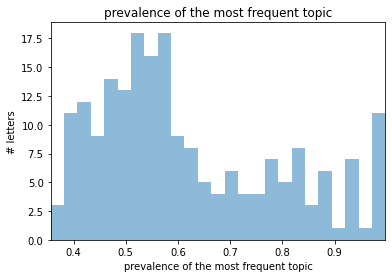

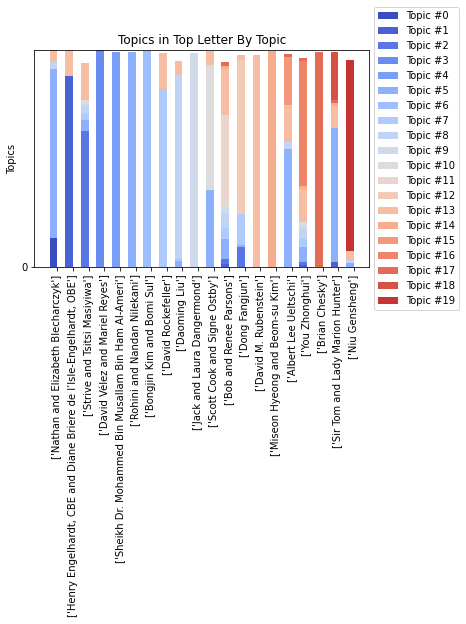

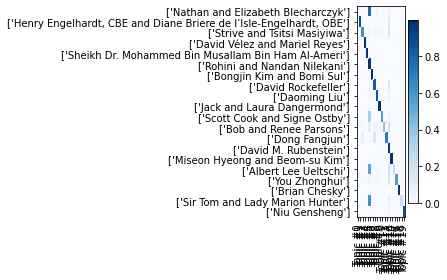


Perplexity:  -7.834746178168119

Coherence Score:  0.39571797400712816


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pledger_name  \
94                    Nathan and Elizabeth Blecharczyk   
98   Henry Engelhardt, CBE and Diane Briere de l’Is...   
123                         Strive and Tsitsi Masiyiwa   
7                         David Vélez and Mariel Reyes   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
75                          Rohini and Nandan Nilekani   
11                            Bongjin Kim and Bomi Sul   
222                                  David Rockefeller   
28                                         Daoming Liu   
97                           Jack and Laura Dangermond   
96                          Scott Cook and Signe Ostby   
131                              Bob and Renee Parsons   
54                                        Dong Fangjun   
223                                David M. Rubenstein   
10                       Miseon Hyeong and Beom-su Kim   
164                                Albert Lee Ueltschi   
58                                        You Zhonghui   
95                                        Brian Chesky   
108                     Sir Tom and Lady Marion Hunter   
101                                       Niu Gensheng   

                                          letters_text  topic_#  max_topic_val  
94   “We are humbled to find ourselves at a young a...        0       0.136319  
98   “In business and in our personal lives, we hav...        1       0.878648  
123  “In making this pledge, to give not less than ...        2       0.624928  
7    "There is extreme urgency to invest wealth now...        3       0.997204  
33   “Based on the principles of our Islamic religi...        4       0.990209  
75   “We thank Bill and Melinda for creating this u...        5       0.990756  
11   "We are certain that this pledge is the greate...        6       0.996026  
222  “Our family continues to be united in the beli...        7       0.819573  
28   "A person, because of love, will be full of st...        8       0.840882  
97   "Our plan is to keep working for as long as we...        9       0.985819  
96   "Rather than waiting, we are giving now. The c...       10       0.577425  
131  “Renee and I have always believed every child ...       11       0.406108  
54   "Let's create wealth through the diligent, pio...       12       0.706185  
223  "I do hope that others involved in this effort...       13       0.976775  
10   "With this pledge as our starting point, my wi...       14       0.995523  
164  “I have been so fortunate in my professional l...       15       0.221873  
58   "Acting Positive makes people gain wisdom and ...       16       0.575563  
95   “There is a saying that a great trip can set y...       17       0.990476  
108  “We don't want to be the richest guys in the g...       18       0.219095  
101  “Small victories are based on wisdom, great vi...       19       0.880537

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

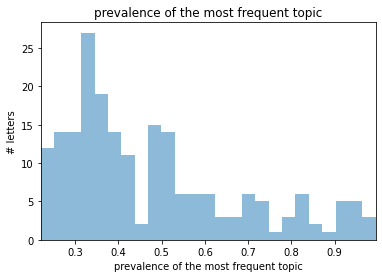

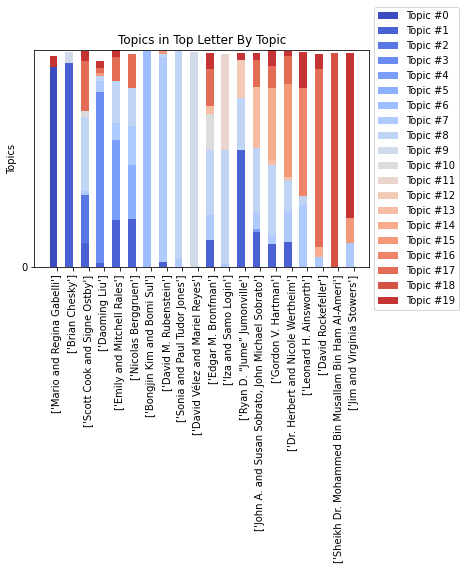

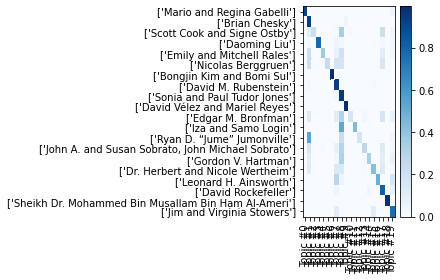

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
51                                          
95                                          
96                             Scott Cook   
28                                          
30         Mitchell Rales, Mitchell Rales   
206                     Nicolas Berggruen   
11                                          
223                      David Rubenstein   
47                                          
7                                           
173        Edgar Bronfman, Edgar Bronfman   
61                                          
48                                          
166                                         
24                                          
106                                         
88                                          
222  David Rockefeller, David Rockefeller   
33                                          
224                                         

                                          letters_text  topic_#  
51   "'The measure of who we are is what we do with...        0  
95   “There is a saying that a great trip can set y...        1  
96   "Rather than waiting, we are giving now. The c...        2  
28   "A person, because of love, will be full of st...        3  
30   "We are fortunate to have the opportunity to r...        4  
206  “Everyone is dealt a group of cards at birth. ...        5  
11   "We are certain that this pledge is the greate...        6  
223  "I do hope that others involved in this effort...        7  
47   "We have found that all giving is joyous; true...        8  
7    "There is extreme urgency to invest wealth now...        9  
173  “I have found philanthropy deeply satisfying w...       10  
61   "Not only are we pledging to spend the great m...       11  
48   “We are the “Human Race”, no man, woman, or ch...       12  
166  “...our entire family is now in a position to ...       13  
24   "The cost of caring for a child or adult with ...       14  
106  “Many of America’s private universities have m...       15  
88   “It is my great pleasure to provide this Givin...       16  
222  “Our family continues to be united in the beli...       17  
33   “Based on the principles of our Islamic religi...       18  
224  "Our vision is to make a significant contribut...       19

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text", "topic_#"]]



# W/ bigrams 30 topics

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 9), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 3), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.013960 -0.049706       1        1   1.291509
1     -0.281911 -0.098098       2        1  23.183395
2      0.103747 -0.011089       3        1   0.236206
3      0.106103 -0.009209       4        1   0.223044
4      0.085679 -0.005799       5        1   1.238732
5      0.105875 -0.008153       6        1   0.135424
6      0.096187 -0.013165       7        1   0.005519
7     -0.390653 -0.020324       8        1  10.347948
8      0.113435  0.010697       9        1   1.456104
9      0.073213 -0.015064      10        1   1.480504
10     0.107040 -0.009232      11        1   0.255836
11     0.095897 -0.016883      12        1   0.214558
12     0.071077 -0.029587      13        1   1.141326
13     0.096429  0.020242      14        1   0.587030
14     0.112911 -0.003946      15        1   0.520531
15     0.025645  0.109180      16        1   1.124109
16    -0.242501  0.379846      17        1   1.058544
17    -0.257046 -0.089589      18        1  13.758480
18     0.103440 -0.011708      19        1   0.204645
19    -0.232127 -0.105618      20        1  12.264941
20    -0.009950  0.025981      21        1   1.976569
21     0.109557  0.017013      22        1   1.741141
22    -0.036357 -0.061450      23        1   1.906269
23     0.121282  0.004782      24        1   0.962258
24     0.110017  0.038771      25        1   1.962928
25     0.096187 -0.013165      26        1   0.005841
26     0.105464 -0.008834      27        1   0.112587
27    -0.300327 -0.080035      28        1  14.640462
28     0.097626 -0.012688      29        1   0.027094
29    -0.199900  0.066830      30        1   5.936464, topic_info=        Term        Freq       Total Category  logprob  loglift
19        be  367.000000  367.000000  Default  30.0000  30.0000
309     give  257.000000  257.000000  Default  29.0000  29.0000
1226   share  136.000000  136.000000  Default  28.0000  28.0000
145     life  332.000000  332.000000  Default  27.0000  27.0000
477     hope  170.000000  170.000000  Default  26.0000  26.0000
...      ...         ...         ...      ...      ...      ...
62    create   20.327817  141.650918  Topic30  -4.7974   0.8827
272     work   20.369840  221.671983  Topic30  -4.7954   0.4369
120   impact   16.621066   95.715354  Topic30  -4.9987   1.0733
145     life   19.584631  332.209528  Topic30  -4.8347  -0.0070
339     more   18.885401  277.602372  Topic30  -4.8710   0.1363

[1441 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1112      8  0.020437       $
1112     17  0.081748       $
1112     20  0.102185       $
1112     28  0.776606       $
810      22  0.734724  -PRON-
...     ...       ...     ...
1576      9  0.633510      통해
1576     24  0.211170      통해
1586     24  0.489034      함께
1587     24  0.802733    합니다.
1588     24  0.802733     해결에

[1775 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

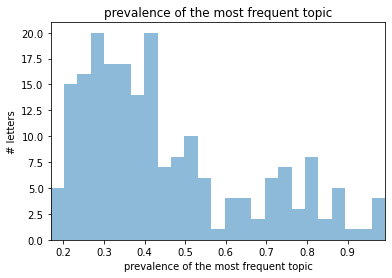

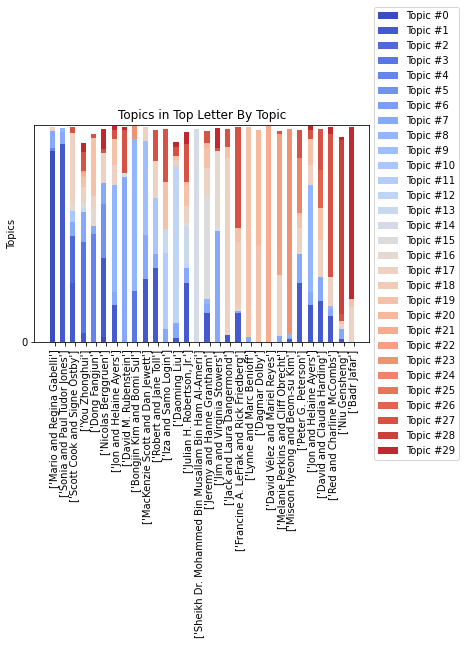

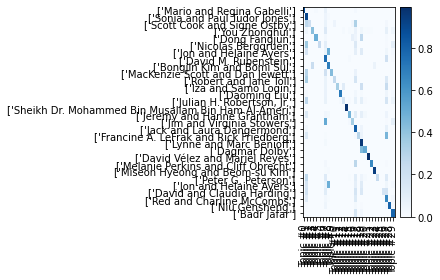


Perplexity:  -8.030980849742303

Coherence Score:  0.36815279631737385


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pledger_name  \
51                            Mario and Regina Gabelli   
47                          Sonia and Paul Tudor Jones   
71                          Scott Cook and Signe Ostby   
58                                        You Zhonghui   
79                                        Dong Fangjun   
206                                  Nicolas Berggruen   
0                                Jon and Helaine Ayers   
223                                David M. Rubenstein   
11                            Bongjin Kim and Bomi Sul   
32                      MacKenzie Scott and Dan Jewett   
35                                Robert and Jane Toll   
86                                  Iza and Samo Login   
28                                         Daoming Liu   
221                           Julian H. Robertson, Jr.   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
22                           Jeremy and Hanne Grantham   
224                           Jim and Virginia Stowers   
97                           Jack and Laura Dangermond   
27               Francine A. LeFrak and Rick Friedberg   
93                              Lynne and Marc Benioff   
78                                        Dagmar Dolby   
7                         David Vélez and Mariel Reyes   
5                    Melanie Perkins and Cliff Obrecht   
10                       Miseon Hyeong and Beom-su Kim   
219                                  Peter G. Peterson   
0                                Jon and Helaine Ayers   
23                           David and Claudia Harding   
176                           Red and Charline McCombs   
101                                       Niu Gensheng   
77                                          Badr Jafar   

                                          letters_text  topic_#  max_topic_val  
51   "'The measure of who we are is what we do with...        0       0.877707  
47   "We have found that all giving is joyous; true...        1       0.914094  
71   "Rather than waiting, we are giving now. The c...        2       0.216929  
58   "Acting Positive makes people gain wisdom and ...        3       0.419405  
79   "Let's create wealth through the diligent, pio...        4       0.498570  
206  “Everyone is dealt a group of cards at birth. ...        5       0.246310  
0    "Humanity has a limited amount of time to turn...        6       0.000000  
223  "I do hope that others involved in this effort...        7       0.759252  
11   "We are certain that this pledge is the greate...        8       0.697607  
32   "There are lots of resources each of us can pu...        9       0.431839  
35   "We are pleased to write this letter as signat...       10       0.256183  
86   "Not only are we pledging to spend the great m...       11       0.348160  
28   "A person, because of love, will be full of st...       12       0.716714  
221  "One very fortunate thing is that I did not ge...       13       0.173882  
33   “Based on the principles of our Islamic religi...       14       0.981886  
22   "This is a winnable war (against environmental...       15       0.473319  
224  "Our vision is to make a significant contribut...       16       0.348204  
97   "Our plan is to keep working for as long as we...       17       0.814079  
27   "We have lived our lives championing those who...       18       0.294553  
93   “We believe that in order for our communities ...       19       0.964364  
78   "I am delighted to confirm my plans to devote ...       20       0.527297  
7    "There is extreme urgency to invest wealth now...       21       0.993159  
5    “We have this wildly optimistic belief that th...       22       0.649919  
10   "With this pledge as our starting point, my wi...       23       0.940995  
219  “As I watched and learned from my father's exa...       24       0.251614  
0    "Humanity has a limited amount of time to turn...       25       0.000000  
23   "I have been fortunate enough to pursue a fasc...  

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

'''

df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])'''

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=30, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






LDA keywords:
[(24, '0.002*"2016年，我注册成立了美好公益基金会，在社区建设志工服务站，组织培训志工，为社区孤独、老弱、贫困人群提供帮助" + 0.002*"刘道明加入捐赠誓言的公开誓言尊敬的沃伦·巴菲特先生及盖茨夫妇" + 0.002*"刘道明2019年4月10日" + 0.002*"再次感恩你们的邀请！美好公益基金会理事长" + 0.002*"一个人，因为有爱，内心才会充满力量；一个企业家，因为承担社会责任才会让生命更有意义。因此，我愿意以你们为榜样，代表全家人共同承诺，捐赠资产的70%用于老年人和农民的脱贫帮困；愿意与所有热爱公益事业的人共同努力，用自己的毕生精力和财富，为人类的健康生活和文明进步而努力奋斗" + 0.002*"非常荣幸收到"捐赠誓言"的邀请，很早就知道你们通过比尔及梅琳达·盖茨基金会为世界作出的伟大贡献，我很高兴有机会和你们一起交流学习，并为社会做些更有意义的事情" + 0.002*"我出生于中国湖北省洪湖农村，小时候家里很穷，初中毕业就在农村种地，18岁时参军入伍离开家乡，32岁开始创业，经过近30年的努力，有了今天的一点成就。我很清楚是时代的发展进步才有今天的成就。因此，从1990年开始，我累计向社会慈善捐款2亿余元；并长期担任湖北省慈善总会名誉会长，致力于推动中国公益事业的发展" + 0.000*"de" + 0.000*"year" + 0.000*"need"'), (15, '0.004*"捐赠誓言尊敬的沃伦.巴菲特先生及比尔.盖茨夫妇：非常荣幸收到"捐赠誓言"的邀请，我乐意加入其中，投身公益，以此履行我的社会责任，实现人生之价值。自2004年开在中国贵州捐资助学起，我的公益慈善事业由此开启。财富取之于社会，而回馈于社会。做慈善不仅是企业必须履行的社会责任，更是企业回报社会的良好方式。而关于事业和慈善的平衡，我一直推崇的是"崇德向善，积极向上"的原则。向上，使人增长智慧和财富，在追求事业上发展方面，立足主营业务，把企业做大做强。向善，则是珍重生命，尊重自然，心怀善意，广播善缘，这使人心态阳光健康，增加福报。慈者仁心，善者大美。做善事不难，难的是坚持不懈地践行慈善公益的诺言。因此，在过去的十几年，我积极发挥自身优势，致力于推动教育、科技、文化、环保、扶贫等领域的慈善事业。继中国贵州捐资助学之后，进而在梵

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.104685  0.013157       1        1   0.930749
1     -0.041186 -0.017490       2        1   1.061421
2      0.198306  0.272811       3        1   1.044133
3     -0.094985 -0.001880       4        1   0.228073
4     -0.095146 -0.002566       5        1   0.237422
5      0.303144 -0.137280       6        1  47.803653
6     -0.095042 -0.003101       7        1   0.219738
7     -0.095846 -0.002300       8        1   0.276389
8      0.409745  0.195087       9        1   2.579928
9     -0.084080 -0.007138      10        1   0.600517
10    -0.090689 -0.004761      11        1   0.709063
11    -0.021327 -0.023414      12        1   0.988628
12    -0.097645  0.001484      13        1   0.537745
13     0.345765 -0.079636      14        1  19.305181
14    -0.065011  0.013101      15        1   0.630002
15    -0.087512 -0.008469      16        1   0.009908
16     0.004402  0.151171      17        1   0.616762
17     0.028813 -0.051559      18        1   1.450290
18    -0.092340  0.007782      19        1   0.935711
19    -0.097925  0.000082      20        1   0.349547
20    -0.102930  0.006974      21        1   0.799749
21     0.030245 -0.107179      22        1   4.291357
22    -0.090622 -0.006582      23        1   0.077964
23     0.162748 -0.148639      24        1   6.980141
24    -0.087864 -0.008246      25        1   0.017715
25    -0.090922  0.031688      26        1   1.337397
26    -0.095727  0.006468      27        1   0.371869
27     0.314239 -0.106163      28        1   2.863793
28    -0.088072 -0.008497      29        1   0.028733
29    -0.077851  0.025093      30        1   2.716425, topic_info=              Term        Freq       Total Category  logprob  loglift
105           give  542.000000  542.000000  Default  30.0000  30.0000
275           year  296.000000  296.000000  Default  29.0000  29.0000
273           work  277.000000  277.000000  Default  28.0000  28.0000
29             can  277.000000  277.000000  Default  27.0000  27.0000
674   philanthropy  220.000000  220.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
1920           low    4.340799    8.673741  Topic30  -5.6012   2.9136
510            age    5.913696   44.697706  Topic30  -5.2920   1.5832
3179         clean    4.451363   13.269821  Topic30  -5.5761   2.5136
1166      increase    5.314545   45.241849  Topic30  -5.3988   1.4643
2203        energy    4.035842   28.429844  Topic30  -5.6741   1.6536

[1390 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1095      3  0.225297       $
1095      6  0.450594       $
1095     14  0.315416       $
1096      2  0.471732       +
793      30  0.882680  -PRON-
...     ...       ...     ...
1550     21  0.671408     카카오
1554      1  0.800798      통해
1564     21  0.522277      함께
1565     21  0.485082    합니다.
1566     21  0.485056     해결에

[1565 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

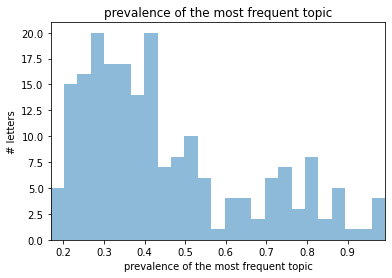

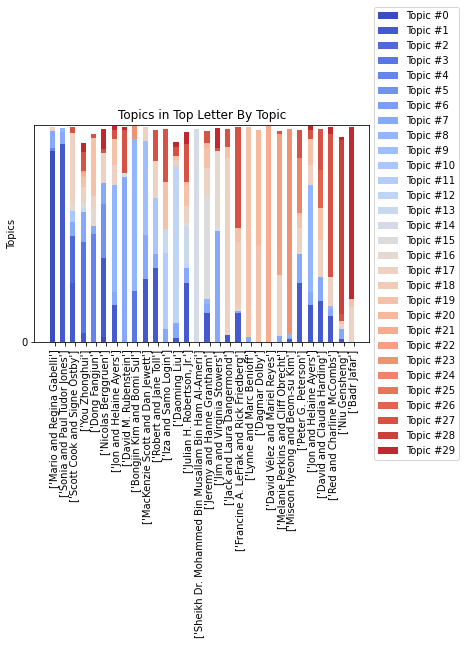

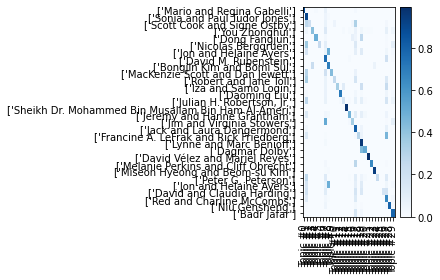

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
51                                             
47                                             
71                                Scott Cook   
58                                             
79                                             
206                        Nicolas Berggruen   
0                                              
223                         David Rubenstein   
11                                             
32                                             
35                                             
86                                             
28                                             
221  Julian Robertson, Julian Robertson, Jr.   
33                                             
22                                             
224                                            
97                                             
27                                             
68                              Marc Benioff   
78                              Dagmar Dolby   
7                                              
5                                              
10                                             
219                           Peter Peterson   
0                                              
23                                             
176                                            
101                                            
52                                             

                                          letters_text  topic_#  
51   "'The measure of who we are is what we do with...        0  
47   "We have found that all giving is joyous; true...        1  
71   "Rather than waiting, we are giving now. The c...        2  
58   "Acting Positive makes people gain wisdom and ...        3  
79   "Let's create wealth through the diligent, pio...        4  
206  “Everyone is dealt a group of cards at birth. ...        5  
0    "Humanity has a limited amount of time to turn...        6  
223  "I do hope that others involved in this effort...        7  
11   "We are certain that this pledge is the greate...        8  
32   "There are lots of resources each of us can pu...        9  
35   "We are pleased to write this letter as signat...       10  
86   "Not only are we pledging to spend the great m...       11  
28   "A person, because of love, will be full of st...       12  
221  "One very fortunate thing is that I did not ge...       13  
33   “Based on the principles of our Islamic religi...       14  
22   "This is a winnable war (against environmental...       15  
224  "Our vision is to make a significant contribut...       16  
97   "Our plan is to keep working for as long as we...       17  
27   "We have lived our lives championing those who...       18  
68   “We believe that in order for our communities ...       19  
78   "I am delighted to confirm my plans to devote ...       20  
7    "There is extreme urgency to invest wealth now...       21  
5    “We have this wildly optimistic belief that th...       22  
10   "With this pledge as our starting point, my wi...       23  
219  “As I watched and learned from my father's exa...       24  
0    "Humanity has a limited amount of time to turn...       25  
23   "I have been fortunate enough to pursue a fasc...       26  
176  “What we intend is for our gifts to make an ob...       27  
101  “Small victories are based on wisdom, great vi...       28  
52   “Too much philanthropy in our region of the wo...       29

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text", "topic_#"]]



# W/ bigrams 40 topics

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=40, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 2), (32, 2), (33, 1), (34, 2), (35, 1), (36, 1), (37, 1), (38, 1), (39, 1), (40, 2), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 1), (52, 9), (53, 3), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 2), (61, 1), (62, 1), (63, 1), (64, 1), (65, 1), (66, 2), (67, 1), (68, 1), (69, 2), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 1), (77, 2), (78, 1), (79, 2), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 2), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 1), (95, 3), (96, 1), (97, 1), (98, 1), (99, 2), (100, 1), (101, 1), (102, 5), (103, 1), (104, 1), (105, 1), (106, 1), (107, 2), (108, 1), (109, 1), (110, 1)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.067457  0.031405       1        1   1.023942
1     -0.349390  0.007676       2        1   5.833393
2      0.085615  0.017988       3        1   0.551784
3      0.115893 -0.022674       4        1   0.760917
4     -0.295346 -0.138640       5        1   1.566212
5      0.110181 -0.003790       6        1   0.251167
6      0.112057 -0.025798       7        1   0.830921
7     -0.395626 -0.073004       8        1   7.051158
8     -0.147944  0.141165       9        1   6.034325
9     -0.283399  0.000260      10        1   3.648641
10     0.100765  0.008792      11        1   0.004981
11     0.100765  0.008792      12        1   0.005005
12    -0.055459  0.118627      13        1   3.669088
13     0.098627 -0.038431      14        1   0.648715
14     0.097290 -0.004173      15        1   0.412763
15     0.109993 -0.004166      16        1   0.347552
16    -0.212678 -0.299851      17        1   0.739905
17    -0.238771  0.170808      18        1  14.108369
18     0.107203  0.004744      19        1   0.170307
19    -0.326955 -0.053911      20        1   5.062139
20    -0.110739  0.113394      21        1   3.594621
21     0.102574 -0.039139      22        1   1.325693
22     0.107039  0.002924      23        1   0.170141
23     0.074269 -0.141044      24        1   3.368497
24     0.100765  0.008792      25        1   0.004978
25     0.104199  0.008388      26        1   0.119589
26     0.105130  0.004950      27        1   0.081921
27    -0.285566  0.160392      28        1  33.191316
28     0.100765  0.008793      29        1   0.005068
29    -0.066456  0.087217      30        1   2.603876
30     0.092819 -0.001467      31        1   0.770418
31     0.112628 -0.007245      32        1   0.361688
32     0.100765  0.008792      33        1   0.005003
33     0.039007 -0.092042      34        1   0.444367
34     0.102582  0.007148      35        1   0.033519
35     0.103889  0.003390      36        1   0.277680
36     0.100765  0.008793      37        1   0.005192
37     0.103296  0.003098      38        1   0.593926
38     0.107808  0.004716      39        1   0.251587
39     0.104182  0.004330      40        1   0.069634, topic_info=            Term        Freq       Total Category  logprob  loglift
274         year  193.000000  193.000000  Default  30.0000  30.0000
19            be  317.000000  317.000000  Default  29.0000  29.0000
477         hope  227.000000  227.000000  Default  28.0000  28.0000
2082   institute  123.000000  123.000000  Default  27.0000  27.0000
1226       share  142.000000  142.000000  Default  26.0000  26.0000
...          ...         ...         ...      ...      ...      ...
2060       enjoy    0.004086   41.057484  Topic40  -8.8641  -1.9456
48     community    0.004084  116.847974  Topic40  -8.8644  -2.9918
88        evolve    0.004083   10.378057  Topic40  -8.8646  -0.5708
2158      fellow    0.004083   15.083342  Topic40  -8.8647  -0.9448
307   foundation    0.004082  162.128706  Topic40  -8.8650  -3.3199

[1960 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
1112      5  0.084242          $
1112     20  0.252727          $
1112     28  0.652877          $
810      22  0.938428     -PRON-
6442     17  0.965920  1,000.the
...     ...       ...        ...
1848      4  0.637121         하게
1849      4  0.637121         하고
1586      7  0.949851         함께
1587      7  0.769637       합니다.
1588      7  0.769637        해결에

[2123 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

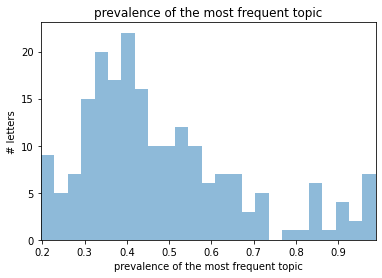

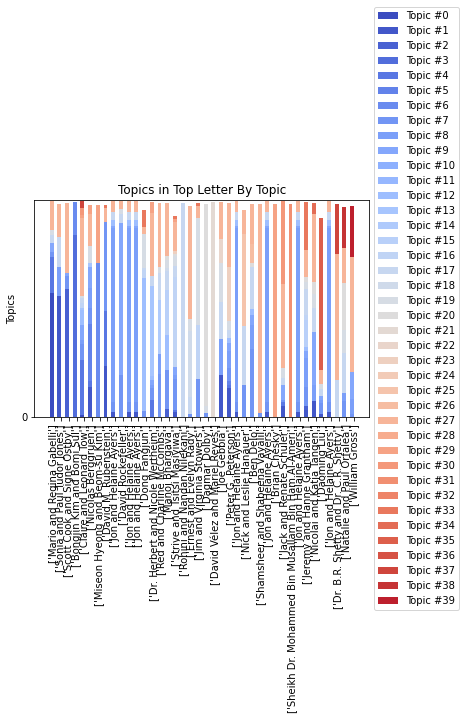

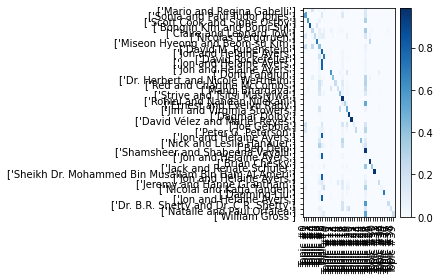


Perplexity:  -8.061223750487743

Coherence Score:  0.44042570974567924


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:160: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:161: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pledger_name  \
76                            Mario and Regina Gabelli   
47                          Sonia and Paul Tudor Jones   
71                          Scott Cook and Signe Ostby   
11                            Bongjin Kim and Bomi Sul   
163                             Claire and Leonard Tow   
206                                  Nicolas Berggruen   
10                       Miseon Hyeong and Beom-su Kim   
223                                David M. Rubenstein   
0                                Jon and Helaine Ayers   
222                                  David Rockefeller   
0                                Jon and Helaine Ayers   
0                                Jon and Helaine Ayers   
54                                        Dong Fangjun   
106                    Dr. Herbert and Nicole Wertheim   
176                           Red and Charline McCombs   
155                                     Manoj Bhargava   
123                         Strive and Tsitsi Masiyiwa   
75                          Rohini and Nandan Nilekani   
42                              Ernest and Evelyn Rady   
224                           Jim and Virginia Stowers   
78                                        Dagmar Dolby   
7                         David Vélez and Mariel Reyes   
74                                          Joe Gebbia   
219                                  Peter G. Peterson   
0                                Jon and Helaine Ayers   
80                             Nick and Leslie Hanauer   
21                                            Ben Delo   
46                      Shamsheer and Shabeena Vayalil   
0                                Jon and Helaine Ayers   
70                                        Brian Chesky   
8                              Jack and Renate Schuler   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
0                                Jon and Helaine Ayers   
22                           Jeremy and Hanne Grantham   
34                            Nicolai and Katja Tangen   
28                                         Daoming Liu   
0                                Jon and Helaine Ayers   
41                 Dr. B.R. Shetty and Dr. C.R. Shetty   
124                           Natalie and Paul Orfalea   
15                                       William Gross   

                                          letters_text  topic_#  max_topic_val  
76   "'The measure of who we are is what we do with...        0       0.571540  
47   "We have found that all giving is joyous; true...        1       0.557754  
71   "Rather than waiting, we are giving now. The c...        2       0.591730  
11   "We are certain that this pledge is the greate...        3       0.838531  
163  “Claire and I never believed that the wealth w...        4       0.253396  
206  “Everyone is dealt a group of cards at birth. ...        5       0.265133  
10   "With this pledge as our starting point, my wi...        6       0.708298  
223  "I do hope that others involved in this effort...        7       0.410143  
0    "Humanity has a limited amount of time to turn...        8       0.799572  
222  “Our family continues to be united in the beli...        9       0.700502  
0    "Humanity has a limited amount of time to turn...       10       0.000000  
0    "Humanity has a limited amount of time to turn...       11       0.000000  
54   "Let's create wealth through the diligent, pio...       12       0.609482  
106  “Many of America’s private universities have m...       13       0.410989  
176  “What we intend is for our gifts to make an ob...       14       0.247640  
155  “Service to others seems the only intelligent ...       15       0.205466  
123  “In making this pledge, to give not less than ...       16       0.415760  
75   “We thank Bill and Melinda for creating this u...       17       0.983497  
42   “Personally, there are four things for which I...       18       0.300727  
224  "Our vision is to make a significant c

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]


ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
topic_values = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  value_max = max(values)
  topic_indices.append(index_max)
  topic_values.append(value_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters["max_topic_val"] = topic_values
representative_letters[["pledger_name", "letters_text", "topic_#", "max_topic_val"]]

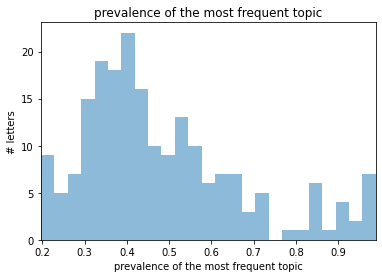

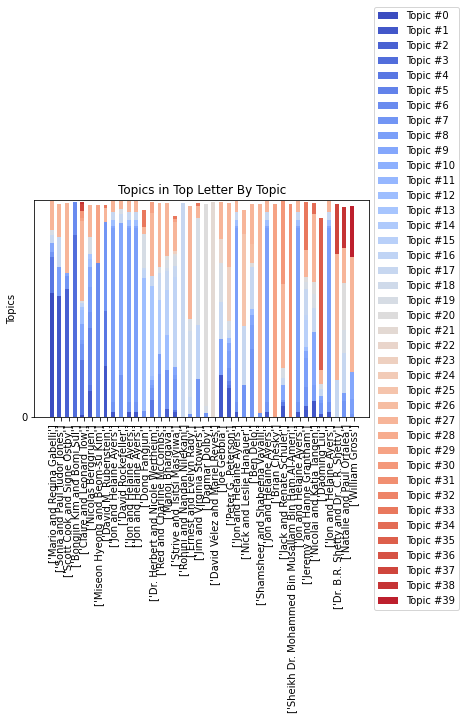

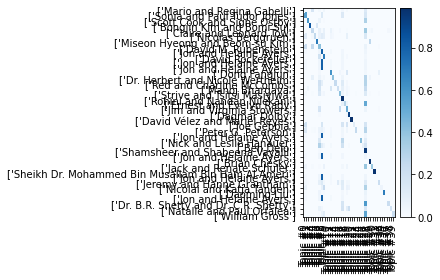

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pledger_name  \
51                            Mario and Regina Gabelli   
47                          Sonia and Paul Tudor Jones   
96                          Scott Cook and Signe Ostby   
11                            Bongjin Kim and Bomi Sul   
163                             Claire and Leonard Tow   
206                                  Nicolas Berggruen   
10                       Miseon Hyeong and Beom-su Kim   
223                                David M. Rubenstein   
0                                Jon and Helaine Ayers   
222                                  David Rockefeller   
0                                Jon and Helaine Ayers   
0                                Jon and Helaine Ayers   
54                                        Dong Fangjun   
106                    Dr. Herbert and Nicole Wertheim   
176                           Red and Charline McCombs   
155                                     Manoj Bhargava   
123                         Strive and Tsitsi Masiyiwa   
50                          Rohini and Nandan Nilekani   
42                              Ernest and Evelyn Rady   
224                           Jim and Virginia Stowers   
78                                        Dagmar Dolby   
7                         David Vélez and Mariel Reyes   
99                                          Joe Gebbia   
219                                  Peter G. Peterson   
0                                Jon and Helaine Ayers   
55                             Nick and Leslie Hanauer   
21                                            Ben Delo   
46                      Shamsheer and Shabeena Vayalil   
0                                Jon and Helaine Ayers   
70                                        Brian Chesky   
8                              Jack and Renate Schuler   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
0                                Jon and Helaine Ayers   
22                           Jeremy and Hanne Grantham   
34                            Nicolai and Katja Tangen   
28                                         Daoming Liu   
0                                Jon and Helaine Ayers   
41                 Dr. B.R. Shetty and Dr. C.R. Shetty   
124                           Natalie and Paul Orfalea   
15                                       William Gross   

                                          letters_text  topic_#  
51   "'The measure of who we are is what we do with...        0  
47   "We have found that all giving is joyous; true...        1  
96   "Rather than waiting, we are giving now. The c...        2  
11   "We are certain that this pledge is the greate...        3  
163  “Claire and I never believed that the wealth w...        4  
206  “Everyone is dealt a group of cards at birth. ...        5  
10   "With this pledge as our starting point, my wi...        6  
223  "I do hope that others involved in this effort...        7  
0    "Humanity has a limited amount of time to turn...        8  
222  “Our family continues to be united in the beli...        9  
0    "Humanity has a limited amount of time to turn...       10  
0    "Humanity has a limited amount of time to turn...       11  
54   "Let's create wealth through the diligent, pio...       12  
106  “Many of America’s private universities have m...       13  
176  “What we intend is for our gifts to make an ob...       14  
155  “Service to others seems the only intelligent ...       15  
123  “In making this pledge, to give not less than ...       16  
50   “We thank Bill and Melinda for creating this u...       17  
42   “Personally, there are four things for which I...       18  
224  "Our vision is to make a significant contribut...       19  
78   "I am delighted to confirm my plans to devote ...       20  
7    "There is extreme urgency to invest wealth now...       21  
99   “I want to devote my resources to bring the mo...       22  
219  “As I watched and learned from my father's exa...       23  
0    "Humanit

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["pledger_name", "letters_text", "topic_#"]]

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'most', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=40, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 4), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 2), (30, 2), (31, 1), (32, 8), (33, 1), (34, 1), (35, 1), (36, 1), (37, 1), (38, 1), (39, 2), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 1), (47, 1), (48, 1), (49, 1), (50, 1), (51, 9), (52, 3), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 2), (60, 1), (61, 1), (62, 1), (63, 1), (64, 1), (65, 2), (66, 1), (67, 1), (68, 2), (69, 1), (70, 1), (71, 1), (72, 1), (73, 1), (74, 1), (75, 1), (76, 2), (77, 1), (78, 2), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1), (92, 1), (93, 1), (94, 3), (95, 1), (96, 1), (97, 1), (98, 3), (99, 1), (100, 5), (101, 1), (102, 1), (103, 1), (104, 1), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (110, 2)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.211826  0.176938       1        1  11.099644
1      0.056324  0.046624       2        1   1.971026
2     -0.027908 -0.086843       3        1   2.014934
3     -0.100929  0.012293       4        1   0.021493
4     -0.099622  0.012678       5        1   0.005016
5     -0.105520 -0.007574       6        1   0.155676
6     -0.097007 -0.000988       7        1   0.429531
7     -0.099623  0.012678       8        1   0.004909
8      0.235553 -0.193561       9        1   3.222875
9     -0.105631  0.011499      10        1   0.108571
10    -0.099622  0.012678      11        1   0.004981
11    -0.107351  0.001263      12        1   0.565435
12     0.373517  0.136029      13        1  12.442249
13    -0.099803  0.012624      14        1   0.007779
14    -0.062139 -0.003543      15        1   1.813004
15    -0.100841  0.012318      16        1   0.016094
16     0.077388 -0.178567      17        1   0.404734
17    -0.112987  0.002965      18        1   0.260971
18    -0.099623  0.012678      19        1   0.004951
19    -0.106685  0.007974      20        1   0.230296
20    -0.084571 -0.009990      21        1   1.613627
21    -0.106196 -0.018124      22        1   1.380202
22    -0.112216 -0.004476      23        1   0.419526
23    -0.032990 -0.006795      24        1   0.674565
24     0.233524  0.131599      25        1  13.886547
25    -0.099622  0.012678      26        1   0.005047
26    -0.102125  0.011703      27        1   0.037739
27    -0.099622  0.012679      28        1   0.005050
28     0.278662  0.085373      29        1  28.413361
29    -0.051725 -0.001785      30        1   0.983516
30    -0.110295  0.006567      31        1   0.182231
31     0.373989 -0.208001      32        1   2.882663
32    -0.115045  0.002599      33        1   0.412343
33    -0.100743  0.012339      34        1   0.018649
34     0.349923  0.131106      35        1   8.008858
35     0.229405 -0.261076      36        1   1.179676
36     0.311444  0.063340      37        1   4.086076
37    -0.082935  0.018927      38        1   0.842918
38    -0.108555  0.008495      39        1   0.178372
39    -0.099623  0.012678      40        1   0.004868, topic_info=              Term        Freq       Total Category  logprob  loglift
103           give  562.000000  562.000000  Default   30.000  30.0000
4271     endowment  123.000000  123.000000  Default   29.000  29.0000
305     foundation  222.000000  222.000000  Default   28.000  28.0000
471           hope  221.000000  221.000000  Default   27.000  27.0000
2053     institute  129.000000  129.000000  Default   26.000  26.0000
...            ...         ...         ...      ...      ...      ...
650        network    0.000324   17.958866  Topic40   -8.756  -0.9921
330           make    0.000324  105.319324  Topic40   -8.756  -2.7610
708        student    0.000324   58.033503  Topic40   -8.756  -2.1650
305     foundation    0.000324  222.326423  Topic40   -8.756  -3.5081
51    conservation    0.000324    9.671617  Topic40   -8.756  -0.3732

[1995 rows x 6 columns], token_table=      Topic      Freq    Term
term                         
1092      1  0.023512       $
1092      3  0.117560       $
1092      9  0.399705       $
1092     13  0.258633       $
1092     21  0.047024       $
...     ...       ...     ...
1551     21  0.378214      통해
1561     21  0.849833      함께
1562     21  0.674676    합니다.
1563     21  0.674676     해결에
1836     15  0.905871  환원하겠다는

[2047 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40])

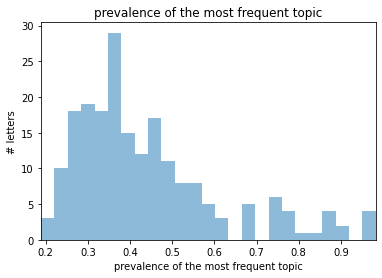

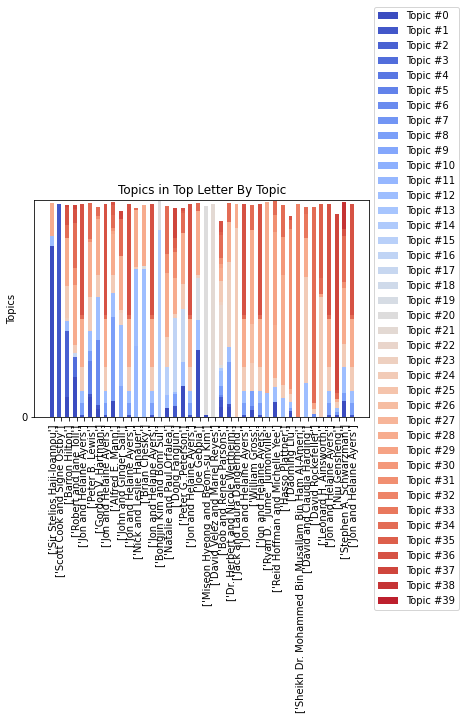


Perplexity:  -7.962037884807566

Coherence Score:  0.4080939088285088


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


pledger_name  \
85                            Sir Stelios Haji-Ioannou   
71                          Scott Cook and Signe Ostby   
211                                      Barron Hilton   
35                                Robert and Jane Toll   
0                                Jon and Helaine Ayers   
159                                     Peter B. Lewis   
24                                   Gordon V. Hartman   
0                                Jon and Helaine Ayers   
212                                     Alfred E. Mann   
175                               John and Ginger Sall   
0                                Jon and Helaine Ayers   
55                             Nick and Leslie Hanauer   
95                                        Brian Chesky   
0                                Jon and Helaine Ayers   
11                            Bongjin Kim and Bomi Sul   
124                           Natalie and Paul Orfalea   
79                                        Dong Fangjun   
219                                  Peter G. Peterson   
0                                Jon and Helaine Ayers   
99                                          Joe Gebbia   
10                       Miseon Hyeong and Beom-su Kim   
7                         David Vélez and Mariel Reyes   
131                              Bob and Renee Parsons   
106                    Dr. Herbert and Nicole Wertheim   
72                           Jack and Laura Dangermond   
0                                Jon and Helaine Ayers   
15                                       William Gross   
0                                Jon and Helaine Ayers   
48                           Ryan D. “Jume” Jumonville   
45                       Reid Hoffman and Michelle Yee   
149                                     Hasso Plattner   
28                                         Daoming Liu   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
23                           David and Claudia Harding   
222                                  David Rockefeller   
63                                Leonard H. Ainsworth   
0                                Jon and Helaine Ayers   
101                                       Niu Gensheng   
14                               Stephen A. Schwarzman   
0                                Jon and Helaine Ayers   

                                          letters_text  topic_#  
85   "My belief is that nobody has a monopoly on go...        0  
71   "Rather than waiting, we are giving now. The c...        1  
211  “It is my hope that others are inspired by my ...        2  
35   "We are pleased to write this letter as signat...        3  
0    "Humanity has a limited amount of time to turn...        4  
159  "The catch phrases that drive my life and phil...        5  
24   "The cost of caring for a child or adult with ...        6  
0    "Humanity has a limited amount of time to turn...        7  
212  "The success of my first company has enabled m...        8  
175  “We are happy to confirm our longtime plans an...        9  
0    "Humanity has a limited amount of time to turn...       10  
55   "There is no greater privilege than to be fort...       11  
95   “There is a saying that a great trip can set y...       12  
0    "Humanity has a limited amount of time to turn...       13  
11   "We are certain that this pledge is the greate...       14  
124  “Our entrepreneurial background influences our...       15  
79   "Let's create wealth through the diligent, pio...       16  
219  “As I watched and learned from my father's exa...       17  
0    "Humanity has a limited amount of time to turn...       18  
99   “I want to devote my resources to bring the mo...       19  
10   "With this pledge as our starting point, my wi...       20  
7    "There is extreme urgency to invest wealth now...       21  
131  “Renee and I have always believed every child ...       22  
106  “Many of America’s private universities have m...       23  
72   "Our pla

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=df["normalized_letters"], dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["pledger_name", "letters_text", "topic_#"]]

# Other

In [ ]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'pledger_name',
       'principal_related_foundation', 'residence', 'net_worth', 'joined',
       'bio', 'name', 'letters_text', 'name.1', 'tokenized_letters',
       'letter_word_count', 'normalized_letters', 'normalized_letters_count',
       'letters_text_noquote', 'POS_sents', 'text_bigrams'],
      dtype='object')

In [ ]:
lda_model.top_topics(corpus)

[([(0.015962387, 'في'),
   (0.011998858, 'من'),
   (0.006053566, 'الأعمال'),
   (0.0060535655, 'إلى'),
   (0.0040718033, 'أو'),
   (0.0040718033, 'و'),
   (0.0040718024, 'لتقديم'),
   (0.0040718024, 'البشرية'),
   (0.004071802, 'الخيرية'),
   (0.004071802, 'مبادرات'),
   (0.004071802, 'العمل'),
   (0.004071802, 'إنسانية'),
   (0.0040718014, 'خلال'),
   (0.0040718014, 'نسعى'),
   (0.0040718014, 'العطاء'),
   (0.0040718014, 'الإنساني'),
   (0.0040718014, 'مجال'),
   (0.0040718014, 'كما'),
   (0.0040718014, 'لخدمة'),
   (0.0040718014, 'رائدة')],
  2.030000611846118e-10),
 ([(0.036408134, 'de'),
   (0.026495054, 'e'),
   (0.019886333, 'que'),
   (0.015480524, 'uma'),
   (0.011074711, 'o'),
   (0.01107471, 'para'),
   (0.008871805, 'nos'),
   (0.008871804, 'na'),
   (0.007417065, 'chuck'),
   (0.0066688983, '-PRON-'),
   (0.0066688973, 'maior'),
   (0.006668897, 'mais'),
   (0.0055674445, 'com'),
   (0.0055674445, 'américa'),
   (0.0055674445, 'nossa'),
   (0.0055674445, 'vida'),
   (0.0055



# W/ bigrams 40 topics

# New Section

In [ ]:
text = 'letters_text_noquote'
tokenized_col = 'tokenized_letters'
normalized_col = 'normalized_letters'

bigram_mod = gensim.models.phrases.Phraser(bigram)

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]



df[tokenized_col] = df[text].apply(lambda x: str(x)).apply(lambda x: word_tokenize(x))
df[normalized_col] = df[tokenized_col].apply(lambda x: normalizeTokens(x, extra_stop = ['i', 'we', 'our', 'my', 'is', 'have', 'are', 'their', 'not', 'more', 'can', 'us', 'you', 'has', 'will', 'me', 'most', 'were', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never', 'paul','hilton','conrad','jon','i','be','garrett','camp\.orgrepost','info@camp\.org','katia','jeremy','ako', 'warren', 'david'], fewer_stop=['more', 'can', 'will', 'most', 'was', 'now', 'new', 'best', 'only', 'no', 'every', 'never']))
df['normalized_letters_count'] = df[normalized_col].apply(lambda x: len(x))
df[normalized_col] = make_bigrams(df[normalized_col])

# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

# Topic model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=40, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)


# Print the Keyword in the topics
print("LDA keywords:")
print(lda_model.print_topics())
doc_lda = lda_model[corpus]

topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pd.DataFrame(topicsDict)
print(wordRanksDF)

# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
vis






KeyboardInterrupt: ignored

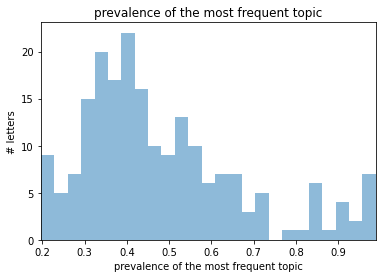

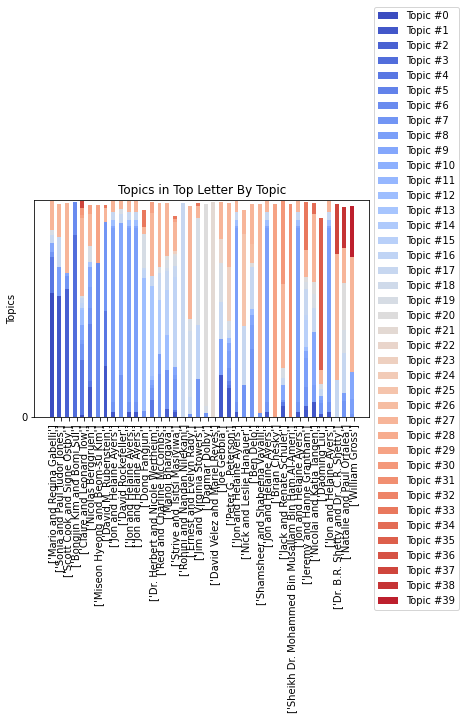

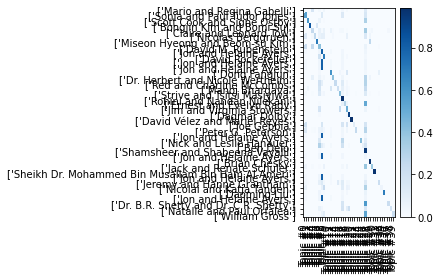

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:150: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


name  \
76                            Mario and Regina Gabelli   
47                          Sonia and Paul Tudor Jones   
96                          Scott Cook and Signe Ostby   
11                            Bongjin Kim and Bomi Sul   
163                             Claire and Leonard Tow   
206                                  Nicolas Berggruen   
10                       Miseon Hyeong and Beom-su Kim   
223                                David M. Rubenstein   
0                                Jon and Helaine Ayers   
222                                  David Rockefeller   
0                                Jon and Helaine Ayers   
0                                Jon and Helaine Ayers   
79                                        DONG Fangjun   
106                    Dr. Herbert and Nicole Wertheim   
176                           Red and Charline McCombs   
155                                     Manoj Bhargava   
123                         Strive and Tsitsi Masiyiwa   
75                          Rohini and Nandan Nilekani   
42                              Ernest and Evelyn Rady   
224                           Jim and Virginia Stowers   
53                                        Dagmar Dolby   
7                         David Vélez and Mariel Reyes   
74                                          Joe Gebbia   
219                                  Peter G. Peterson   
0                                Jon and Helaine Ayers   
55                             Nick and Leslie Hanauer   
21                                            Ben Delo   
46                      Shamsheer and Shabeena Vayalil   
0                                Jon and Helaine Ayers   
70                                        Brian Chesky   
8                              Jack and Renate Schuler   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
0                                Jon and Helaine Ayers   
22                           Jeremy and Hanne Grantham   
34                            Nicolai and Katja Tangen   
28                                         Daoming Liu   
0                                Jon and Helaine Ayers   
41                 Dr. B.R. Shetty and Dr. C.R. Shetty   
124                           Natalie and Paul Orfalea   
15                                       William Gross   

                                          letters_text  topic_#  
76   "'The measure of who we are is what we do with...        0  
47   "We have found that all giving is joyous; true...        1  
96   "Rather than waiting, we are giving now. The c...        2  
11   "We are certain that this pledge is the greate...        3  
163  “Claire and I never believed that the wealth w...        4  
206  “Everyone is dealt a group of cards at birth. ...        5  
10   "With this pledge as our starting point, my wi...        6  
223  "I do hope that others involved in this effort...        7  
0    "Humanity has a limited amount of time to turn...        8  
222  “Our family continues to be united in the beli...        9  
0    "Humanity has a limited amount of time to turn...       10  
0    "Humanity has a limited amount of time to turn...       11  
79   "Let's create wealth through the diligent, pio...       12  
106  “Many of America’s private universities have m...       13  
176  “What we intend is for our gifts to make an ob...       14  
155  “Service to others seems the only intelligent ...       15  
123  “In making this pledge, to give not less than ...       16  
75   “We thank Bill and Melinda for creating this u...       17  
42   “Personally, there are four things for which I...       18  
224  "Our vision is to make a significant contribut...       19  
53   "I am delighted to confirm my plans to devote ...       20  
7    "There is extreme urgency to invest wealth now...       21  
74   “I want to devote my resources to bring the mo...       22  
219  “As I watched and learned from my father's exa...       23  
0    "Humanity has a 

In [ ]:
### SECOND PART OF TOPIC MODEL INSPECTION


ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF.iloc[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV



topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''





ldaDFV = ldaDF.iloc[topic_indices][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF.iloc[topic_indices][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = lda_model.num_topics
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Top Letter By Topic')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()


representative_letters = df.iloc[topic_indices]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters[["name", "letters_text", "topic_#"]]

In [ ]:
# Create Dictionary
dataset = df[normalized_col]# [d.split() for d in df[normalized_col]]
id2word = corpora.Dictionary(dataset)

# Create Corpus
texts = dataset

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

corpus = [dictionary.doc2bow(text) for text in senReleasesTraining['reduced_tokens']]

gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')

senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=40, alpha='auto', eta='auto')

sen1Bow = dictionary.doc2bow(senReleasesTraining['reduced_tokens'][11])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(senReleasesTraining['name'][11]))
print("are: {}".format(sen1lda))

ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF

ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_modele[dictionary.doc2bow(l)] for l in df['normalized_tokens']]
    })

ldaDF

name  \
0        Jon and Helaine Ayers   
1    Jared and Monica Isaacman   
2             Steven Schuurman   
3        Patti Bao and Tony Xu   
4                Jeff T. Green   
..                         ...   
220           T. Boone Pickens   
221   Julian H. Robertson, Jr.   
222          David Rockefeller   
223        David M. Rubenstein   
224   Jim and Virginia Stowers   

                                                topics  
0    ([(1, 0.10364852), (4, 0.010115372), (5, 0.700...  
1    ([(1, 0.1986889), (5, 0.12784651), (9, 0.15436...  
2    ([(1, 0.10404961), (3, 0.062357776), (5, 0.156...  
3    ([(1, 0.23228854), (4, 0.13927178), (5, 0.0508...  
4    ([(1, 0.0435853), (4, 0.017450932), (5, 0.0995...  
..                                                 ...  
220  ([(1, 0.2743272), (5, 0.025024667), (10, 0.634...  
221  ([(1, 0.074305035), (4, 0.021099703), (5, 0.09...  
222  ([(12, 0.032744244), (15, 0.9468953)], [(40, [...  
223  ([(1, 0.92620504), (12, 0.021951674), (15, 0.0...  
224  ([(1, 0.01744009), (12, 0.97366506)], [(14, [1...  

[203 rows x 2 columns]

In [ ]:
ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF

name  \
0        Jon and Helaine Ayers   
1    Jared and Monica Isaacman   
2             Steven Schuurman   
3        Patti Bao and Tony Xu   
4                Jeff T. Green   
..                         ...   
220           T. Boone Pickens   
221   Julian H. Robertson, Jr.   
222          David Rockefeller   
223        David M. Rubenstein   
224   Jim and Virginia Stowers   

                                                topics  
0    ([(1, 0.10366181), (4, 0.010520569), (5, 0.700...  
1    ([(1, 0.19870143), (5, 0.12785242), (9, 0.1543...  
2    ([(1, 0.1040256), (3, 0.062357776), (5, 0.1560...  
3    ([(1, 0.23228979), (4, 0.13926922), (5, 0.0508...  
4    ([(1, 0.04358604), (4, 0.017450994), (5, 0.099...  
..                                                 ...  
220  ([(1, 0.27432242), (5, 0.02502471), (10, 0.634...  
221  ([(1, 0.07430447), (4, 0.021091955), (5, 0.099...  
222  ([(12, 0.032744795), (15, 0.9468923)], [(40, [...  
223  ([(1, 0.926205), (12, 0.021951824), (15, 0.050...  
224  ([(1, 0.017446421), (12, 0.9736586)], [(14, [1...  

[203 rows x 2 columns]

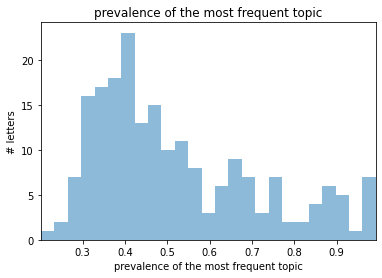

In [ ]:


#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


In [ ]:
# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

# semantically inspect
topicsDict = {}
for topicNum in range(lda_model.num_topics):
    topicWords = [w for w, p in lda_model.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Topic_0   Topic_1    Topic_2  \
0   clinical    pledge       give   
1  blindness      will     pledge   
2       gund        be      child   
3      llura      more       more   
4        ffb    giving     family   
5      trial       law       life   
6   envision       bit        can   
7    qualify      feel       will   
8      trust  resource       year   
9   fighting     world  education   

                                             Topic_3        Topic_4  \
0                                           thankful           give   
1                                           kindness           life   
2                                            victory         pledge   
3                                            consume           more   
4                                            logical          share   
5                                                let           good   
6                                               pure  philanthropic   
7  年以来，我陆续辞去蒙牛集团总裁、董事长，从企业家全身心转为慈善家；在我的影响下，家族成员全部...         wealth   
8                                           老牛基金会创始人        fortune   
9                                                  生           work   

        Topic_5 Topic_6   Topic_7        Topic_8    Topic_9    Topic_10  \
0          work      be         그         africa     social        give   
1          give  people        통해      community  volunteer      people   
2         child     can         이         region  stimulate  foundation   
3         focus    give       one        support       rule      pledge   
4        choose    want         더  philanthropic      right       world   
5         world  jewish  listener           need    ukraine        life   
6    healthcare    work     legal    development   lombardi        help   
7  organization    good        작은        african    project          be   
8       climate    year  greatest       business         ma        work   
9       believe   world         잘         impact        non      family   

      Topic_11    Topic_12   Topic_13 Topic_14      Topic_15     Topic_16  \
0         help    research    teacher   jewish  philanthropy       father   
1        susan        hope     virgin     jews           way  corporation   
2          tea   institute  principal  judaism      patience       jewish   
3         bear        life        pre        이          will          war   
4         drug       share    deserve   attach        family          amf   
5      develop   endowment   approach   string     challenge       hotels   
6          die        give       1960       대한          most     canadian   
7  demonstrate  scientific        liz       d.        pledge    recession   
8         wood   scientist  education    smile          idea           n.   
9  smallholder        year       sign   engage          good       israel   

  Topic_17 Topic_18       Topic_19  
0       de   jewish             ½%  
1        e   people        waiting  
2      que    money           less  
3      uma    world     completely  
4     para     time       steadily  
5        o     more           burn  
6       na      can     consumable  
7      nos   create         stower  
8     mais     year     life"—hope  
9    maior       no  uninterrupted

TypeError: ignored

In [ ]:
df.iloc[[4]]

Unnamed: 0  Unnamed: 0.1   pledger_name     principal_related_foundation  \
4           4             4  Jeff T. Green  Jeff T. Green Family Foundation   

          residence     net_worth      joined  \
4  Newbury Park, CA  $5.7 billion  11/16/2021   

                                                 bio           name  \
4  Jeff Green is the co-founder and CEO of the bu...  Jeff T. Green   

                                        letters_text name.1  \
4  My family foundation and its giving arm—Dataph...    NaN   

                                   tokenized_letters  letter_word_count  \
4  [My, family, foundation, and, its, giving, arm...               1475   

                                  normalized_letters  \
4  [family, foundation, give, arm, dataphilanthro...   

   normalized_letters_count                               letters_text_noquote  
4                       716  My family foundation and its giving arm—Dataph...

In [ ]:
topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")

representative_letters = df.iloc[topic_indices][["name", "letters_text"]]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters

name  \
206                                  Nicolas Berggruen   
223                                David M. Rubenstein   
0                                Jon and Helaine Ayers   
101                                       Gensheng Niu   
90                       Dean and Marianne Metropoulos   
71                          Scott Cook and Signe Ostby   
74                                          Joe Gebbia   
11                            Bongjin Kim and Bomi Sul   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
76                            Mario and Regina Gabelli   
98   Henry Engelhardt and Diane Briere de l'Isle-En...   
89                               Terry and Susan Ragon   

                                          letters_text  topic_#  
206  “Everyone is dealt a group of cards at birth. ...        0  
223  "I do hope that others involved in this effort...        1  
0    "Humanity has a limited amount of time to turn...        2  
101  “Small victories are based on wisdom, great vi...        3  
90   “The true measure of who we are and the ultima...        4  
71   "Rather than waiting, we are giving now. The c...        5  
74   “I want to devote my resources to bring the mo...        6  
11   "We are certain that this pledge is the greate...        7  
33   “Based on the principles of our Islamic religi...        8  
76   "'The measure of who we are is what we do with...        9  
98   “In business and in our personal lives, we hav...       10  
89   “Susan and I often find ourselves wondering, ‘...       11

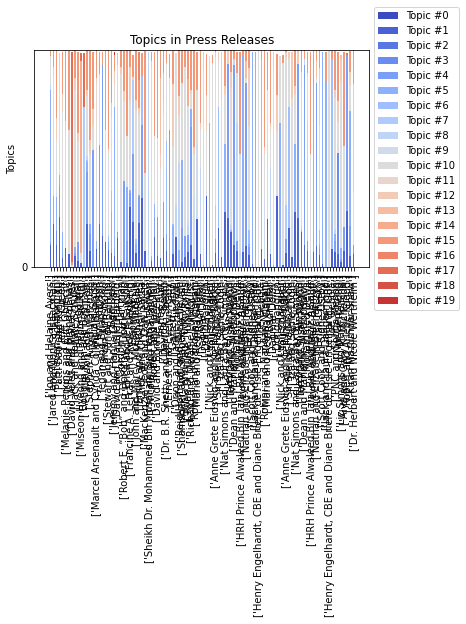

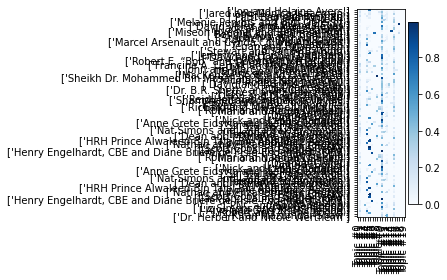

"\nfor i in range(lda_model.num_topics):\n  topic_df = pandas.DataFrame(lda_model.show_topic(i, topn=50))\n  plt.figure()\n  topic_df.plot.bar(legend = False)\n\n  plt.title('Probability Distribution of Words, Topic {}'.{i})\ntopic1_df = pandas.DataFrame(lda_model.show_topic(1, topn=50))\nplt.figure()\ntopic1_df.plot.bar(legend = False)\nplt.title('Probability Distribution of Words, Topic 1')\nplt.show()"

In [ ]:
# Visualize

# N documents, K topics

N = 100
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

'''
for i in range(lda_model.num_topics):
  topic_df = pandas.DataFrame(lda_model.show_topic(i, topn=50))
  plt.figure()
  topic_df.plot.bar(legend = False)

  plt.title('Probability Distribution of Words, Topic {}'.{i})
topic1_df = pandas.DataFrame(lda_model.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()'''

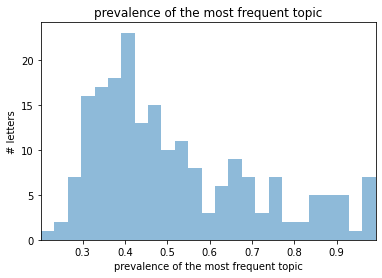

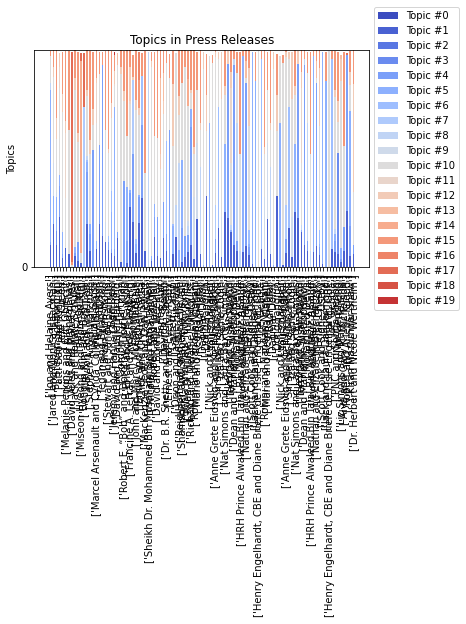

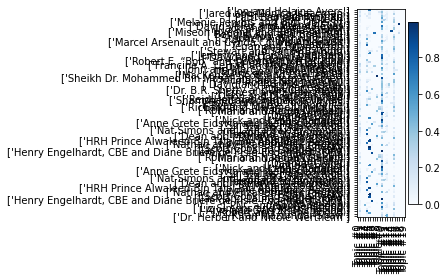

name  \
206                                  Nicolas Berggruen   
223                                David M. Rubenstein   
0                                Jon and Helaine Ayers   
101                                       Gensheng Niu   
90                       Dean and Marianne Metropoulos   
71                          Scott Cook and Signe Ostby   
74                                          Joe Gebbia   
11                            Bongjin Kim and Bomi Sul   
33   Sheikh Dr. Mohammed Bin Musallam Bin Ham Al-Ameri   
76                            Mario and Regina Gabelli   
98   Henry Engelhardt and Diane Briere de l'Isle-En...   
89                               Terry and Susan Ragon   
224                           Jim and Virginia Stowers   
39                                        Charles Butt   
10                       Miseon Hyeong and Beom-su Kim   
222                                  David Rockefeller   
211                                      Barron Hilton   
7                         David Vélez and Mariel Reyes   
0                                Jon and Helaine Ayers   
22                           Jeremy and Hanne Grantham   

                                          letters_text  topic_#  
206  “Everyone is dealt a group of cards at birth. ...        0  
223  "I do hope that others involved in this effort...        1  
0    "Humanity has a limited amount of time to turn...        2  
101  “Small victories are based on wisdom, great vi...        3  
90   “The true measure of who we are and the ultima...        4  
71   "Rather than waiting, we are giving now. The c...        5  
74   “I want to devote my resources to bring the mo...        6  
11   "We are certain that this pledge is the greate...        7  
33   “Based on the principles of our Islamic religi...        8  
76   "'The measure of who we are is what we do with...        9  
98   “In business and in our personal lives, we hav...       10  
89   “Susan and I often find ourselves wondering, ‘...       11  
224  "Our vision is to make a significant contribut...       12  
39   “Over the past 30 years, my personal philanthr...       13  
10   "With this pledge as our starting point, my wi...       14  
222  “Our family continues to be united in the beli...       15  
211  “It is my hope that others are inspired by my ...       16  
7    "There is extreme urgency to invest wealth now...       17  
0    "Humanity has a limited amount of time to turn...       18  
22   "This is a winnable war (against environmental...       19

In [ ]:
ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [lda_model[id2word.doc2bow(l)] for l in texts]
    })

ldaDF



#Load them into the dict
most_common_topic = [] #range(len(ldaDF['topics']))

for index, topicTuples in enumerate(ldaDF['topics']):
    temp = [] #zeroes(len(topicTuples[0][1]))
    for topicNum, prob in topicTuples[0]:
      temp.append(prob)
      #print(index)
      
    most_common_topic.append(max(temp))
    

import numpy as np
import random
from matplotlib import pyplot as plt

data = most_common_topic

# fixed bin size
bins = np.arange(-100, 100, 5) # fixed bin size

plt.xlim([min(data), max(data)])

plt.hist(data, bins=25, alpha=0.5)
plt.title('prevalence of the most frequent topic')
plt.xlabel('prevalence of the most frequent topic')
plt.ylabel('# letters')

plt.show()

#plt.figure()

#most_common_topic.plot.bar(legend = False)
#plt.show()


# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(lda_model.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples[0]:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(lda_model.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF[:100][['topic_%d' %x for x in range(lda_model.num_topics)]]
ldaDFVisN = ldaDF[:100][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV




# Visualize

# N documents, K topics

N = 100
K = lda_model.num_topics  
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()

# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

'''
for i in range(lda_model.num_topics):
  topic_df = pandas.DataFrame(lda_model.show_topic(i, topn=50))
  plt.figure()
  topic_df.plot.bar(legend = False)

  plt.title('Probability Distribution of Words, Topic {}'.{i})
topic1_df = pandas.DataFrame(lda_model.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()'''

topic_indices = []
for topic in range(lda_model.num_topics):
  values = topicsProbDict[topic]
  index_max = max(range(len(values)), key=values.__getitem__)
  topic_indices.append(index_max)
  '''print(index_max)
  text = df["letters_text"][index_max]
  name = df["pledger_name"][index_max]
  print(f"Topic number {topic} is most prevaleent in letter from {name}, {index_max}. The letter reads like this:")
  print(text)
  print("")'''

representative_letters = df.iloc[topic_indices][["name", "letters_text"]]
representative_letters["topic_#"] = range(len(representative_letters))
representative_letters

In [ ]:
# I want a heatmap, a probability distribution of each topic, 

<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence \e
<input>:32: DeprecationWarning: invalid escape sequence \e
<input>:33: DeprecationWarning: invalid escape sequence 

NameError: ignored

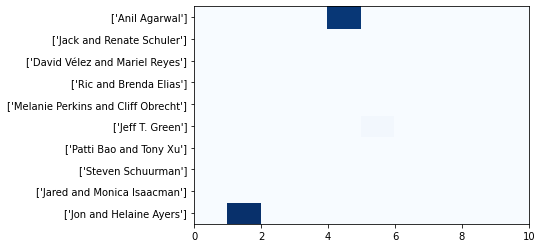

In [ ]:
path = "/content/drive/MyDrive/gp_dataframe.csv"
df = pd.read_csv(path)
text = "normalized_letters"

df = df[(~df[text].isna())]
senReleasesTraining = df[text]
senReleasesTraining['name'] = df['pledger_name']
senReleasesTraining['tokenized_text'] = df[text].apply(lambda x: lucem_illud.word_tokenize(x))
senReleasesTraining['normalized_tokens'] = senReleasesTraining['tokenized_text'].apply(lambda x: lucem_illud.normalizeTokens(x))
senReleasesTraining[::100]

def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

senReleasesTraining['reduced_tokens'] = senReleasesTraining['normalized_tokens'].apply(lambda x: dropMissing(x, gpTFVectorizer.vocabulary_.keys()))
dictionary = gensim.corpora.Dictionary(senReleasesTraining['reduced_tokens'])

corpus = [dictionary.doc2bow(text) for text in senReleasesTraining['reduced_tokens']]

gensim.corpora.MmCorpus.serialize('senate.mm', corpus)
senmm = gensim.corpora.MmCorpus('senate.mm')

senlda = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=20, alpha='auto', eta='auto')

sen1Bow = dictionary.doc2bow(senReleasesTraining['reduced_tokens'][11])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(senReleasesTraining['name'][11]))
print("are: {}".format(sen1lda))

ldaDF = pandas.DataFrame({
        'name' : senReleasesTraining['name'],
        'topics' : [senlda[dictionary.doc2bow(l)] for l in senReleasesTraining['reduced_tokens']]
    })

ldaDF

# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

# semantically inspect
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

# Visualize

N = 225
ind = np.arange(N)
K = senlda.num_topics  # N documents, K topics
ind = np.arange(N)  # the x-axis locations for the novels
width = 0.5  # the width of the bars
plots = []
height_cumulative = np.zeros(N)

for k in range(K):
    color = plt.cm.coolwarm(k/K, 1)
    if k == 0:
        p = plt.bar(ind, ldaDFVis[:, k], width, color=color)
    else:
        p = plt.bar(ind, ldaDFVis[:, k], width, bottom=height_cumulative, color=color)
    height_cumulative += ldaDFVis[:, k]
    plots.append(p)
    

plt.ylim((0, 1))  # proportions sum to 1, so the height of the stacked bars is 1
plt.ylabel('Topics')

plt.title('Topics in Press Releases')
plt.xticks(ind+width/2, ldaDFVisNames, rotation='vertical')

plt.yticks(np.arange(0, 1, 10))
topic_labels = ['Topic #{}'.format(k) for k in range(K)]
plt.legend([p[0] for p in plots], topic_labels, loc='center left', frameon=True,  bbox_to_anchor = (1, .5))

plt.show()


# Heat map

plt.pcolor(ldaDFVis, norm=None, cmap='Blues')
plt.yticks(np.arange(ldaDFVis.shape[0])+0.5, ldaDFVisNames);
plt.xticks(np.arange(ldaDFVis.shape[1])+0.5, topic_labels);

# flip the y-axis so the texts are in the order we anticipate (Austen first, then Brontë)
plt.gca().invert_yaxis()

# rotate the ticks on the x-axis
plt.xticks(rotation=90)

# add a legend
plt.colorbar(cmap='Blues')
plt.tight_layout()  # fixes margins
plt.show()

topic1_df = pandas.DataFrame(senlda.show_topic(1, topn=50))
plt.figure()
topic1_df.plot.bar(legend = False)
plt.title('Probability Distribution of Words, Topic 1')
plt.show()

senlda1 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.00001)
senlda2 = gensim.models.ldamodel.LdaModel(corpus=senmm, id2word=dictionary, num_topics=10, eta = 0.9)

topic11_df = pandas.DataFrame(senlda1.show_topic(1, topn=50))
topic21_df = pandas.DataFrame(senlda2.show_topic(1, topn=50))

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)
topic11_df.plot.bar(legend = False, ax = ax1, title = '$\eta$  = 0.00001')
topic21_df.plot.bar(legend = False, ax = ax2, title = '$\eta$  = 0.9')
plt.show()

from gensim.models import HdpModel
hdpmodel = HdpModel(corpus=corpus, id2word=dictionary)
hdpmodel.print_topics()

hdptexts = hdpmodel[corpus]
hdptexts[6]

In [ ]:
### MODEL 2

In [ ]:
# TO DO: (1) BIGRAMS & TRIGRAMS, (2) FIND TOPIC DISTRIBUTION ACCROSS LETTERS, (3) RUN FOR THREE DIFFERENT CORPORA

In [ ]:
lda_model.num_topics

20

In [ ]:
ldaDF = pandas.DataFrame({
        'name' : df['pledger_name'],
        'topics' : [doc_lda[dictionary.doc2bow(l)] for l in dataset]
    })

ldaDF

TypeError: ignored

In [ ]:
ldaDF = lda_model


In [ ]:
# one column for each topic

#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(senlda.num_topics)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(senlda.num_topics):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

temp = ldaDF[1::20]

ldaDFV = ldaDF[:10][['topic_%d' %x for x in range(10)]]
ldaDFVisN = ldaDF[:10][['name']]
ldaDFVis = ldaDFV.values
ldaDFVisNames = ldaDFVisN.values
ldaDFV

# semantically inspect
topicsDict = {}
for topicNum in range(senlda.num_topics):
    topicWords = [w for w, p in senlda.show_topic(topicNum)]
    topicsDict['Topic_{}'.format(topicNum)] = topicWords

wordRanksDF = pandas.DataFrame(topicsDict)
wordRanksDF

Above from https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/#8tokenizewordsandcleanuptextusingsimple_preprocess

In [ ]:
df1 = data
df3 = df

In [ ]:
df['normalized_letters']

0      ['humanity', 'limited', 'time', 'turn', 'tide'...
1      ['i', 'know', 'lucky', 'family', 'i', 'fortuna...
2      ['limit', 'wealth', 'person', 'can', 'consume'...
3      ['like', 'be', 'hope', 'investment', 'will', '...
4      ['family', 'foundation', 'give', 'arm', 'datap...
                             ...                        
220    ['i', 've', 'long', 'state', 'i', 'enjoy', 'ma...
221    ['fortunate', 'thing', 'i', 'nearly', 'enthusi...
222    ['family', 'continue', 'unite', 'belief', 'ben...
223    ['i', 'hope', 'involve', 'effort', 'ultimately...
224    ['vision', 'significant', 'contribution', 'hum...
Name: normalized_letters, Length: 203, dtype: object

In [ ]:
df["letters_text"]

0      "Humanity has a limited amount of time to turn...
1      "I know how lucky my family and I have been an...
2      "There is a limit to how much wealth one perso...
3      "Just like it was done for us, we hope to make...
4      My family foundation and its giving arm—Dataph...
                             ...                        
220    "I've long stated that I enjoy making money, a...
221    "One very fortunate thing is that I did not ge...
222    “Our family continues to be united in the beli...
223    "I do hope that others involved in this effort...
224    "Our vision is to make a significant contribut...
Name: letters_text, Length: 203, dtype: object

In [ ]:
# only letters
dfx = df["normalized_letters"]
#First it needs to be initialized
gpCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
givingpledgeVects = gpCountVectorizer.fit_transform(dfx)

givingpledgeVects[:10,:20].toarray()

# TFIDF
#initialize
givingpledgeTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(givingpledgeVects)
#train
givingpledgeTF = givingpledgeTFTransformer.transform(givingpledgeVects)
print(givingpledgeTF.shape)

list(zip(gpCountVectorizer.vocabulary_.keys(), givingpledgeTF.data))[:20]

#initialize
gpTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words=[], norm='l2')
#train
givingpledgeTFVects = gpTFVectorizer.fit_transform(dfx)

try:
    print(gpTFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(gpTFVectorizer.vocabulary_.keys())[:10]))

(203, 6558)
vector is missing
The available words are: ['humanity', 'limited', 'turn', 'conservation', 'nature', 'societal', 'priority', 'mission', 'suffer', 'leave'] ...


In [ ]:
'''
# only letters
dfx = df["letters_text"]
#First it needs to be initialized
gpCountVectorizer = sklearn.feature_extraction.text.CountVectorizer()
#Then trained
givingpledgeVects = gpCountVectorizer.fit_transform(dfx)

givingpledgeVects[:10,:20].toarray()

# TFIDF
#initialize
givingpledgeTFTransformer = sklearn.feature_extraction.text.TfidfTransformer().fit(givingpledgeVects)
#train
givingpledgeTF = givingpledgeTFTransformer.transform(givingpledgeVects)
print(givingpledgeTF.shape)

list(zip(gpCountVectorizer.vocabulary_.keys(), givingpledgeTF.data))[:20]

#initialize
gpTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words=[], norm='l2')
#train
givingpledgeTFVects = gpTFVectorizer.fit_transform(dfx)

try:
    print(gpTFVectorizer.vocabulary_['vector'])
except KeyError:
    print('vector is missing')
    print('The available words are: {} ...'.format(list(gpTFVectorizer.vocabulary_.keys())[:10]))
    
    '''

(203, 8348)
vector is missing
The available words are: ['humanity', 'limited', 'amount', 'turn', 'conservation', 'nature', 'societal', 'mission', 'left', 'him'] ...


In [ ]:
def dropMissing(wordLst, vocab):
    return [w for w in wordLst if w in vocab]

df['reduced_tokens'] = df['normalized_letters'].apply(lambda x: dropMissing(x, gpTFVectorizer.vocabulary_.keys()))

In [ ]:
dictionary = gensim.corpora.Dictionary(df['reduced_tokens'])


In [ ]:
corpus = [dictionary.doc2bow(text) for text in df['reduced_tokens']]

In [ ]:
gensim.corpora.MmCorpus.serialize('gp.mm', corpus)
gpmm = gensim.corpora.MmCorpus('gp.mm')

In [ ]:
df['reduced_tokens']

0      []
1      []
2      []
3      []
4      []
       ..
220    []
221    []
222    []
223    []
224    []
Name: reduced_tokens, Length: 203, dtype: object

In [ ]:





gplda = gensim.models.ldamodel.LdaModel(corpus=df['reduced_tokens'], id2word=dictionary, num_topics=10, alpha='auto', eta='auto')

ValueError: ignored

In [ ]:
#@title
sen1Bow = dictionary.doc2bow(senReleasesTraining['reduced_tokens'][0])
sen1lda = senlda[sen1Bow]
print("The topics of the text: {}".format(senReleasesTraining['name'][0]))
print("are: {}".format(sen1lda))

In [ ]:
def spacy_pos(word_list):
    tags = []
    doc = nlp(word_list.lower())
    for w in doc:
        tags.append((w.text, w.tag_))
    return tags



In [ ]:
whReleases['normalized_tokens_POS'] = [spacy_pos(t) for t in whReleases['text']]

In [ ]:
whcfdist_WordtoPOS = nltk.ConditionalFreqDist(whReleases['normalized_tokens_POS'].sum())
list(whcfdist_WordtoPOS.items())[:10]

In [ ]:
whcfdist_POStoWord = nltk.ConditionalFreqDist((p, w) for w, p in whReleases['normalized_tokens_POS'].sum())


In [ ]:
whcpdist_POStoWord = nltk.ConditionalProbDist(whcfdist_POStoWord, nltk.ELEProbDist)

#print the most common nouns
print(whcpdist_POStoWord['NN'].max())

#And its probability
print(whcpdist_POStoWord['NN'].prob(whcpdist_POStoWord['NN'].max()))

# Clustering

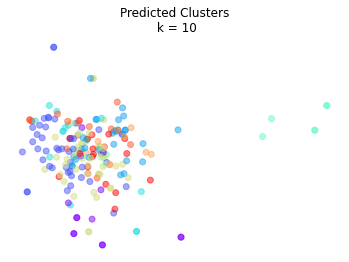

Top terms per cluster:
Cluster 0:
 climate
 organization
 energy
 long
 future
 human
 continues
 goals
 change
 philanthropists


Cluster 1:
 jewish
 foundation
 education
 new
 philanthropic
 school
 family
 public
 university
 students


Cluster 2:
 good
 parents
 feel
 gifts
 share
 difference
 fortune
 spirit
 way
 join


Cluster 3:
 family
 community
 planet
 majority
 education
 privilege
 given
 share
 opportunity
 fortunate


Cluster 4:
 捐赠誓言
 let
 spirit
 entrepreneur
 makes
 love
 faith
 pursuit
 generous
 gain


Cluster 5:
 africa
 susan
 south
 help
 institute
 african
 shares
 need
 research
 advantages


Cluster 6:
 money
 ve
 like
 want
 help
 problems
 support
 projects
 education
 social


Cluster 7:
 charitable
 com
 david
 receive
 special
 carry
 research
 support
 sons
 family


Cluster 8:
 children
 ve
 fun
 want
 foundation
 money
 outcomes
 million
 encourage
 help


Cluster 9:
 right
 good
 believe
 lives
 causes
 power
 principles
 improve
 foundation
 help



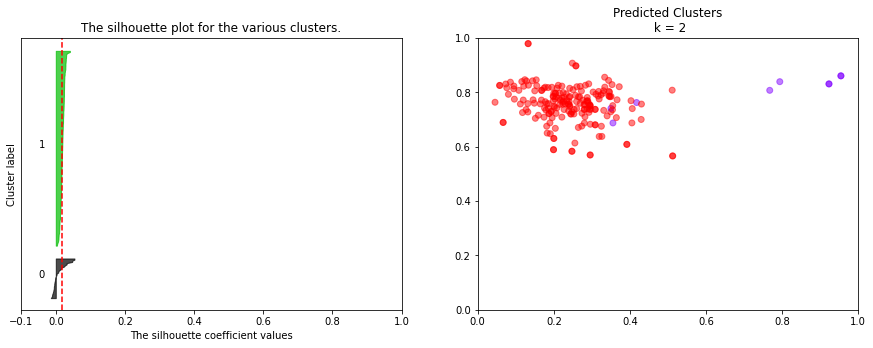

<Figure size 432x288 with 0 Axes>

For n_clusters = 2, The average silhouette_score is : 0.017


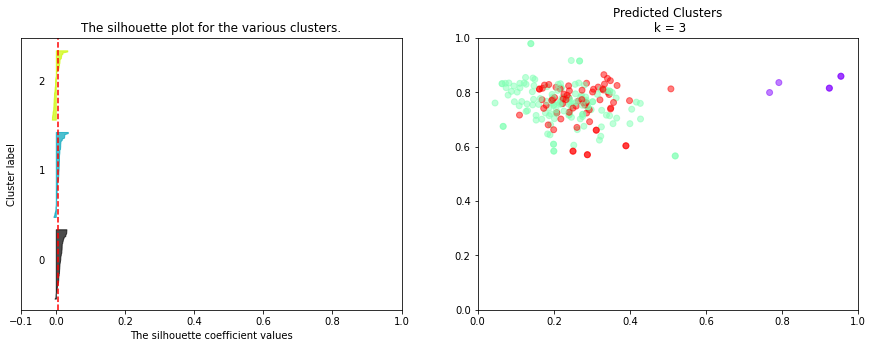

<Figure size 432x288 with 0 Axes>

For n_clusters = 3, The average silhouette_score is : 0.007


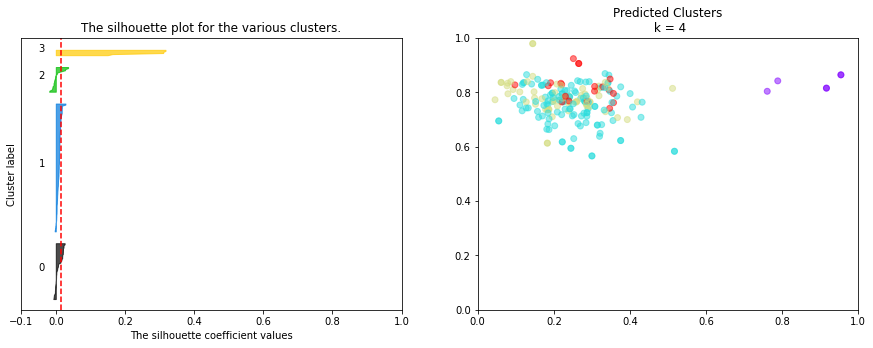

<Figure size 432x288 with 0 Axes>

For n_clusters = 4, The average silhouette_score is : 0.015


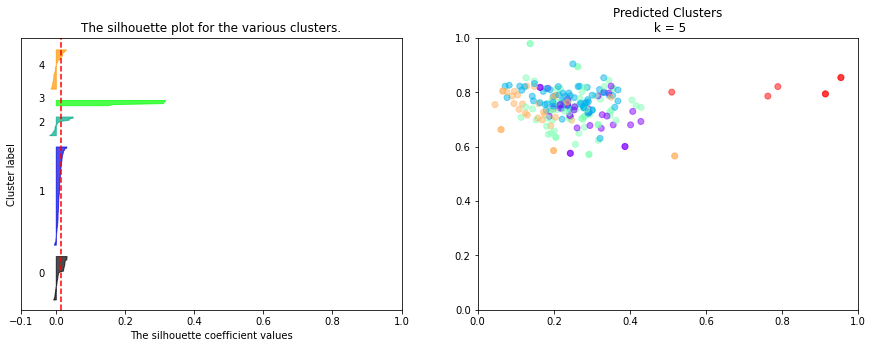

<Figure size 432x288 with 0 Axes>

For n_clusters = 5, The average silhouette_score is : 0.015


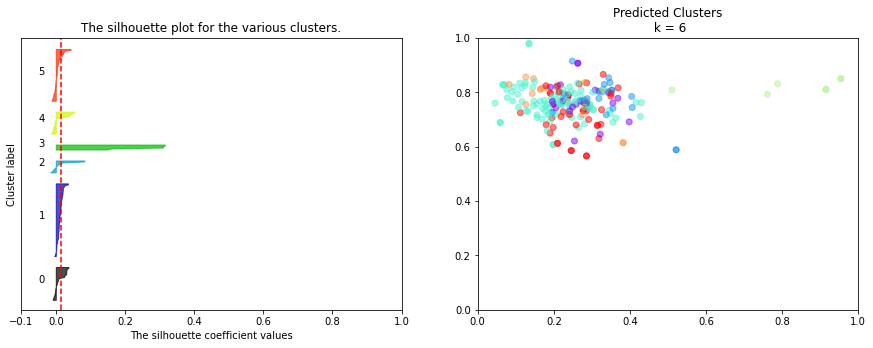

<Figure size 432x288 with 0 Axes>

For n_clusters = 6, The average silhouette_score is : 0.016


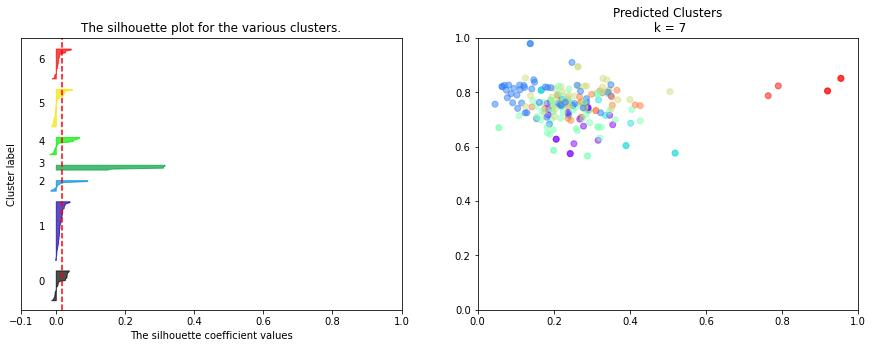

<Figure size 432x288 with 0 Axes>

For n_clusters = 7, The average silhouette_score is : 0.017


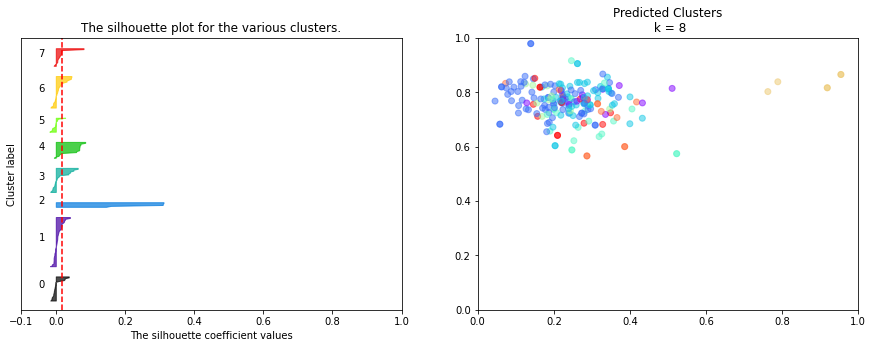

<Figure size 432x288 with 0 Axes>

For n_clusters = 8, The average silhouette_score is : 0.018


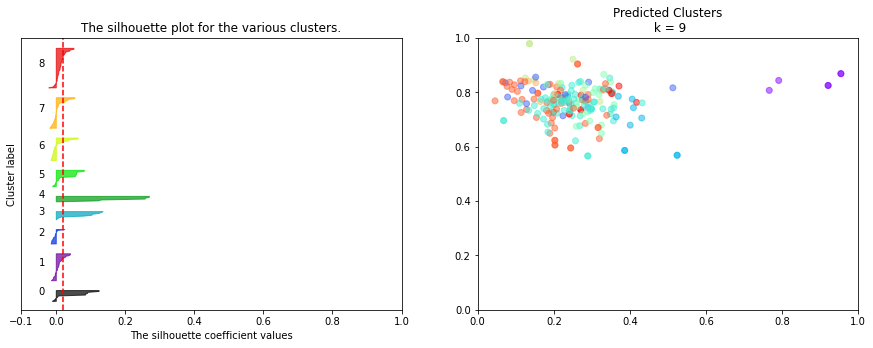

<Figure size 432x288 with 0 Axes>

For n_clusters = 9, The average silhouette_score is : 0.020


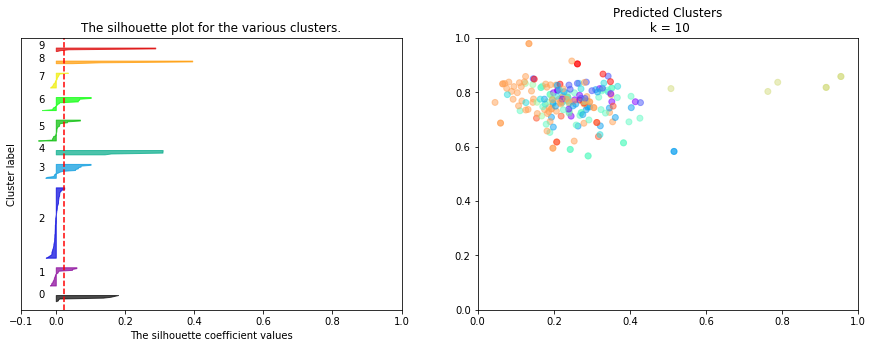

<Figure size 432x288 with 0 Axes>

For n_clusters = 10, The average silhouette_score is : 0.024


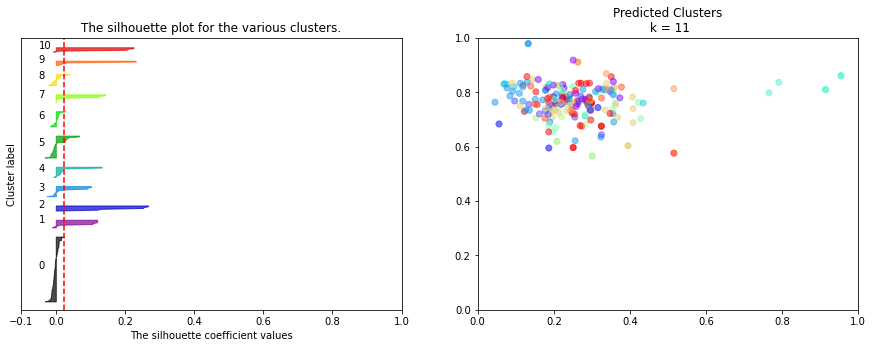

<Figure size 432x288 with 0 Axes>

For n_clusters = 11, The average silhouette_score is : 0.023


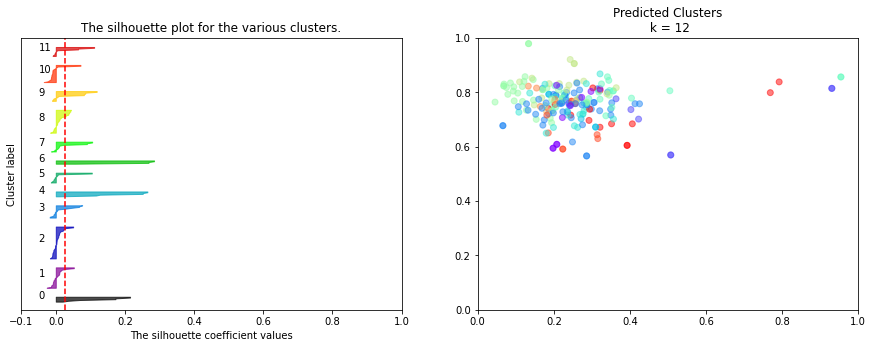

<Figure size 432x288 with 0 Axes>

For n_clusters = 12, The average silhouette_score is : 0.028


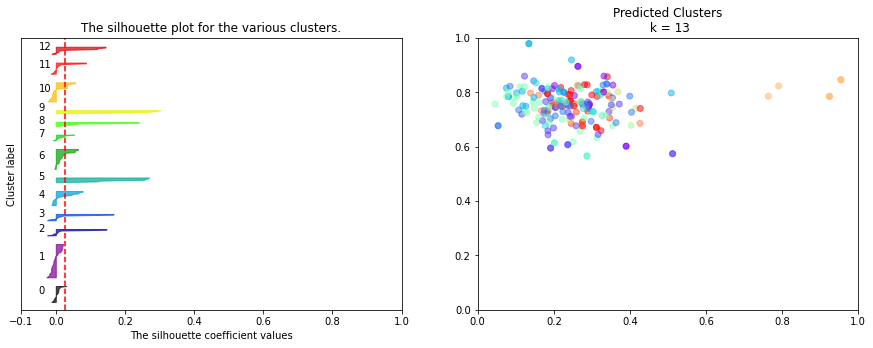

<Figure size 432x288 with 0 Axes>

For n_clusters = 13, The average silhouette_score is : 0.027


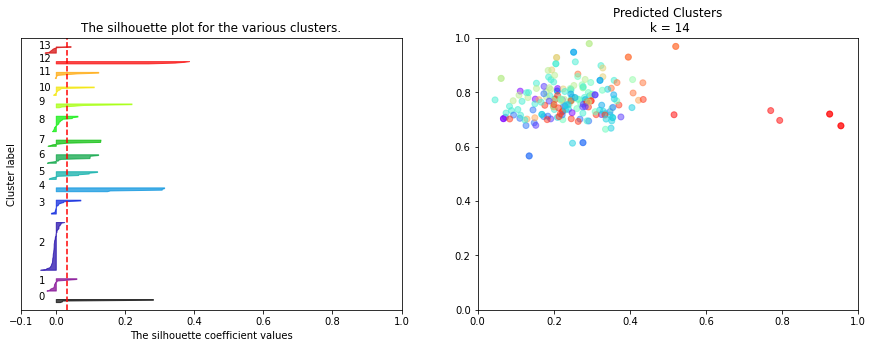

<Figure size 432x288 with 0 Axes>

For n_clusters = 14, The average silhouette_score is : 0.032


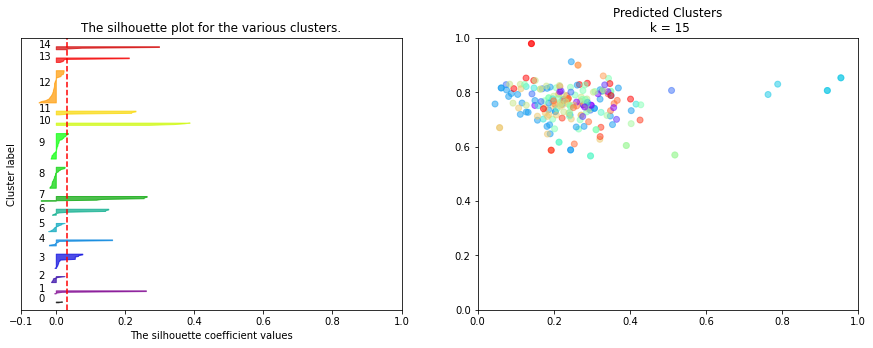

<Figure size 432x288 with 0 Axes>

For n_clusters = 15, The average silhouette_score is : 0.033


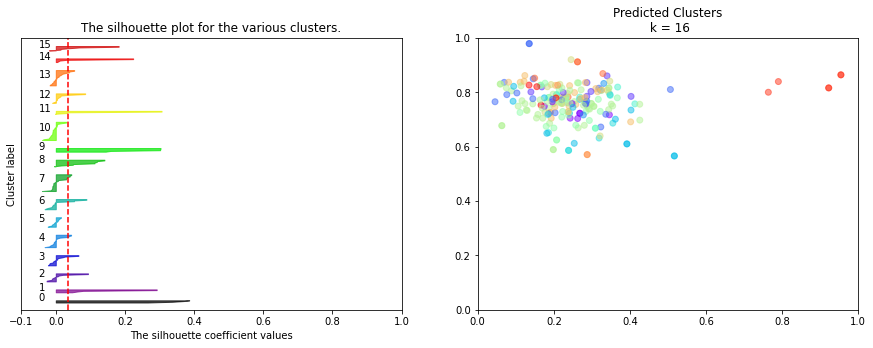

<Figure size 432x288 with 0 Axes>

For n_clusters = 16, The average silhouette_score is : 0.034


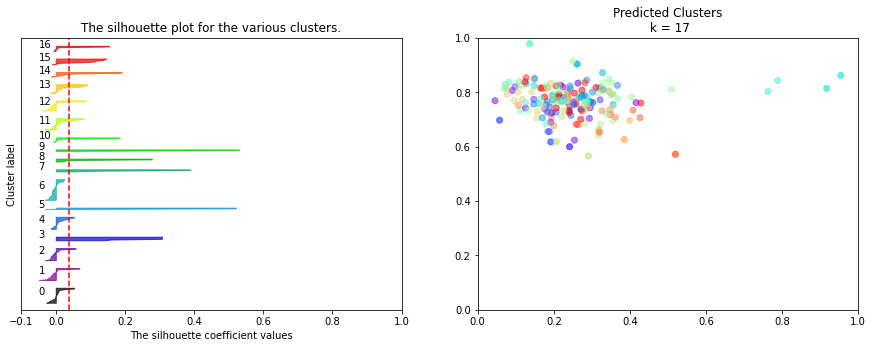

<Figure size 432x288 with 0 Axes>

For n_clusters = 17, The average silhouette_score is : 0.039


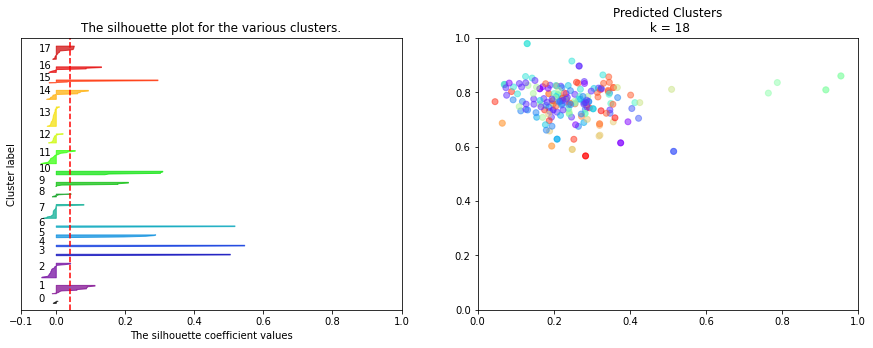

<Figure size 432x288 with 0 Axes>

For n_clusters = 18, The average silhouette_score is : 0.041


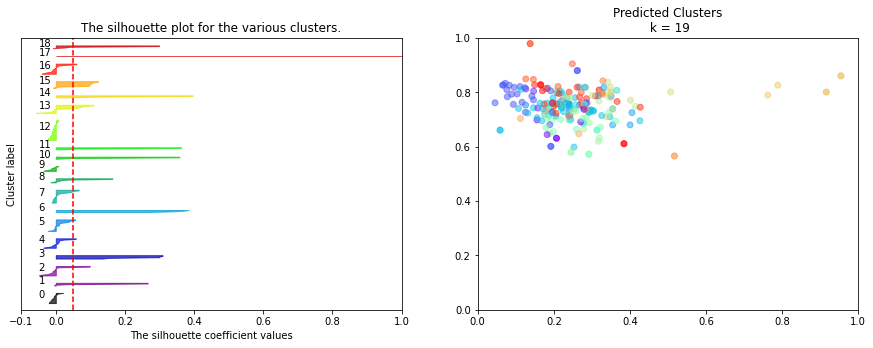

<Figure size 432x288 with 0 Axes>

For n_clusters = 19, The average silhouette_score is : 0.050


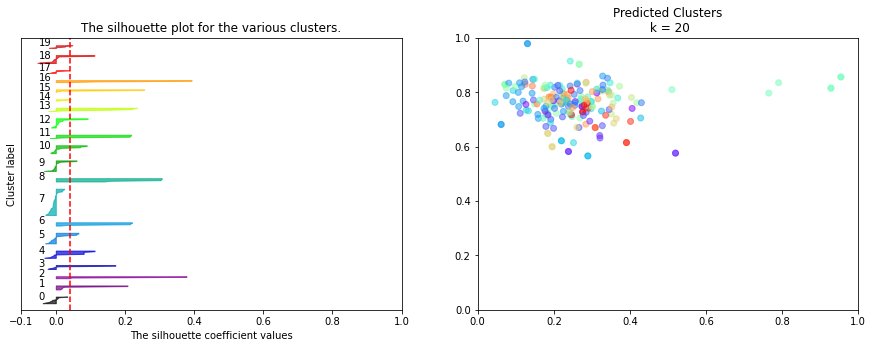

<Figure size 432x288 with 0 Axes>

For n_clusters = 20, The average silhouette_score is : 0.041


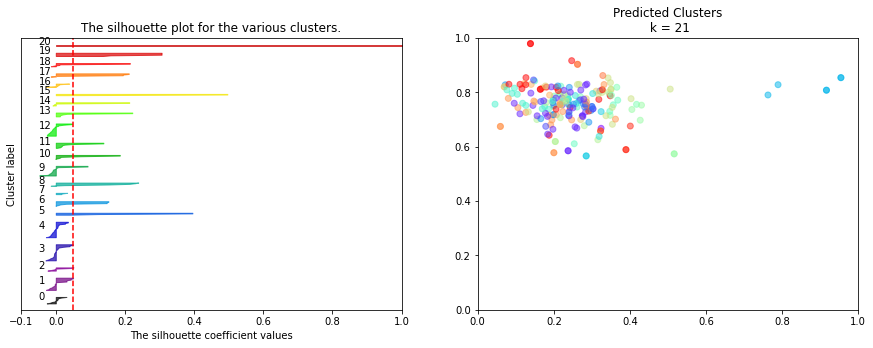

<Figure size 432x288 with 0 Axes>

For n_clusters = 21, The average silhouette_score is : 0.051


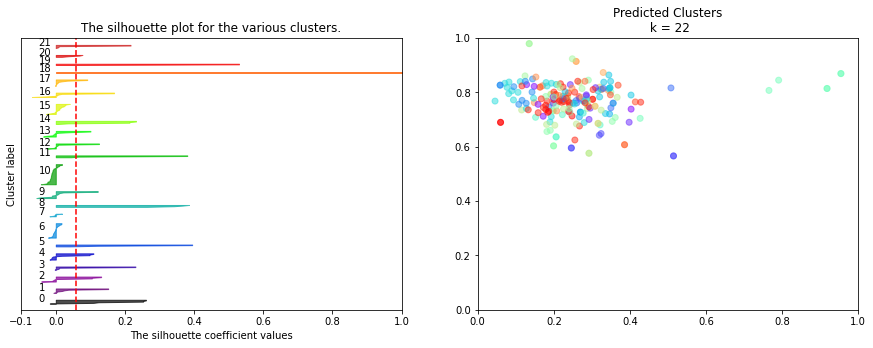

<Figure size 432x288 with 0 Axes>

For n_clusters = 22, The average silhouette_score is : 0.057


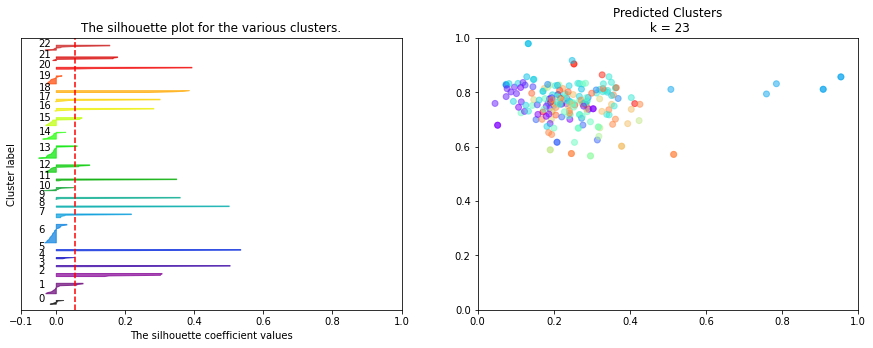

<Figure size 432x288 with 0 Axes>

For n_clusters = 23, The average silhouette_score is : 0.055


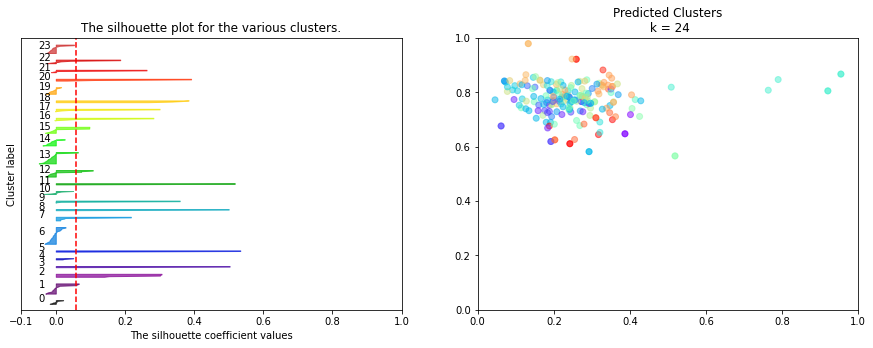

<Figure size 432x288 with 0 Axes>

For n_clusters = 24, The average silhouette_score is : 0.057


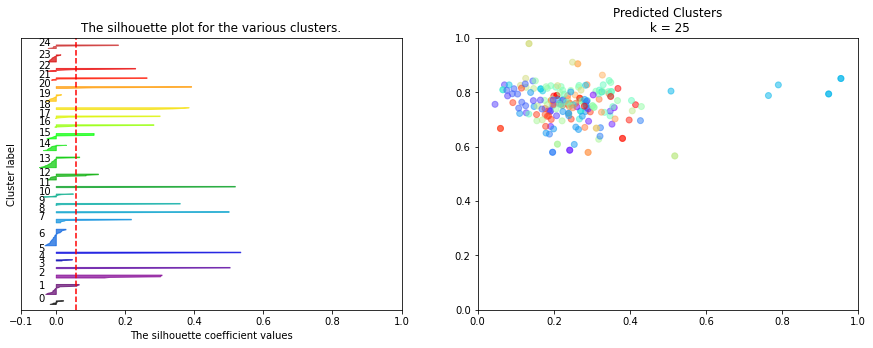

<Figure size 432x288 with 0 Axes>

For n_clusters = 25, The average silhouette_score is : 0.060


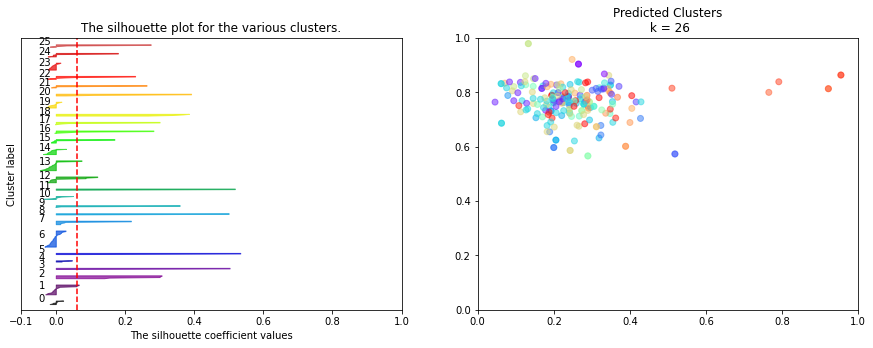

<Figure size 432x288 with 0 Axes>

For n_clusters = 26, The average silhouette_score is : 0.062


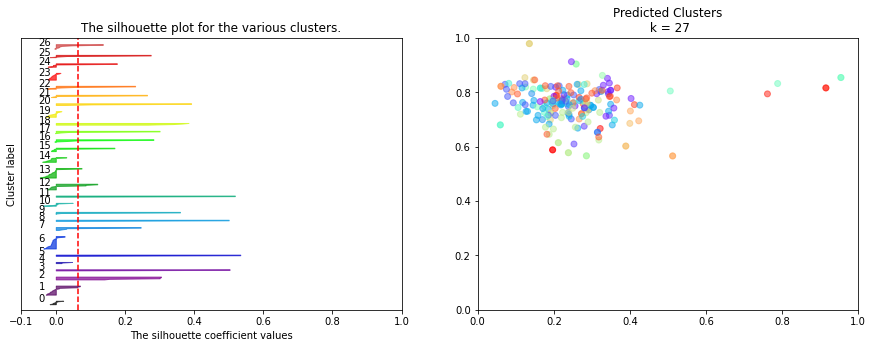

<Figure size 432x288 with 0 Axes>

For n_clusters = 27, The average silhouette_score is : 0.064


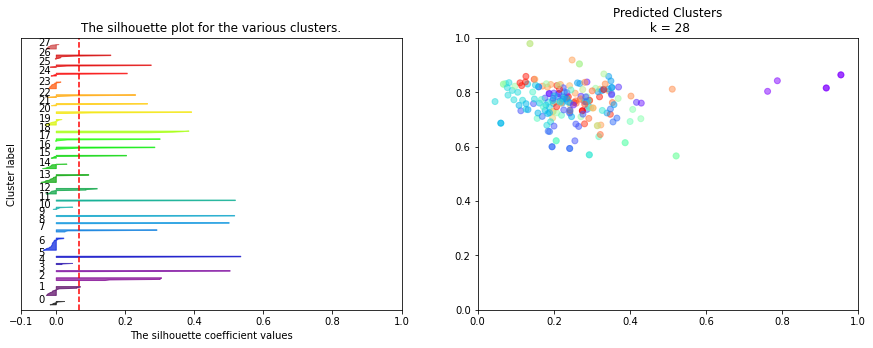

<Figure size 432x288 with 0 Axes>

For n_clusters = 28, The average silhouette_score is : 0.066


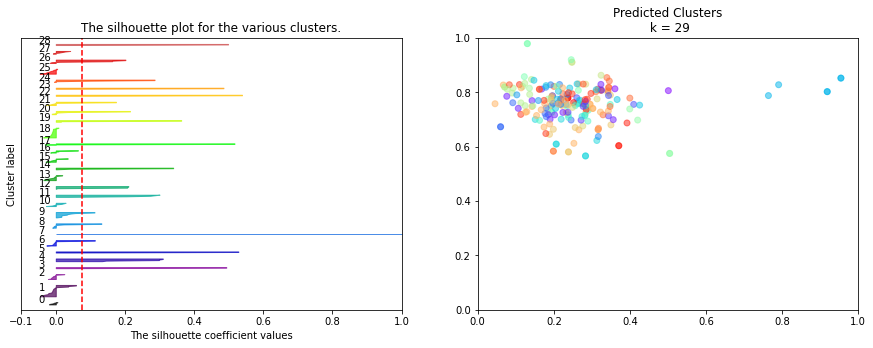

<Figure size 432x288 with 0 Axes>

For n_clusters = 29, The average silhouette_score is : 0.077


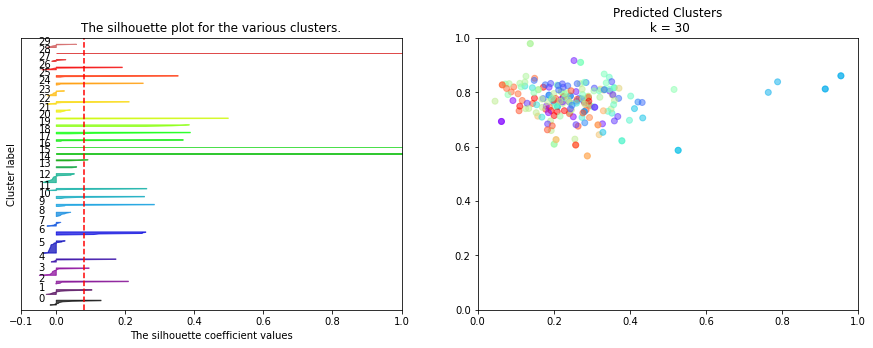

<Figure size 432x288 with 0 Axes>

For n_clusters = 30, The average silhouette_score is : 0.082


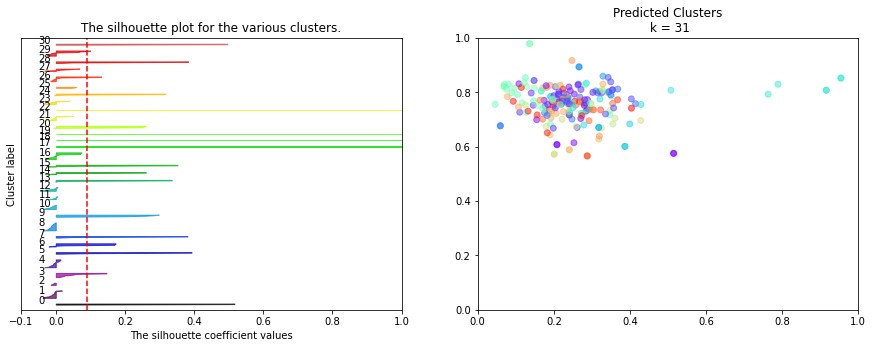

<Figure size 432x288 with 0 Axes>

For n_clusters = 31, The average silhouette_score is : 0.091


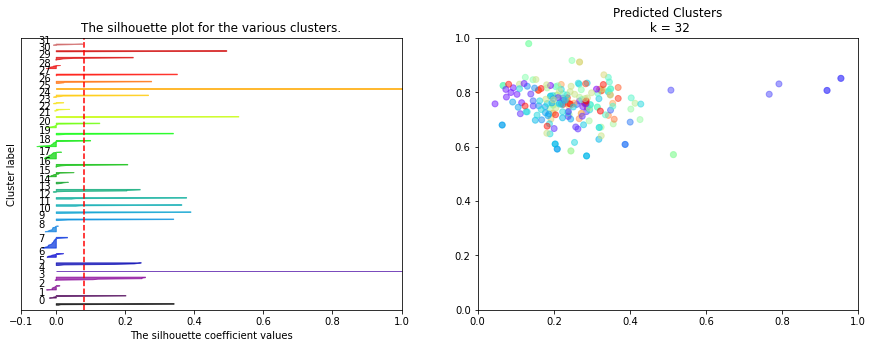

<Figure size 432x288 with 0 Axes>

For n_clusters = 32, The average silhouette_score is : 0.082


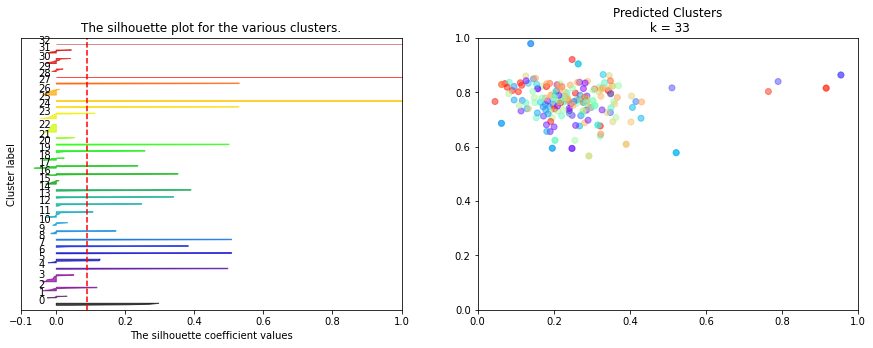

<Figure size 432x288 with 0 Axes>

For n_clusters = 33, The average silhouette_score is : 0.091


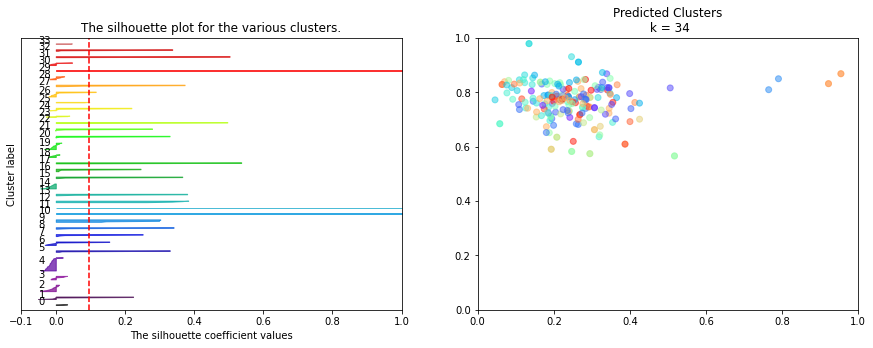

<Figure size 432x288 with 0 Axes>

For n_clusters = 34, The average silhouette_score is : 0.096


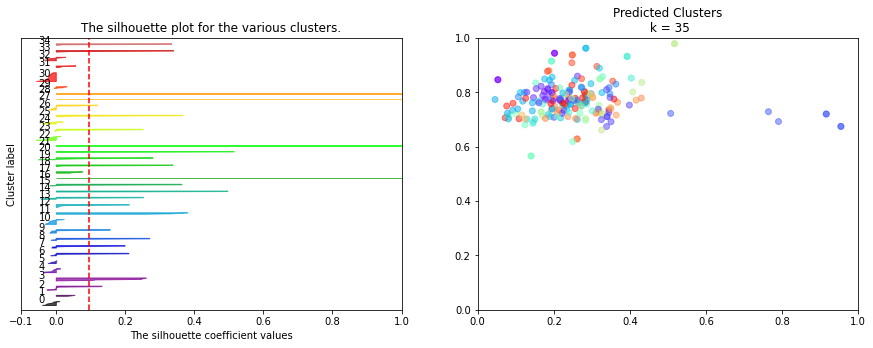

<Figure size 432x288 with 0 Axes>

For n_clusters = 35, The average silhouette_score is : 0.096


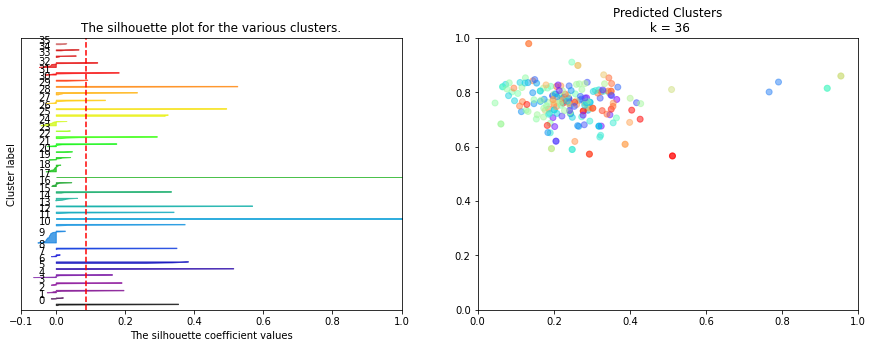

<Figure size 432x288 with 0 Axes>

For n_clusters = 36, The average silhouette_score is : 0.089


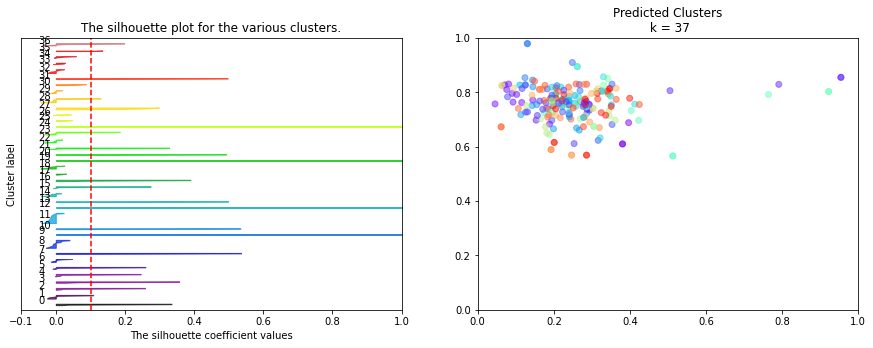

<Figure size 432x288 with 0 Axes>

For n_clusters = 37, The average silhouette_score is : 0.102


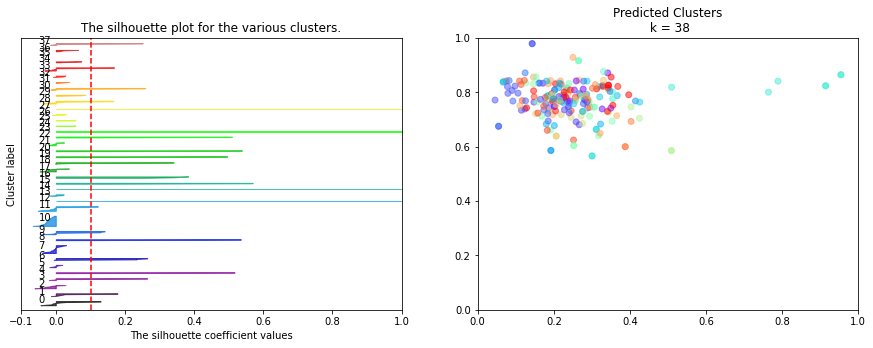

<Figure size 432x288 with 0 Axes>

For n_clusters = 38, The average silhouette_score is : 0.102


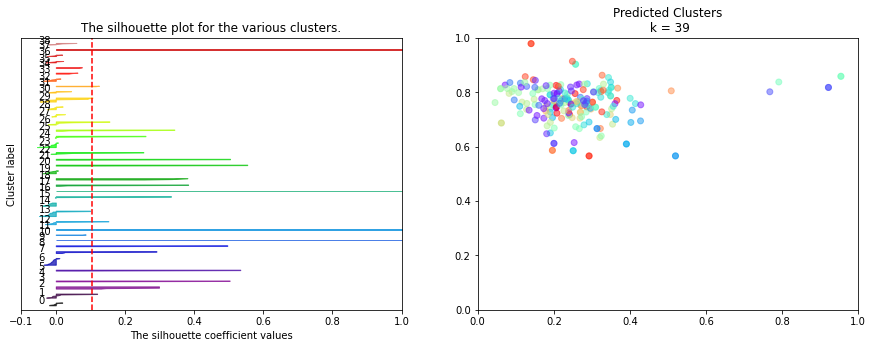

<Figure size 432x288 with 0 Axes>

For n_clusters = 39, The average silhouette_score is : 0.104


In [ ]:
targetDF = df_merged_forbes
textColumn = 'letters_text'
numCategories = 10


exampleTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
#train
exampleTFVects = exampleTFVectorizer.fit_transform(targetDF[textColumn])

exampleKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
exampleKM.fit(exampleTFVects)

examplePCA = sklearn.decomposition.PCA(n_components = 2).fit(exampleTFVects.toarray())
reducedPCA_data = examplePCA.transform(exampleTFVects.toarray())

colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
colors_p = [colors[l] for l in exampleKM.labels_]
fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.set_frame_on(False)
plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
plt.xticks(())
plt.yticks(())
plt.title('Predicted Clusters\n k = {}'.format(numCategories))
plt.show()

targetDF['kmeans_predictions'] = exampleKM.labels_
targetDF

targetDF['kmeans_predictions'] = exampleKM.labels_
exampleKM.labels_

terms = exampleTFVectorizer.get_feature_names()
print("Top terms per cluster:")
order_centroids = exampleKM.cluster_centers_.argsort()[:, ::-1]
for i in range(numCategories):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

# how many clusters? 

def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    targetDF = df
    textColumn = 'letters_text'
    numCategories = n_clusters


    exampleTFVectorizer = sklearn.feature_extraction.text.TfidfVectorizer(max_df=0.5, max_features=1000, min_df=3, stop_words='english', norm='l2')
    #train
    exampleTFVects = exampleTFVectorizer.fit_transform(targetDF[textColumn])

    exampleKM = sklearn.cluster.KMeans(n_clusters = numCategories, init='k-means++')
    exampleKM.fit(exampleTFVects)

    examplePCA = sklearn.decomposition.PCA(n_components = 2).fit(exampleTFVects.toarray())
    reducedPCA_data = examplePCA.transform(exampleTFVects.toarray())

    colors = list(plt.cm.rainbow(np.linspace(0,1, numCategories)))
    colors_p = [colors[l] for l in exampleKM.labels_]
    fig = plt.figure(1)
    ax = fig.add_subplot(222)
    ax.set_frame_on(False)
    plt.scatter(reducedPCA_data[:, 0], reducedPCA_data[:, 1], color = colors_p, alpha = 0.5)
    plt.xticks(())
    plt.yticks(())
    plt.title('Predicted Clusters\n k = {}'.format(numCategories))
    plt.show()

    '''examplePCA = sklearn.decomposition.PCA(n_components = n_clusters).fit(exampleTFVects.toarray())
    reduced_data = examplePCA.transform(exampleTFVects.toarray())


    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")'''

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))



for i in range(2, 40):
    X = exampleTFVects.toarray()
    plotSilhouette(i, X)

In [ ]:
df_merged_forbes.columns

Index(['Unnamed: 0.1', 'pledger_name', 'principal_related_foundation',
       'residence', 'net_worth', 'joined', 'bio', 'letters_text', 'name.1',
       'tokenized_letters', 'letter_word_count', 'normalized_letters',
       'normalized_letters_count', 'letters_text_noquote', 'POS_sents',
       'text_bigrams', 'Name', 'NetWorth', 'Country', 'Source', 'Rank', 'Age',
       'Residence', 'Citizenship', 'Status', 'Children', 'Education',
       'Self_made', 'kmeans_predictions'],
      dtype='object')

In [ ]:
df_merged_forbes.groupby(['Self_made'])['Self_made'].agg(['size'])

size
Self_made      
False        12
True         57

In [ ]:


print("Prop. words in klusters for self made:")
print(df_merged_forbes[df_merged_forbes["Self_made"]==True].groupby(['kmeans_predictions'])["Self_made"].agg(['size'])/57)
print("")
print("Prop. words in klusters for inherited:")
print(df_merged_forbes[df_merged_forbes["Self_made"]==False].groupby(['kmeans_predictions'])["Self_made"].agg(['size'])/12)

Prop. words in klusters for self made:
                        size
kmeans_predictions          
0                   0.017544
1                   0.175439
2                   0.052632
3                   0.087719
4                   0.035088
5                   0.017544
6                   0.368421
8                   0.070175
9                   0.175439

Prop. words in klusters for inherited:
                        size
kmeans_predictions          
1                   0.500000
2                   0.083333
7                   0.250000
9                   0.166667
